# Importing Libraries

In [3048]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import dtale


# Data Understanding and Preparation

## Reading Data

In [3049]:
artists_path = 'data\\artists.csv'
tracks_path = 'data\\tracks.csv'

This code automatically detects the correct separator for two dataset files (tracks and artists) by checking which character — comma, semicolon, or tab — appears most in the first line. It then loads each file into a pandas DataFrame using the detected separator, prints their shapes, and displays the first few rows.

 The tracks dataset has 11,166 rows and 45 columns, while the artists dataset has 104 rows and 14 columns.

In [3050]:
# Funzione helper per capire il separatore corretto
def detect_separator(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        sample = f.readline()
    # Conta quanti separatori compaiono
    seps = {',': sample.count(','), ';': sample.count(';'), '\t': sample.count('\t')}
    best_sep = max(seps, key=seps.get)
    print(f"Detected separator for {filepath}: '{best_sep}'")
    return best_sep

# Rileva automaticamente il separatore
sep_tracks = detect_separator(tracks_path)
sep_artists = detect_separator(artists_path)

print('------------------------------------')

# Carica i dataset in base al separatore rilevato
tracks = pd.read_csv(tracks_path, sep=sep_tracks, encoding='utf-8', engine='python')
artists = pd.read_csv(artists_path, sep=sep_artists, encoding='utf-8', engine='python')

# Mostra alcune info per verifica
print(f"Tracks shape: {tracks.shape}")
print(f"Artists shape: {artists.shape}")
print('------------------------------------')

print('TRACKS')
display(tracks.head(3))

print('------------------------------------')
print('ARTISTS')
display(artists.head(3))


Detected separator for data\tracks.csv: ','
Detected separator for data\artists.csv: ';'
------------------------------------
Tracks shape: (11166, 45)
Artists shape: (104, 14)
------------------------------------
TRACKS


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\r\nBdope, chiama due b—\r\n\r\nMi can...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\r\n(Brr-poh)\r\n\r\nT...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\r\nYeah, yeah, yeah-yeah\r\nBdope, chiam...",False


------------------------------------
ARTISTS


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3051]:
print("Artists Features")
print(artists.columns.tolist())

print("Tracks Features")
print(tracks.columns.tolist())


Artists Features
['id_author', 'name', 'gender', 'birth_date', 'birth_place', 'nationality', 'description', 'active_start', 'active_end', 'province', 'region', 'country', 'latitude', 'longitude']
Tracks Features
['id', 'id_artist', 'name_artist', 'full_title', 'title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image', 'id_album', 'lyrics', 'modified_popularity']


## Duplicates

### Artists

The following code checks the artists dataset for duplicates in two ways: first, it looks for identical full rows to detect any completely repeated entries; then, it checks for duplicates specifically based on the artist ID and artist name columns.
<B> After performing both checks, it confirms that there are no duplicate artists in the dataset </B>.

In [3052]:
# Check for duplicated artists rows
duplicates_artists = artists[artists.duplicated()]

print(f"Number of duplicated Artists rows: {duplicates_artists.shape[0]}")
display(duplicates_artists.head(5))

Number of duplicated Artists rows: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


In [3053]:
# Check for duplicated artists based on artist id
duplicates_artists_id = artists[artists.duplicated(subset='id_author')]
print(f"Number of duplicated artist based on ID: {duplicates_artists_id.shape[0]}")
display(duplicates_artists_id.head(5))



Number of duplicated artist based on ID: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


In [3054]:
# Check for duplicated artists based on artist name	
duplicates_artists_name = artists[artists.duplicated(subset='name')]
print(f"Number of duplicated artist based on Name: {duplicates_artists_name.shape[0]}")
display(duplicates_artists_name.head(5))

Number of duplicated artist based on Name: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


### Tracks
Duplicates rows check has been also performed here.
No duplicated rows were detected, indicating that all track entries are unique.

In [3055]:
# Check for duplicated tracks rows
duplicates_tracks = tracks[tracks.duplicated()]

print(f"Number of duplicated rows: {duplicates_tracks.shape[0]}")
display(duplicates_tracks.head(5))

Number of duplicated rows: 0


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity


#### Duplicated Tracks based on ID

This code checks the tracks dataset for duplicates based specifically on the track ID column. It identifies all rows where the same ID appears more than once, counts them, and displays them.
 It first identifies all rows where the same ID appears more than once, counts how many duplicated tracks exist, and displays them. Then, it counts how many times each track ID occurs in the dataset. 

<B> The result shows that there are 73 duplicated rows based on track IDs. 
Precisely we have 71  distinct IDs that have duplicates. </B>

<B>one track ID is repeated four times, while the others are each repeated twice </B>

In [3056]:
# Check for duplicated tracks based on track id
duplicates_tracks_id = tracks[tracks.duplicated(subset='id')]
print(f"Number of duplicated Tracks rows based on ID: {duplicates_tracks_id.shape[0]}")
display(duplicates_tracks_id)


# Count how many times each id_track appears
id_counts = tracks['id'].value_counts()
duplicate_id_counts = id_counts[id_counts > 1]

print('Number of distinct IDs that have duplicates')
print(duplicate_id_counts.size)
print("Number of tracks for each id:")
print(duplicate_id_counts)


Number of duplicated Tracks rows based on ID: 73


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
1704,TR715264,ART71969350,Clementino,Amore lo-fi by Clementino (Ft. Madame & Nicola...,Amore lo-fi,"Madame, Nicola Siciliano",Clementino,pl,Black Pulcinella,NaN,...,album,1.0,10.0,199493.0,False,35.0,https://i.scdn.co/image/ab67616d0000b273ca465a...,ALB287217,Me sceto 'a matina e sto a ffianco a te\r\nSto...,False
2197,TR517220,ART25707984,Fabri Fibra,In Quel Posto by Fabri Fibra,In Quel Posto,NaN,Fabri Fibra,it,Chi Vuole Essere Fabri Fibra?,NaN,...,album,1.0,6.0,235893.0,False,22.0,https://i.scdn.co/image/ab67616d0000b27372df17...,ALB998682,Quando entri in quel posto\r\nNon si torna ind...,False
2474,TR980497,ART48537029,Mistaman,Te-le-co-man-do by Mistaman,Te-le-co-man-do,NaN,Mistaman,it,Anni senza fine,NaN,...,album,1.0,8.0,215373.0,True,7.0,https://i.scdn.co/image/ab67616d0000b2738d2c17...,ALB102546,"Click, okay l'ho fatto, ti ho riaccesa\r\nBell...",False
2627,TR898853,ART57730937,Inoki,Freestyle ft. Bassi Maestro (NewKingzTape) by ...,Freestyle ft. Bassi Maestro (NewKingzTape),Bassi Maestro,Inoki,it,The NewKingzTape Vol. 1,NaN,...,album,1.0,16.0,110434.0,True,9.0,https://i.scdn.co/image/ab67616d0000b273a11fc3...,ALB809909,"Eh yo yo, li spacco\r\nIl tempo è maturo per u...",False
2721,TR192351,ART88792008,Jake La Furia,Musica Commerciale by Jake La Furia,Musica Commerciale,NaN,Jake La Furia,it,Musica Commerciale Deluxe Edition,10684.0,...,album,1.0,1.0,163517.0,False,39.0,https://i.scdn.co/image/ab67616d0000b273d49501...,ALB145179,Permettete una parola che è da un po' che ho n...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,TR292480,ART07024718,Fedez,Nel mio piccolo by Fedez,Nel mio piccolo,NaN,Fedez,it,Sig. Brainwash - L’arte di accontentare Diamon...,NaN,...,album,1.0,9.0,212160.0,False,24.0,https://i.scdn.co/image/ab67616d0000b273be56df...,ALB618541,Il problema di aver fatto della mia passione u...,False
10915,TR978886,ART07024718,Fedez,L'arte di accontentare by Fedez,L’arte di accontentare,NaN,Fedez,it,Sig. Brainwash - L’arte di accontentare Diamon...,NaN,...,album,1.0,4.0,201973.0,False,58.0,https://i.scdn.co/image/ab67616d0000b273be56df...,ALB618541,Rido sempre ma poi mi sento un po' un ostaggio...,False
10962,TR925275,ART07024718,Fedez,Bimbo Speciale by Fedez,Bimbo Speciale,NaN,Fedez,it,Tutto il Contrario Remixtape,NaN,...,album,1.0,13.0,166791.0,True,9.0,https://i.scdn.co/image/ab67616d0000b27310eb5d...,ALB872319,"Vuoi fare il rap divo, che schifo\r\nTi ho vis...",False
11007,TR747430,ART02733420,Marracash,Scooteroni by Marracash & Guè,Scooteroni,NaN,Marracash,it,Santeria (Voodoo Edition),134715.0,...,album,2.0,4.0,272280.0,False,61.0,https://i.scdn.co/image/ab67616d0000b273d4287a...,ALB811888,"Il brano vanta anche un remix, arricchito dall...",False


Number of distinct IDs that have duplicates
71
Number of tracks for each id:
id
TR367132    4
TR898853    2
TR621186    2
TR503521    2
TR192351    2
           ..
TR427122    2
TR261964    2
TR386339    2
TR825208    2
TR997536    2
Name: count, Length: 71, dtype: int64


The following code lists every full_title associated with each duplicated track ID. The results show 71 duplicated IDs in total. Most of these IDs are linked to two different songs, except for one ID that is associated with four songs (two pairs sharing the same title).

In [3057]:
# Find all duplicated track IDs
duplicate_ids = tracks[tracks.duplicated(subset='id', keep=False)]

# Group by 'id' and list all titles
titles_per_id = duplicate_ids.groupby('id')['full_title'].apply(list)

# Display each ID with all titles and the count of unique titles
for track_id, titles in titles_per_id.items():
    unique_count = len(set(titles))  # number of unique titles
    print(f"Track ID: {track_id} Number(of total songs: {len(titles)})(Unique titles: {unique_count})")
    for title in titles:
        print(f"  - {title}")
    print('----------------------------------------------------------')


Track ID: TR108862 Number(of total songs: 2)(Unique titles: 2)
  - Sushi Bar by Bassi Maestro
  - SPINE by Noyz Narcos (Ft. Coez)
----------------------------------------------------------
Track ID: TR135764 Number(of total songs: 2)(Unique titles: 2)
  - Nessuno vale quanto te by Ghemon
  - Giovani eroi by Emis Killa (Ft. Not Good)
----------------------------------------------------------
Track ID: TR190585 Number(of total songs: 2)(Unique titles: 2)
  - Serpico by Piotta (Ft. Tiromancino)
  - Nei treni la notte by Coez (Ft. Frah Quintale)
----------------------------------------------------------
Track ID: TR192351 Number(of total songs: 2)(Unique titles: 2)
  - Tornerò Da Re - Redrum Version by Club Dogo
  - Musica Commerciale by Jake La Furia
----------------------------------------------------------
Track ID: TR205970 Number(of total songs: 2)(Unique titles: 2)
  - 24.7 by Jack The Smoker (Ft. Bassi Maestro & Guè)
  - Sigla Catteland by Rancore & DJ Myke
-------------------------

#### Fixing Duplicated Tracks Id in Tracks dataset
After reviewing the songs associated with the duplicated IDs, we found that each duplicated ID corresponds to different songs, except for one case that will be treated later. Therefore, the most reasonable solution is to modify the duplicated IDs by appending the row number to each one. This approach ensures that all songs are preserved while maintaining unique identifiers for every track.

In [3058]:
# Identify duplicated IDs
duplicate_mask = tracks.duplicated(subset='id', keep=False)

# Assign new unique IDs only to duplicated rows
tracks.loc[duplicate_mask, 'id'] = (
    tracks.loc[duplicate_mask]
    .apply(lambda x: f"{x['id']}_{x.name}", axis=1)
)


print("Example of updated duplicates:")
display(tracks[duplicate_mask][['id', 'full_title']])


Example of updated duplicates:


,id,full_title
43,TR715264_43,​non è normale by Rosa Chemical
120,TR976686_120,Ibridi by Beba
141,TR230274_141,SaN LoREnZo by Alfa (Ft. Annalisa)
159,TR531651_159,Serenata - From “Forever Out of My League” by ...
199,TR898853_199,​oh 9od by thasup (Ft. nayt)
...,...,...
10879,TR292480_10879,Nel mio piccolo by Fedez
10915,TR978886_10915,L'arte di accontentare by Fedez
10962,TR925275_10962,Bimbo Speciale by Fedez
11007,TR747430_11007,Scooteroni by Marracash & Guè


#### Duplicated Tracks based on Title
The following code identifies tracks that share the same full_title, meaning duplicate song titles. We found four duplicated tracks, corresponding to two pairs of songs with identical titles.

In [3059]:
# Find duplicated full_title
duplicate_titles = tracks[tracks.duplicated(subset='full_title', keep=False)]

# Sort by full_title to see them together
duplicate_titles = duplicate_titles.sort_values('full_title')

print(f"Tracks with duplicate track based on full_title: {duplicate_titles.shape[0]}")
display(duplicate_titles)


Tracks with duplicate track based on full_title: 4


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
4627,TR367132_4627,ART20729624,Madame,BUGIE by Madame (Ft. Carl Brave & Rkomi),BUGIE,"Rkomi, Carl Brave",Madame,it,MADAME,36960.0,...,album,1.0,6.0,171602.0,False,48.0,https://i.scdn.co/image/ab67616d0000b2733ccb55...,ALB468764,E visto che non so dire di no\r\nSintomi da st...,False
4628,TR367132_4628,ART20729624,Madame,BUGIE by Madame (Ft. Carl Brave & Rkomi),BUGIE,"Rkomi, Carl Brave",Madame,it,MADAME,36960.0,...,single,1.0,1.0,187660.0,False,42.0,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,E visto che non so dire di no\r\nSintomi da st...,False
4647,TR367132_4647,ART20729624,Madame,​sentimi by Madame,​sentimi,NaN,Madame,it,NaN,14015.0,...,album,1.0,6.0,171602.0,False,48.0,https://i.scdn.co/image/ab67616d0000b2733ccb55...,ALB468764,Eh-eh-ah\r\nSiedi e sentimi\r\nYeah\r\n\r\nSie...,False
4648,TR367132_4648,ART20729624,Madame,​sentimi by Madame,​sentimi,NaN,Madame,it,NaN,14015.0,...,single,1.0,1.0,187660.0,False,42.0,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,Eh-eh-ah\r\nSiedi e sentimi\r\nYeah\r\n\r\nSie...,False


#### Fixing Duplicated Tracks full_title

The duplicated titles  — "BUGIE by Madame (Ft. Carl Brave & Rkomi)" and "sentimi by Madame" — actually refer to the same songs released in two different formats: one from the album and one from the single version. 
We decided to keep the duplicated tracks in the dataset but add a clear indication in the full_title to show whether each song comes from a single or an album. This way, all versions are preserved while making it easy to distinguish between different releases of the same song

In [3060]:

# Find duplicated full_titles
duplicate_mask = tracks.duplicated(subset='full_title', keep=False)

# Update only the duplicated titles by appending album_type
tracks.loc[duplicate_mask, 'full_title'] = (
    tracks.loc[duplicate_mask, 'full_title'] + 
    " (" + tracks.loc[duplicate_mask, 'album_type'].fillna('unknown').str.capitalize() + ")"
)

# Verify the changes
duplicate_titles = tracks[tracks.duplicated(subset='full_title', keep=False)].sort_values('full_title')
display(duplicate_titles[['full_title', 'album_type', 'id']])


,full_title,album_type,id


## Merging the Datasets


Merging the tracks and artists datasets into a single DataFrame called df. It matches rows where the <B> id_artist column in tracks</B> corresponds to the <B>id_author column in artists</B>, using a left join so that all tracks are kept even if some artists are missing. After merging, it prints the number of rows and columns in the unified dataset and shows the first three rows for inspection.

In [3061]:
df = tracks.merge(artists, left_on='id_artist', right_on='id_author', how='left')

print(f"Unified dataset: {df.shape[0]} rows , {df.shape[1]} columns")
display(df.head(3))



Unified dataset: 11166 rows , 59 columns


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762


Checking if there is a track without an artist

In [3062]:
# Check for tracks without a matching artist
missing_artists = df[df['id_author'].isna()]

print(f"Number of tracks without an artist: {missing_artists.shape[0]}")
display(missing_artists.head(5))

Number of tracks without an artist: 0


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


Checking if there is an artist without a track

In [3063]:
missing_artists = artists[~artists['id_author'].isin(tracks['id_artist'])]
print("Number of artists without any tracks:", len(missing_artists))

Number of artists without any tracks: 0


## Correlation Analysis

This section explores the linear relationships between numerical features in the datasets.  
The **Pearson correlation coefficient** is used to measure how strongly two variables move together.

The analysis is conducted separately for:
- **tracks.csv** → to understand relationships among audio, linguistic, and popularity features;
- **artists.csv** → to explore dependencies between demographic and career-related attributes;
- and finally on the **merged dataset**, combining both perspectives.

Interpreting the heatmaps:
- **+1** → strong positive correlation (variables increase together)  
- **−1** → strong negative correlation (one increases while the other decreases)  
- **0** → little or no linear relationship

This step helps identify redundant variables, reveal patterns between audio and artist features,  
and guide feature selection and dimensionality reduction before modeling.

In [3064]:
def plot_correlation_heatmap(df, title):
    """Plot a Pearson correlation heatmap for numeric features (white–magenta color scheme)."""
    
    # Select numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    if numeric_df.shape[1] < 2:
        print(f"Skipping {title}: not enough numeric columns.")
        return
    
    # Compute Pearson correlation matrix
    corr_matrix = numeric_df.corr(method='pearson')
    
    # Define custom color palette (white → light magenta → dark magenta)
    cmap = sns.color_palette(["#F6D6FF", "#E5A4FF", "#D873FF", "#C43EFF", "#9B00CC"])

    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr_matrix,
        cmap=cmap,         # Custom magenta palette
        center=0,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
    )
    
    # Style adjustments
    plt.title(f"Correlation Heatmap – {title}", fontsize=16, pad=15, color="#333333")
    plt.xticks(rotation=45, ha='right', color="#333333")
    plt.yticks(rotation=0, color="#333333")
    plt.tight_layout()
    plt.show()


=== Correlation Heatmap: TRACKS dataset ===


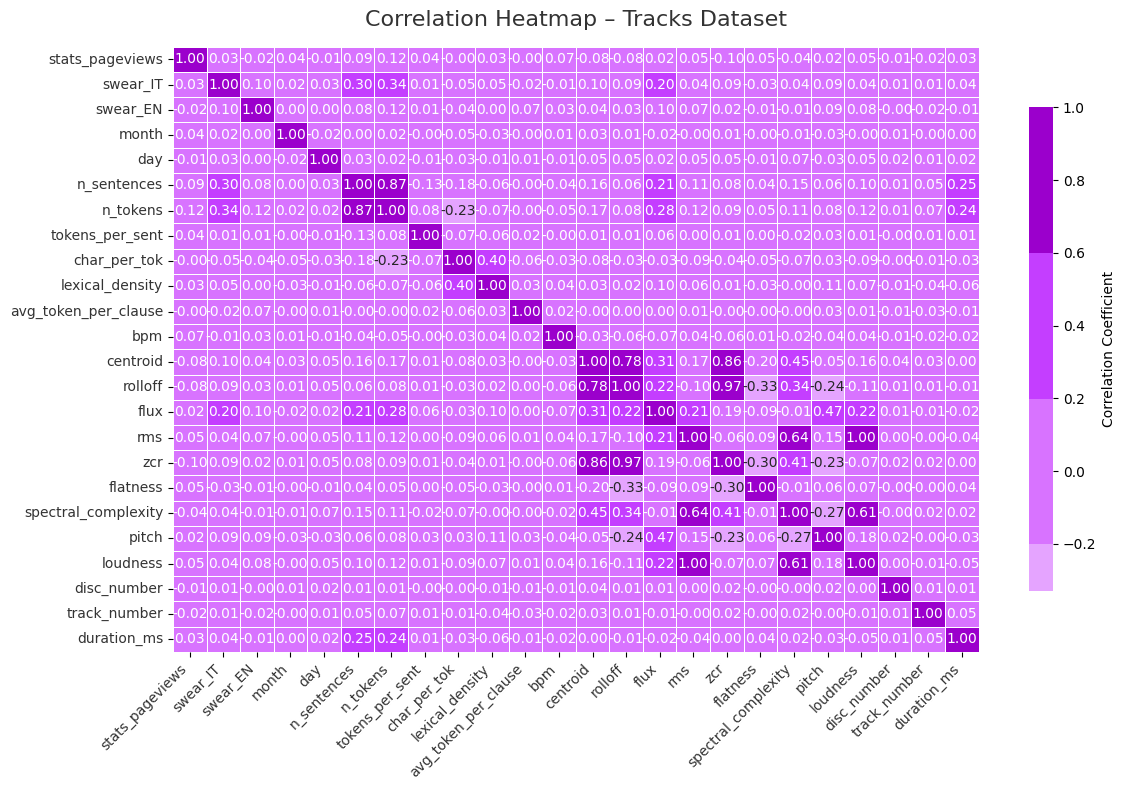

=== Correlation Heatmap: ARTISTS dataset ===


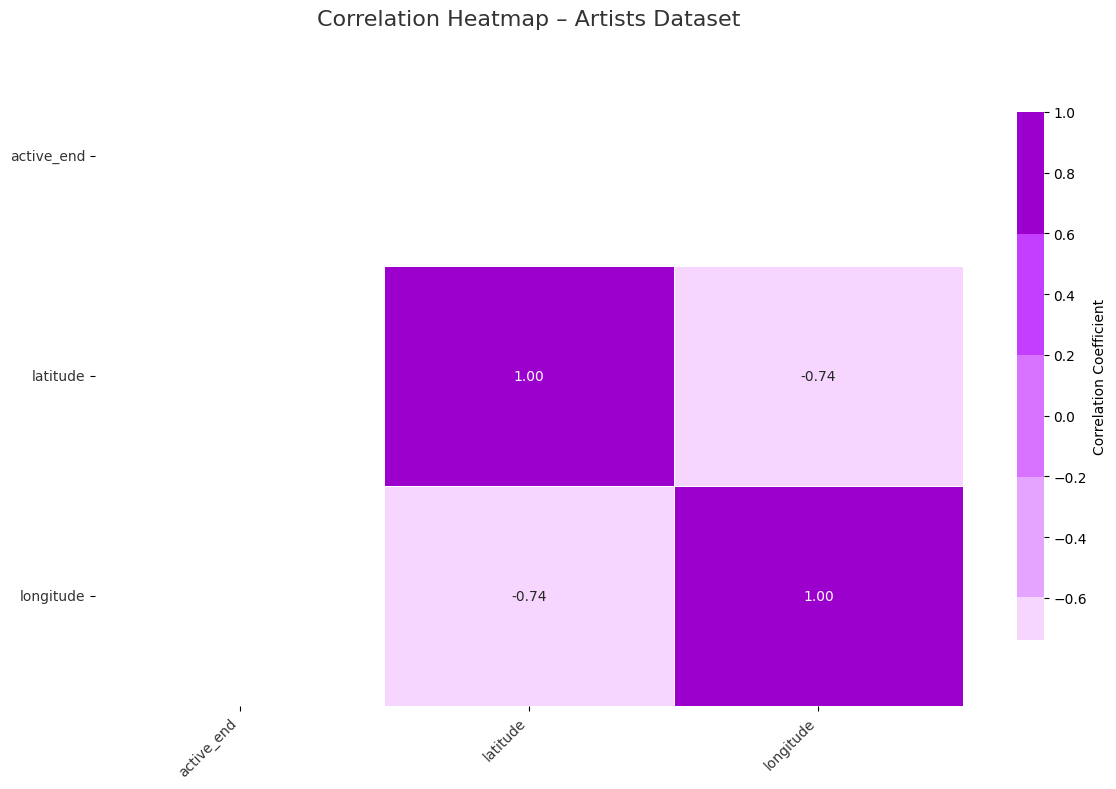

=== Correlation Heatmap: MERGED dataset ===


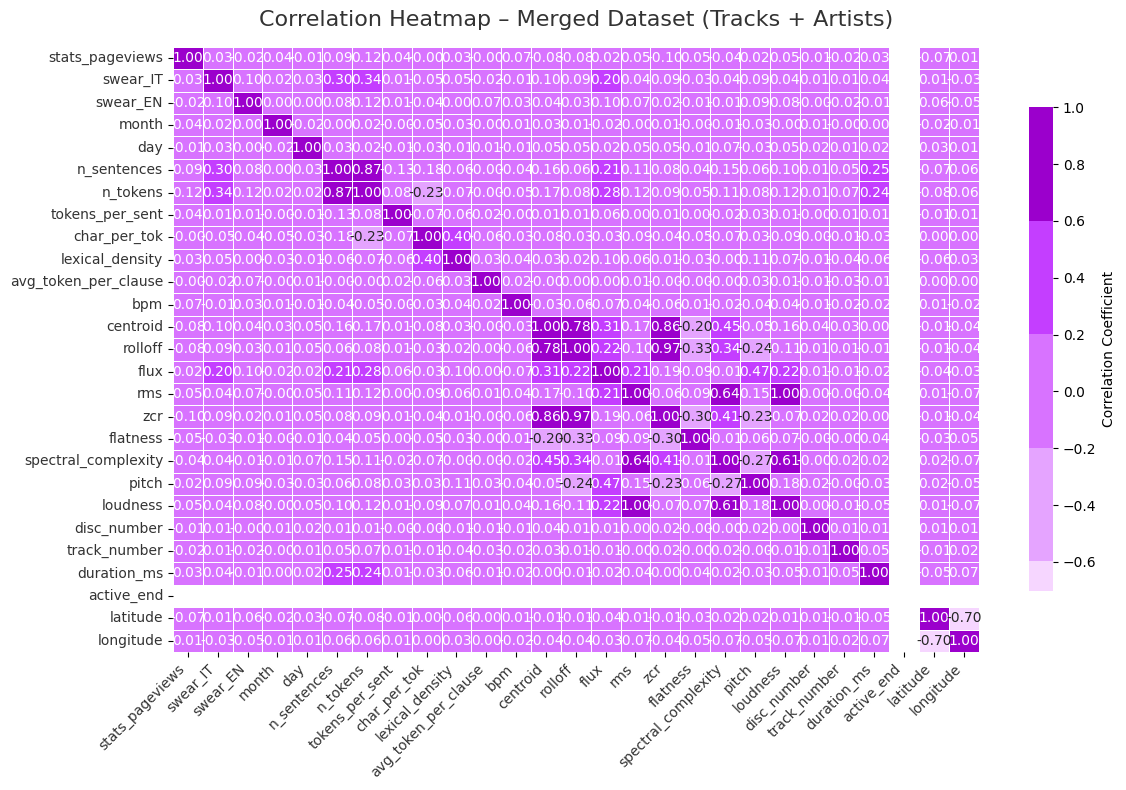

In [3065]:
# Correlation Heatmap for TRACKS dataset
print("=== Correlation Heatmap: TRACKS dataset ===")
plot_correlation_heatmap(tracks, "Tracks Dataset")

# Correlation Heatmap for ARTISTS dataset
print("=== Correlation Heatmap: ARTISTS dataset ===")
plot_correlation_heatmap(artists, "Artists Dataset")

# Correlation Heatmap for MERGED dataset (df)
print("=== Correlation Heatmap: MERGED dataset ===")
plot_correlation_heatmap(df, "Merged Dataset (Tracks + Artists)")

## Inspecting Missing Values
This code analyzes missing values in the DataFrame by counting how many entries are NaN for each column and calculating the corresponding percentage. It creates a summary table showing only columns with missing data, sorted by the highest percentage.

In [3066]:
# Calcolo missing values e percentuali
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = (
    pd.DataFrame({'missing_count': missing_count, 'missing_percent': missing_percent})
    .sort_values('missing_percent', ascending=False)
    .query('missing_percent > 0')
)

# Mostra tabella riepilogativa (gradiente rosso-magenta)
display(
    missing_df
    .style.background_gradient(subset=['missing_percent'], cmap='RdPu')  
    .format({'missing_percent': '{:.2f}%'})
)


,missing_count,missing_percent
active_end,11166,100.00%
featured_artists,7649,68.50%
stats_pageviews,6524,58.43%
active_start,4601,41.21%
region,3142,28.14%
province,2699,24.17%
country,2699,24.17%
nationality,2609,23.37%
birth_place,2578,23.09%
latitude,2578,23.09%


The following heatmap visualizes missing values in the dataset, with each row representing a record and each column a feature. Colored cells indicate missing entries, providing a clear overview of where data is incomplete.

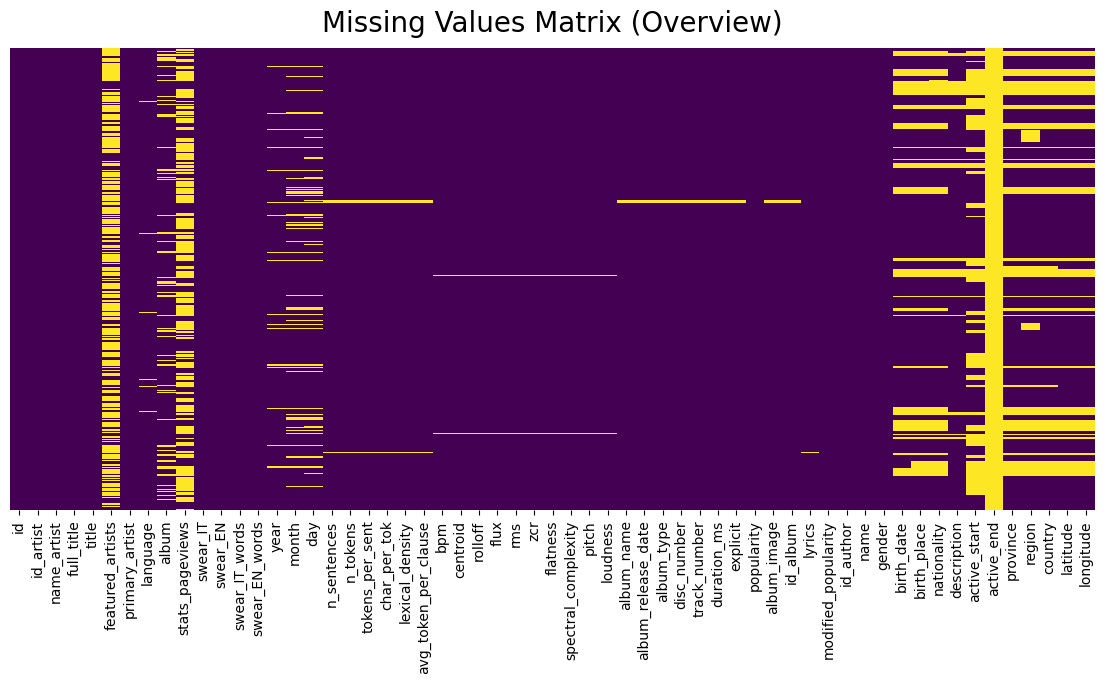

In [3067]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Matrix (Overview)", fontsize=20, pad=12, color="#000000")
plt.show()



The following bar plot shows the percentage of missing values per feature, with the top 20 features that have the most missing data

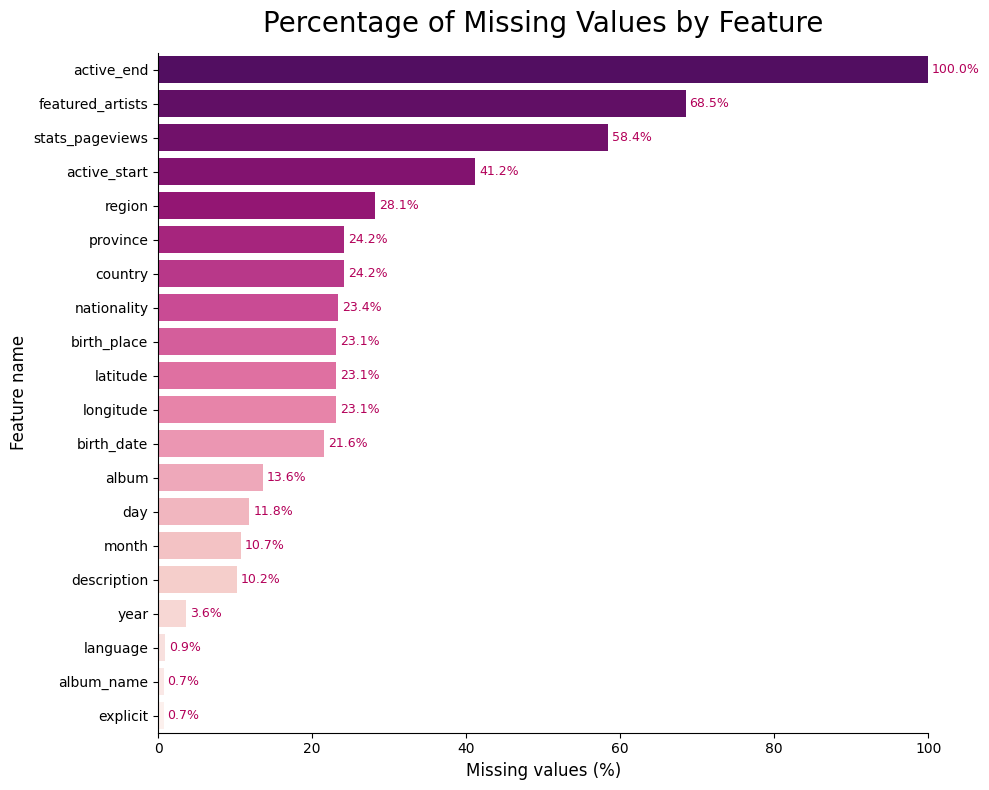

In [3068]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=missing_df.head(20),
    x='missing_percent',
    y=missing_df.head(20).index,
    hue=missing_df.head(20).index,  
    palette='RdPu_r'  
)
plt.title("Percentage of Missing Values by Feature", fontsize=20, pad=15, color="#000000")
plt.xlabel("Missing values (%)", fontsize=12)
plt.ylabel("Feature name", fontsize=12)

# Etichette percentuali
for index, value in enumerate(missing_df.head(20)['missing_percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#b30059')

plt.xlim(0, 100)
sns.despine()
plt.tight_layout()
plt.show()

#### Missing Values Propagation After Merge

In [3069]:
artists_missing = artists.isna().mean().sort_values(ascending=False) * 100
print(artists_missing)

active_end      100.000000
active_start     51.923077
region           34.615385
province         32.692308
country          32.692308
nationality      31.730769
birth_place      30.769231
latitude         30.769231
longitude        30.769231
birth_date       29.807692
description      17.307692
gender            0.000000
id_author         0.000000
name              0.000000
dtype: float64


The visualization highlights that missing values in attributes such as active_start, region, and birth_place have increased after merging due to the replication of incomplete artist metadata across multiple tracks.
This confirms that the merge process did not introduce new nulls, but propagated pre-existing ones.

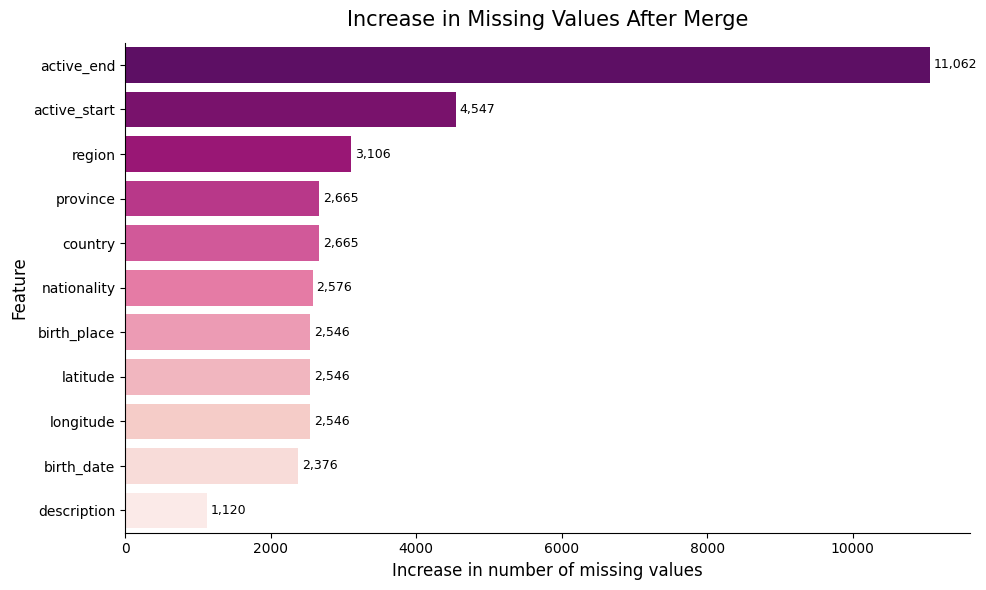

In [3070]:
# Colonne provenienti dal dataset artists 
artist_cols =list(artists.columns)

# Conta i NaN prima e dopo il merge
missing_before = artists[artist_cols].isna().sum()
missing_after = df[artist_cols].isna().sum()

# Differenza assoluta e percentuale
missing_diff = missing_after - missing_before
increase_percent = (missing_diff / missing_before.replace(0, pd.NA)) * 100

# Tabella riepilogativa
missing_summary = (
    pd.DataFrame({
        "missing_before": missing_before,
        "missing_after": missing_after,
        "difference": missing_diff,
        "increase_%": increase_percent
    })
    .sort_values("difference", ascending=False)
)

plot_df = missing_summary[missing_summary['difference'] > 0].copy()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='difference',
    y=plot_df.index,
    hue=plot_df.index,
    palette='RdPu_r'
)
plt.title("Increase in Missing Values After Merge", fontsize=15, pad=12, color="#000000")
plt.xlabel("Increase in number of missing values", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Etichette numeriche a fianco delle barre
for index, value in enumerate(plot_df['difference']):
    plt.text(value + 50, index, f"{int(value):,}", va='center', fontsize=9, color="#000000")

sns.despine()
plt.tight_layout()
plt.show()

After analyzing the percentage of missing values in each column, We need to better understand the overall data quality before applying any filling strategies. Cleaning and validating the data first ensures that missing values are handled correctly and that no incorrect or misleading information is introduced during imputation.

## Feature Inspection

In [3071]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

### Initial Data Cleaning

Based on the initial exploration of the dataset, we:

- **Removed empty column (`active_end`)** since it contained no useful information.  
- **Converted `popularity` and `year`** to numeric types to ensure consistency and enable statistical analysis.  
- **Transformed date-related columns** (`album_release_date`, `birth_date`, `active_start`, ) into proper datetime format for easier time-based operations.

Before  converting year and popularity from objects to numeric and album_release_date, birth_date, and active_start from objects to datetime, we need to inspect the data to check if all values can be converted correctly and handle those that cannot be converted


In [3072]:
# 1. Remove empty column
df.drop(columns=['active_end'], inplace=True)  # drop the 'active_end' column because it's empty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

#### Objects to Numeric
Inspecting the values in popularity and year columns to see the values that cannot be converted to numbers directly

In [3073]:
numeric_cols = ['popularity','year']



# --- Check numeric columns ---
for col in numeric_cols:
    original = df[col].copy()
    converted = pd.to_numeric(original, errors='coerce')
    non_convertible = original[original.notna() & converted.isna()]
    
    print(f"\nColumn '{col}'  entries that cannot be converted to numeric:")
    if not non_convertible.empty:
        for idx, val in non_convertible.items():
            print(f"Row {idx}: {val}")
    else:
        print("All non-missing entries can be converted to numeric.")
    print('----------------------------------------------------------------')


Column 'popularity'  entries that cannot be converted to numeric:
Row 1932: AbnFbmOH
Row 2304: 549%
Row 3669: 692%
Row 3672: none
Row 3673: 950%
Row 3675: ub52Ztd2
Row 3676: 929%
Row 3677: none
Row 3684: 9642K
Row 3688: 8318K
Row 3692: NHpCq5Qn
Row 3693: 5108M
Row 3697: Tpig
Row 3701: unknown
Row 3702: 865%
Row 3706: 267%
Row 3707: 962%
Row 3710: 6917views
Row 3712: UVvsjaSS
Row 3715: 9356views
Row 3719: 318%
Row 3720: unknown
Row 3723: 2104views
Row 3731: 4742K
Row 3732: 4343views
Row 3734: 2505M
Row 3735: ebuFr
----------------------------------------------------------------

Column 'year'  entries that cannot be converted to numeric:
Row 681: nPmvFS
Row 787: MoKKcY
Row 1299: PdLLvs
Row 1443: Tr5ghq
Row 1456: FZM9N5
Row 1593: 3KBIhx
Row 1614: 7arrc9
Row 1782: 0S4bYq
Row 1790: Ww2RM0
Row 1792: YDWvPA
Row 2173: v9Gs4k
Row 3164: 1uWHmg
Row 3179: s7ujOB
Row 3608: CeZdpY
Row 4043: DkWnRx
Row 4479: oiiWuy
Row 4617: IlHfzv
Row 5025: uUsYUb
Row 5615: unxIUH
Row 6135: iW9Q9J
Row 6329: td0lg8



Looking at the values of the  `popularity` column, we noticed that some entries contained **non-numeric characters**, percent signs (`%`), abbreviations like `K` (thousands) or `M` (millions), and words such as `"views"` appended to the numbers.

Instead of converting the column directly to numeric using pd.to_numeric(errors='coerce'), which would have turned all invalid entries into NaN, we need to apply a cleaning function to preserve and correctly interpret useful numeric information before conversion. The function:

- Removed non-numeric characters and words like `"views"` and `%`.
- Converted abbreviations (`K → 1,000`, `M → 1,000,000`) to numeric values.
- Extracted the first numeric part if extra text was present.
- Converted the cleaned values to floats, marking any remaining invalid entries as `NaN`.


In [3074]:
def clean_popularity(value):
    if pd.isna(value):
        return None
    value_str = str(value).strip().lower()  # normalize
    
    # Remove common words like 'views'
    value_str = value_str.replace('views','').replace('%','').strip()
    value_str = value_str.lower()  
    # Handle K and M
    multiplier = 1
    if value_str.endswith('k'):
        multiplier = 1_000
        value_str = value_str[:-1]
    elif value_str.endswith('m'):
        multiplier = 1_000_000
        value_str = value_str[:-1]
    
    # Take only first token if words remain
    value_str = value_str.split()[0]
    
    # Try converting to float
    try:
        return float(float(value_str) * multiplier)
    except:
        return None  # invalid entries become None/NaN
    
df['popularity'] =df['popularity'].apply(clean_popularity)




Inspecting the values in the year column, we observed that while most entries were numerical, some contained unexpected or non-numeric characters. To handle this, we converted the column directly to a numeric type using pd.to_numeric() with the errors='coerce' parameter, which automatically transforms any invalid or non-numeric values into NaN.

In [3075]:
df['year'] = pd.to_numeric(df['year'], errors='coerce') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10728 non-null  float64
 15  month              

#### Objects to DateTime

Inspecting the values in 'album_release_date', 'birth_date', 'active_start' columns to see the values that cannot be converted to DateTime directly

In [3076]:
date_cols = ['album_release_date', 'birth_date', 'active_start']
# --- Check date columns ---
for col in date_cols:
    original = df[col].copy()
    converted = pd.to_datetime(original, errors='coerce')
    non_convertible = original[original.notna() & converted.isna()]
    
    print(f"\nColumn '{col}'  entries that cannot be converted to datetime:")
    if not non_convertible.empty:
        for idx, val in non_convertible.items():
            print(f"Row {idx}: {val}")
    else:
        print("All non-missing entries can be converted to datetime.")
    print('----------------------------------------------------------------')


Column 'album_release_date'  entries that cannot be converted to datetime:
Row 283: 2013
Row 443: 1955
Row 1101: 2010
Row 1113: 2010
Row 1547: 2004
Row 1549: 2000
Row 1562: 2000
Row 1574: 1998
Row 1581: 2001
Row 1592: 2004
Row 1601: 2004
Row 1615: 2004
Row 1616: 2004
Row 1617: 2004
Row 1618: 2004
Row 1620: 2004
Row 1621: 2004
Row 1622: 2004
Row 1623: 1998
Row 1625: 2004
Row 1626: 1998
Row 1627: 2004
Row 1628: 2004
Row 1951: 1995
Row 1957: 1995
Row 1960: 1995
Row 1964: 1995
Row 1966: 1995
Row 1967: 1995
Row 1971: 1995
Row 1972: 1995
Row 1973: 1995
Row 1982: 1995
Row 2016: 2002
Row 2018: 2002
Row 2024: 2002
Row 2030: 2002
Row 2033: 2002
Row 2040: 2007
Row 2051: 2002
Row 2052: 2007
Row 2064: 2007
Row 2070: 2007
Row 2071: 2002
Row 2078: 2002
Row 2079: 2002
Row 2091: 2007
Row 2096: 2002
Row 2098: 2002
Row 2103: 2007
Row 2107: 2002
Row 2109: 2007
Row 2118: 2002
Row 2121: 2007
Row 2126: 2002
Row 2127: 2007
Row 2132: 2007
Row 2134: 2007
Row 2143: 2002
Row 2147: 2007
Row 2157: 2007
Row 2162: 2

Looking at the values in the album_release_date column that could not be converted to datetime, we noticed that many of them were just years (e.g., "2004"). If we used pd.to_datetime(errors='coerce') directly, these entries would have been turned into NaT. However, we wanted to keep this information by assigning a default month and day — the first day of the year.

- Instead of converting the column directly, we applied a cleaning function that:

- Detected values that were only a year (e.g., "2004") and changed them to a full date ("2004-01-01").

- Kept valid full dates (e.g., "2021-04-09") unchanged.

- Left missing values as they are.

- Finally, converted everything into proper datetime format for consistency.

In [3077]:
def fix_year_only_dates(val):
    """
    If the value looks like a 4-digit year, convert it to 'YYYY-01-01'.
    Otherwise, return the original value.
    """
    if pd.isna(val):
        return val
    val_str = str(val).strip()
    if re.fullmatch(r'\d{4}', val_str):
        return f"{val_str}-01-01"
    return val_str

# Apply to album_release_date
df['album_release_date'] = df['album_release_date'].apply(fix_year_only_dates)

# Convert to datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11166 non-null  object        
 1   id_artist             11166 non-null  object        
 2   name_artist           11166 non-null  object        
 3   full_title            11166 non-null  object        
 4   title                 11166 non-null  object        
 5   featured_artists      3517 non-null   object        
 6   primary_artist        11166 non-null  object        
 7   language              11061 non-null  object        
 8   album                 9652 non-null   object        
 9   stats_pageviews       4642 non-null   float64       
 10  swear_IT              11166 non-null  int64         
 11  swear_EN              11166 non-null  int64         
 12  swear_IT_words        11166 non-null  object        
 13  swear_EN_words  

Based on the values that could not be converted to datetime, we found that the birth_date column contained several invalid entries, such as URLs (e.g., "http://www.wikidata.org/.well-known/genid/...") instead of actual dates. Since these values do not represent meaningful or recoverable information, there is nothing worth preserving. Therefore, we are going to apply the pd.to_datetime(errors='coerce') function directly, allowing all invalid entries to be converted to NaT.

For the active_start column, all non-missing entries are  already in a valid date format, so they are going to be  successfully converted to datetime without any issues.

In [3078]:


date_cols = ['birth_date', 'active_start', ]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # convert to datetime, invalid dates become NaT


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11166 non-null  object        
 1   id_artist             11166 non-null  object        
 2   name_artist           11166 non-null  object        
 3   full_title            11166 non-null  object        
 4   title                 11166 non-null  object        
 5   featured_artists      3517 non-null   object        
 6   primary_artist        11166 non-null  object        
 7   language              11061 non-null  object        
 8   album                 9652 non-null   object        
 9   stats_pageviews       4642 non-null   float64       
 10  swear_IT              11166 non-null  int64         
 11  swear_EN              11166 non-null  int64         
 12  swear_IT_words        11166 non-null  object        
 13  swear_EN_words  

### Data Distribution
The following table and histogram show the numerical data distribution in the dataset:

- **Most features** (`n_sentences`, `n_tokens`, `tokens_per_sent`, `char_per_tok`, `lexical_density`, `avg_token_per_clause`, `centroid`, `rolloff`, `rms`, `zcr`, `flatness`, `flux`, `spectral_complexity`, `pitch`, `loudness`) show **bell-shaped or near-normal distributions**.

- **Highly skewed features** (`stats_pageviews`, `bpm`, `tokens_per_sent`, `duration_ms`, `popularity`) have a **long right tail**, indicating a few extreme values or outliers (common in popularity or count-based features).

- **Temporal features** (`year`, `month`, `day`) display **non-uniform distributions**; e.g., `year` is concentrated around recent decades, showing most songs are modern.

- **Geographical features** (`latitude`, `longitude`) have **peaks corresponding to specific locations**, likely representing where artists or tracks are clustered.


,count,mean,std,min,25%,50%,75%,max
stats_pageviews,4642.000000,36993.646919,58406.564657,5006.000000,9642.250000,19099.500000,42011.750000,1971207.000000
swear_IT,11166.000000,2.343006,3.704831,0.000000,0.000000,1.000000,3.000000,72.000000
swear_EN,11166.000000,0.711177,2.555423,0.000000,0.000000,0.000000,0.000000,72.000000
year,10728.000000,2012.651286,33.288337,1900.000000,2009.000000,2016.000000,2021.000000,2100.000000
month,9969.000000,6.198515,3.482992,1.000000,3.000000,6.000000,10.000000,12.000000
day,9843.000000,15.808697,8.881989,1.000000,9.000000,16.000000,23.000000,31.000000
n_sentences,11090.000000,59.399639,24.711996,1.000000,46.000000,58.000000,73.000000,437.000000
n_tokens,11090.000000,496.891253,209.187612,3.000000,372.000000,491.000000,615.000000,3089.000000
tokens_per_sent,11090.000000,8.672152,5.675602,1.500000,7.333333,8.404762,9.431527,400.000000
char_per_tok,11090.000000,4.054416,0.445958,2.000000,3.866946,4.012709,4.168686,12.000000


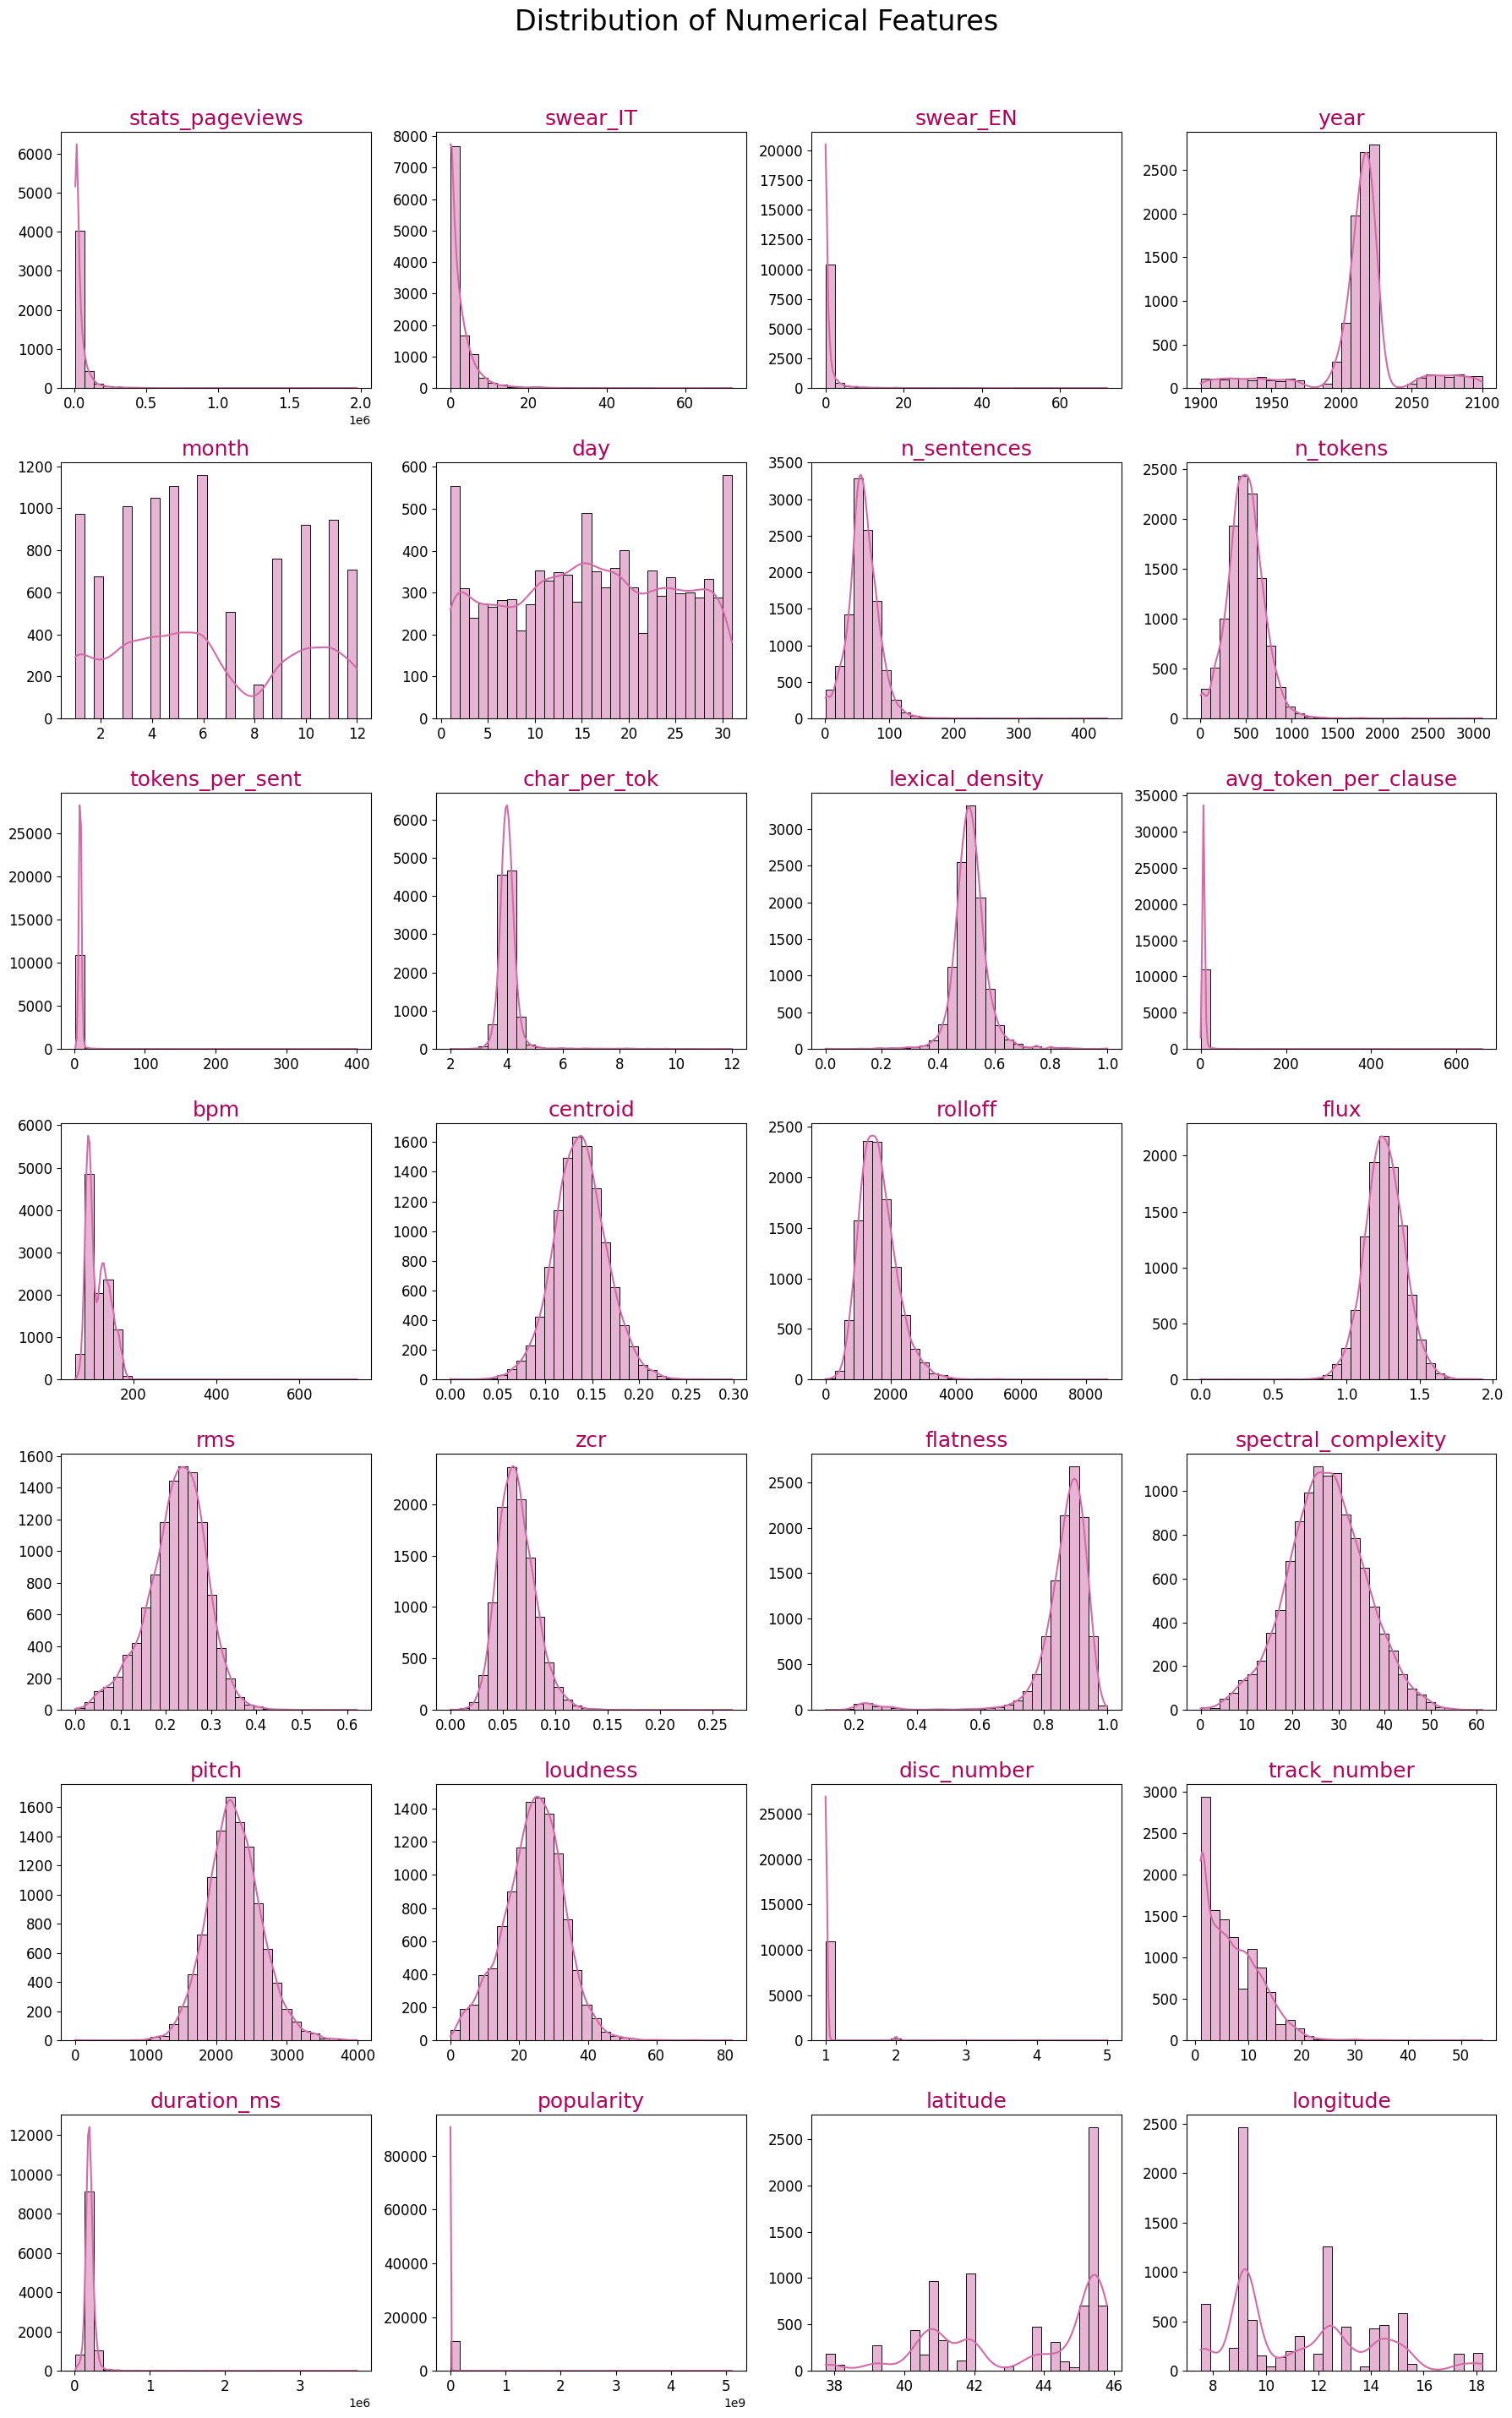

In [3079]:

# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Summary statistics table ---
display(df[num_cols].describe().T.style.background_gradient(cmap='RdPu'))

# --- Histograms for each numeric column ---
n_cols = 4
n_rows = -(-len(num_cols) // n_cols)  # ceil division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="#d36ba8", ax=axes[i])
    axes[i].set_title(col, fontsize=18, color="#b30059")   # larger title font
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='both', labelsize=12)          # larger tick labels

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution of Numerical Features", fontsize=24, color="#000000", y=1.02)  # larger main title
plt.tight_layout()
plt.show()



The data distribution and the statistics presented above reveal some anomalies and irregularities in the dataset. These issues will be examined and addressed in the following section.


###  Features Inspection Anomalies Detection

#### Artists Names
This code groups the dataset by artist name to count how many songs each artist has, then displays the total number of unique artists and sorts them by song count. The analysis shows that there are 104 unique artists in the dataset. Among them, Mondo Marcio, Guè Pequeno, and Gemitaiz are the most prolific, each with over 300 songs. Other highly represented artists include Bassi Maestro, Fabri Fibra, and Vacca, each contributing more than 250 songs. On the other hand, a few artists such as O Zulù, Joey Funboy, and Hindaco have only a handful of tracks. Overall, the distribution highlights a few artists dominating the dataset while many others have significantly fewer songs.

(11166, 58)

Total number of unique artists: 104
Unique Artists and Their Song Count:
              name  song_count
103   mondo marcio         353
101    guè pequeno         333
102       gemitaiz         333
100  bassi maestro         279
99     fabri fibra         275
..             ...         ...
4          mistico           4
1      joey funboy           3
2          hindaco           3
3    miss simpatia           3
0           o zulù           2

[104 rows x 2 columns]


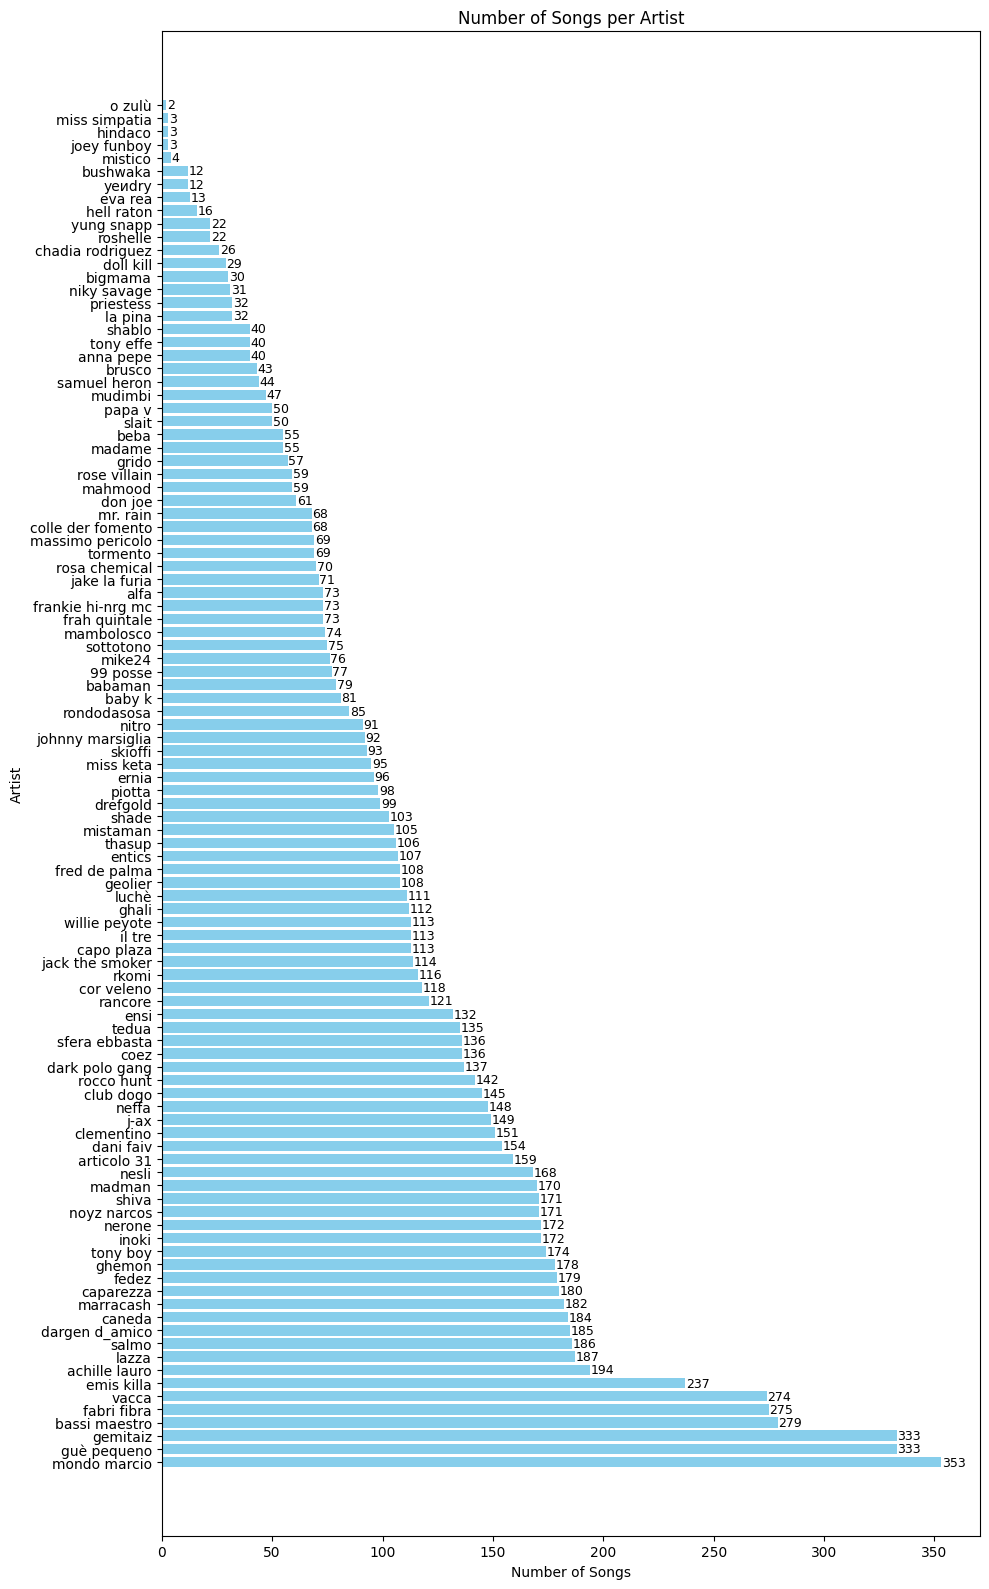

In [3080]:
print(df.shape)
# The result is a Pandas Series where the index is the artist name and the values are the counts.
artist_song_counts = df.groupby('name').size().sort_values(ascending=True)

# 2. Convert the Series to a DataFrame for cleaner display
artist_counts_df = artist_song_counts.reset_index(name='song_count')
# To see the total number of unique artists:
print(f"\nTotal number of unique artists: {len(artist_counts_df)}")

# 3. Print the results
print("Unique Artists and Their Song Count:")
print(artist_counts_df.sort_values(by='song_count',  
    ascending=False))



# Sort by song count (descending for better view)
artist_counts_df = artist_counts_df.sort_values(by='song_count', ascending=False)

plt.figure(figsize=(10, 16))
bars = plt.barh(artist_counts_df['name'], artist_counts_df['song_count'], color='skyblue')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.title('Number of Songs per Artist')

# Add numbers on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3,               # x position (a bit after the end of the bar)
             bar.get_y() + bar.get_height()/2,  # y position (middle of bar)
             str(int(width)),           # text (integer value)
             va='center', fontsize=9)

plt.tight_layout()
plt.show()



#### Artists Description
The folowing code counts how many times each unique description appears in the dataset. This helps identify which artist descriptions are the most common or repeated, showing patterns such as groups of artists sharing the same description or potential duplicates.

The results show how the most frequent artist descriptions in the dataset. Most entries describe Italian rappers, producers, or singer-songwriters, reflecting that the dataset mainly focuses on Italian music artists.

For instance, “gruppo musicale italiano” (Italian music group) appears 620 times, making it the most common description.

Interestingly, there are also some non-musical or unrelated entries, like “dio indiano della distruzione e della trasformazione” (Indian god of destruction and transformation) or “tipo di barca a vela usata nel XVIII e XIX secolo” (type of sailing ship used in the 18th–19th century). These seem to be data errors.

We also noticed an entry labeled “gruppo musicale canadese” (Canadian music group). Upon checking, this description is incorrectly assigned to the Italian rapper Priestess. Further research revealed a mix-up with a Canadian band that shares the same name. This confusion becomes evident when comparing the active_start year in the dataset, which matches that of the Canadian group rather than the Italian artist.  

In [3081]:
df['description'].value_counts()

description
gruppo musicale italiano                             620
rapper e produttore discografico italiano            464
rapper italiano                                      379
rapper italiano (1989-)                              358
rapper e produttore discografico italiano (1979-)    353
                                                    ... 
rapper italiana (1998-)                               26
produttore discografico e rapper italiano             22
cantante e rapper italiana (1995-)                    22
rapper e produttore discografico italiano (1990-)     16
tipo di barca a vela usata nel XVIII e XIX secolo      4
Name: count, Length: 69, dtype: int64

##### Correcting "Priestess" Entry 

In [3082]:
print('Before')
display( df[df['description'].str.contains('gruppo musicale canadese', case=False, na=False)]
    .drop_duplicates(subset=['name'])
    .sort_values(by='name'))

print('After')
# Fix Priestess' incorrect description and active_start date
df.loc[df['name'].str.lower() == 'priestess', ['description', 'active_start']] = [
    'cantante e rapper italiana', 
    '2017-01-01'
]

# Verify the update
print(df[df['name'].str.lower() == 'priestess'][['name', 'description', 'active_start']])


Before


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,birth_date,birth_place,nationality,description,active_start,province,region,country,latitude,longitude
9797,TR874555,ART87389753,Priestess,Maria Antonietta by Priestess,Maria Antonietta,NaN,Priestess,it,Torno domani - EP,36046.0,...,NaT,NaN,NaN,gruppo musicale canadese,2003-01-01,NaN,NaN,NaN,NaN,NaN


After
           name                 description active_start
9797  priestess  cantante e rapper italiana   2017-01-01
9798  priestess  cantante e rapper italiana   2017-01-01
9799  priestess  cantante e rapper italiana   2017-01-01
9800  priestess  cantante e rapper italiana   2017-01-01
9801  priestess  cantante e rapper italiana   2017-01-01
9802  priestess  cantante e rapper italiana   2017-01-01
9803  priestess  cantante e rapper italiana   2017-01-01
9804  priestess  cantante e rapper italiana   2017-01-01
9805  priestess  cantante e rapper italiana   2017-01-01
9806  priestess  cantante e rapper italiana   2017-01-01
9807  priestess  cantante e rapper italiana   2017-01-01
9808  priestess  cantante e rapper italiana   2017-01-01
9809  priestess  cantante e rapper italiana   2017-01-01
9810  priestess  cantante e rapper italiana   2017-01-01
9811  priestess  cantante e rapper italiana   2017-01-01
9812  priestess  cantante e rapper italiana   2017-01-01
9813  priestess  cantante

##### Identifying groups in the dataset

This filter identifies all artists whose description includes the word "gruppo", which typically refers to musical groups or bands. The resulting list contains 7 well-known Italian music groups, such as 99 Posse, Articolo 31, Club Dogo, Colle Der Fomento, Cor Veleno, Dark Polo Gang, and Sottotono.

In [3083]:
# Filter rows where 'description' contains 'gruppo'
artists_with_gruppo = (
    df[df['description'].str.contains('gruppo', case=False, na=False)]
[['name','description','birth_date','active_start']]
    .drop_duplicates(subset=['name'])
    .sort_values(by='name')
)

print("Artists with 'grupoo' in their description:",artists_with_gruppo.shape )
display(artists_with_gruppo)


Artists with 'grupoo' in their description: (7, 4)


,name,description,birth_date,active_start
6274,99 posse,gruppo musicale italiano,NaT,1991-01-01
3360,articolo 31,gruppo musicale hip hop italiano,NaT,1990-01-01
1806,club dogo,gruppo musicale italiano,NaT,NaT
9120,colle der fomento,gruppo musicale italiano,NaT,NaT
8668,cor veleno,gruppo musicale italiano,NaT,1993-01-01
8983,dark polo gang,gruppo musicale italiano,NaT,2014-01-01
9188,sottotono,gruppo musicale italiano,NaT,NaT


#### Artist's BirthDate


##### Distribution of artist birth_date

This code extracts each artist’s birth year and groups them by decade (e.g., 1960s, 1970s, 1980s, etc.) to analyze how artists are distributed over time. It calculates the percentage of artists born in each decade and visualizes it with a bar chart. The results show that most artists were born between the 1980s and 1990s, indicating that the majority belong to the Millennial generation, while fewer artists were born in the 1960s or after 2000.

It also shows the histogram of the birth year

Number of missing values in 'birthdate' column: 2578


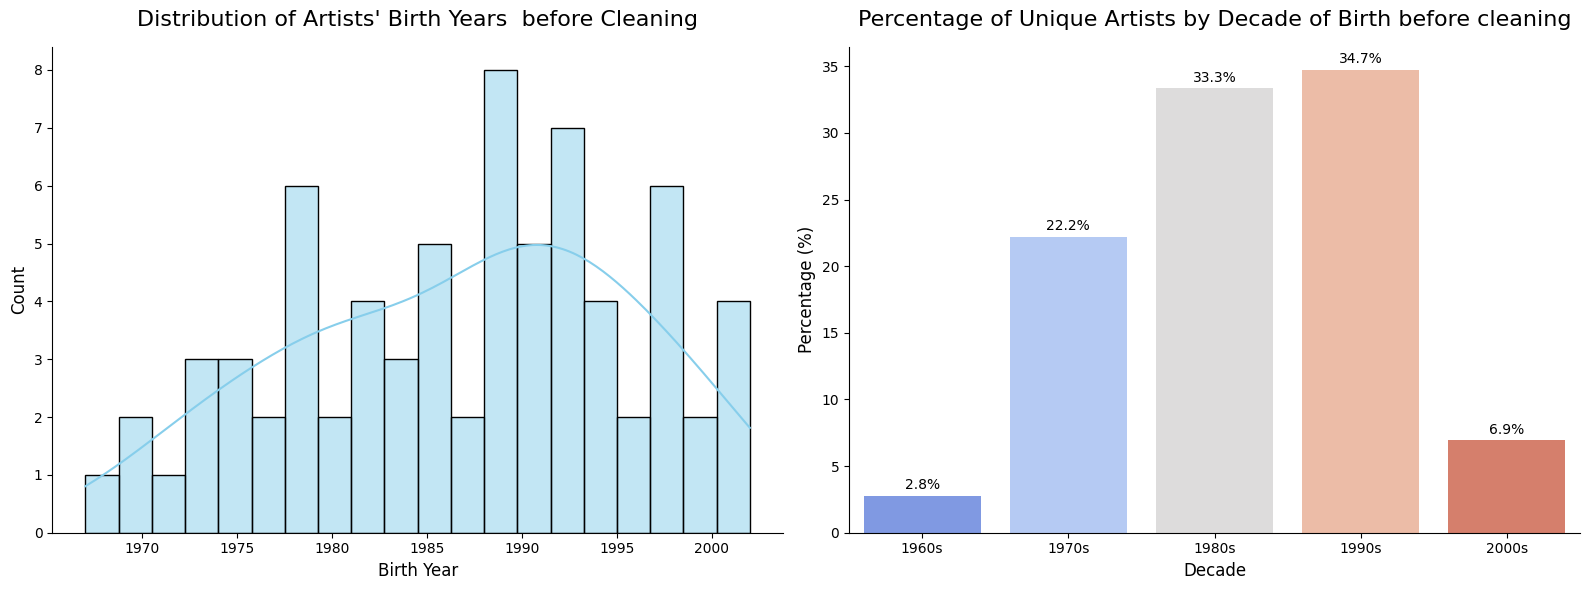

Index(['id', 'id_artist', 'name_artist', 'full_title', 'title',
       'featured_artists', 'primary_artist', 'language', 'album',
       'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words',
       'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens',
       'tokens_per_sent', 'char_per_tok', 'lexical_density',
       'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms',
       'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness',
       'album_name', 'album_release_date', 'album_type', 'disc_number',
       'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image',
       'id_album', 'lyrics', 'modified_popularity', 'id_author', 'name',
       'gender', 'birth_date', 'birth_place', 'nationality', 'description',
       'active_start', 'province', 'region', 'country', 'latitude',
       'longitude'],
      dtype='object')


In [3084]:
# Count missing values in 'birthdate' column
missing_birthdates = df['birth_date'].isna().sum()

print(f"Number of missing values in 'birthdate' column: {missing_birthdates}")



def plot_birth_decades(df ,title1, title2):
    """
    Plots:
      1. Histogram of birth years
      2. Percentage of unique artists by decade of birth

    Parameters:
        df (pd.DataFrame): DataFrame containing at least 'name' and 'birth_date' columns.
    """
    # --- 1. Keep only unique artists ---
    unique_artists = df.drop_duplicates(subset=['name'])

    # --- 2. Extract birth year ---
    birth_year = unique_artists['birth_date'].dt.year

  
    # Drop missing values
    birth_year = birth_year.dropna()

    # --- 4. Create decade bins ---
    start = (int(birth_year.min()) // 10) * 10
    end = (int(birth_year.max()) // 10 + 1) * 10
    bins = list(range(start, end + 1, 10))
    labels = [f"{b}s" for b in bins[:-1]]

    # --- 5. Assign decades ---
    decades = pd.cut(birth_year, bins=bins, labels=labels, right=False)

    # --- 6. Calculate percentage per decade ---
    group_percent = decades.value_counts(normalize=True).sort_index() * 100
    group_df = pd.DataFrame({'decade': group_percent.index, 'percent': group_percent.values})

    # --- 7. Plot both charts side by side ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram of birth years
    sns.histplot(birth_year, bins=20, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(title1, fontsize=16, pad=15)
    axes[0].set_xlabel("Birth Year", fontsize=12)
    axes[0].set_ylabel("Count", fontsize=12)

    # Percentage per decade
    sns.barplot(data=group_df, x='decade', y='percent', hue='decade', palette='coolwarm', legend=False, ax=axes[1])
    for i, val in enumerate(group_df['percent']):
        axes[1].text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)
    axes[1].set_title(title2, fontsize=16, pad=15)
    axes[1].set_xlabel("Decade", fontsize=12)
    axes[1].set_ylabel("Percentage (%)", fontsize=12)

    sns.despine()
    plt.tight_layout()
    plt.show()


plot_birth_decades(df, "Distribution of Artists' Birth Years  before Cleaning",'Percentage of Unique Artists by Decade of Birth before cleaning')

# Confirm df is unchanged
print(df.columns)


##### Distribution of artist ages
The results show the distribution of unique artists’ ages in the dataset, ranging from 22 to 58 years old. Most artists fall between their late 20s and mid-40s, with small peaks around ages 32, 36, and 46, each having between 6 and 7 artists. Younger artists under 25 and older ones above 50 are less represented. Overall, the majority of artists are in their thirties and early forties, reflecting the typical active and productive age range in the music industry.

2025-11-10 16:44:02,255 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-10 16:44:02,262 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Number of unique artists per age:
birth_date
23    2
24    2
25    1
26    1
27    3
28    3
29    1
30    1
31    4
32    5
33    2
34    3
35    2
36    6
37    2
38    2
39    2
40    3
41    1
42    2
43    3
44    1
45    2
46    6
49    2
50    3
52    3
53    1
55    1
56    1
58    1
Name: count, dtype: int64


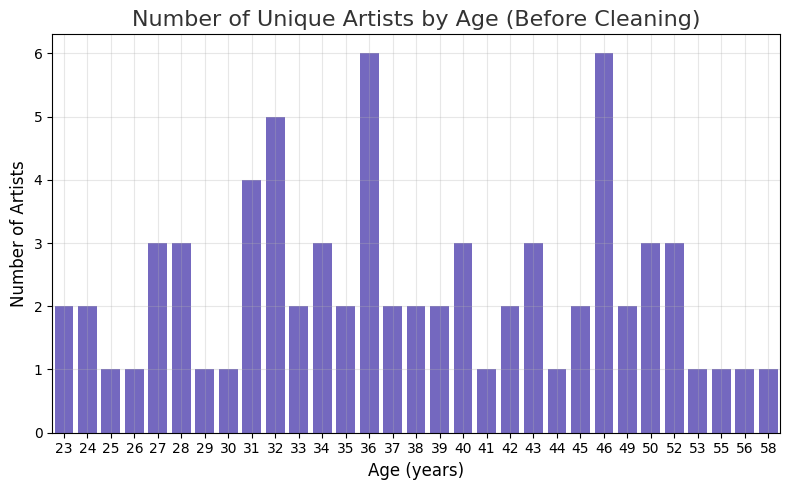

In [3085]:

def plot_artist_ages(df,title):
    """
    Calculates and plots the number of unique artists by age.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least 'name' and 'birth_date' columns.
    """
    # --- 1. Keep only unique artists ---
    unique_artists = df.drop_duplicates(subset=['name'])

    # --- 2. Calculate current age ---
    today = pd.Timestamp.today()
    artist_age = today.year - unique_artists['birth_date'].dt.year

    # --- 3. Drop missing or invalid ages ---
    artist_age = artist_age.dropna().astype(int)

    # --- 4. Count how many unique artists have each exact age ---
    age_counts = artist_age.value_counts().sort_index()
    print("Number of unique artists per age:")
    print(age_counts)

    # --- 5. Plot the distribution ---
    plt.figure(figsize=(8, 5))
    sns.barplot(x=age_counts.index, y=age_counts.values, color="#6A5ACD")

    plt.title(title, fontsize=16, color="#333")
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Number of Artists", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
plot_artist_ages(df,"Number of Unique Artists by Age (Before Cleaning)")


##### Artists with no birthdate
This code shows the number of the artist that doesn't have a birthdate. They are 32.

In [3086]:

missing_birth_artists = df[df['birth_date'].isna()]['name'].drop_duplicates()
print(f"Number of artists with missing birth date: {missing_birth_artists.shape[0]}")

print("Artists with missing birth date:")
print(missing_birth_artists.tolist())

Number of artists with missing birth date: 32
Artists with missing birth date:
['beba', 'alfa', 'nerone', 'guè pequeno', 'skioffi', 'club dogo', 'hindaco', 'miss simpatia', 'eva rea', 'o zulù', 'doll kill', 'yeиdry', 'johnny marsiglia', 'articolo 31', 'mistico', 'miss keta', 'dargen d_amico', 'bushwaka', '99 posse', 'bigmama', 'brusco', 'cor veleno', 'mike24', 'dark polo gang', 'colle der fomento', 'sottotono', 'anna pepe', 'samuel heron', 'joey funboy', 'priestess', 'shiva', 'caneda']


##### Artists Names and their ages
This code generates a table showing each unique artist and their corresponding age, calculated from their birth date. Artists are listed from oldest to youngest, highlighting ages from 23 to 58 in this dataset. 

In [3087]:

# --- Calculate age without adding column to df ---
import pandas as pd

def display_artist_ages(df, title="Unique Artists and Their Age"):
    """
    Display a table of unique artists and their ages.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing at least 'name' and 'birth_date' columns.
        title (str): Custom title for the output.
    """
    # --- Compute current age in years ---
    today = pd.Timestamp.today()
    artist_age = (today - df['birth_date']).dt.days // 365

    # --- Create temporary DataFrame with unique artists and their age ---
    artist_age_df = pd.DataFrame({
        'name': df['name'],
        'age': artist_age
    }).drop_duplicates().sort_values(by='age', ascending=False)

    # --- Display the table ---
    print(title + ":")
    display(artist_age_df.style.background_gradient(cmap='coolwarm'))

    # --- Total number of unique artists ---
    print(f"\nTotal number of unique artists: {artist_age_df['name'].nunique()}")

display_artist_ages(df, title="Artists Age Overview Before filling null Values and Cleaning")


Artists Age Overview Before filling null Values and Cleaning:


,name,age
3519,neffa,58.000000
3667,frankie hi-nrg mc,56.000000
1951,la pina,55.000000
6012,j-ax,53.000000
3875,caparezza,52.000000
1531,piotta,52.000000
4095,bassi maestro,52.000000
685,babaman,50.000000
9829,tormento,50.000000
6584,don joe,50.000000



Total number of unique artists: 104


#### Artist's Active start Date

##### Percentage of Artists by Active Start Decade
The dataset contains 4,601 missing values in the active_start column, meaning a significant number of artists have no recorded career start date. Considering only unique artists, the distribution across decades shows that the 1990s (32%), 2000s (30%), and 2010s (32%) were the most common periods for artists to begin their careers, indicating a fairly even spread among these decades. Earlier decades like the 1980s (4%) and the 2020s (2%) have much fewer entries, likely reflecting fewer documented artists or incomplete data for those periods.

Number of missing values in 'active_start': 4601
Percentage of Unique Artists by Active Start Decade before Cleaning
  decade  percent
0  1980s      4.0
1  1990s     32.0
2  2000s     30.0
3  2010s     34.0


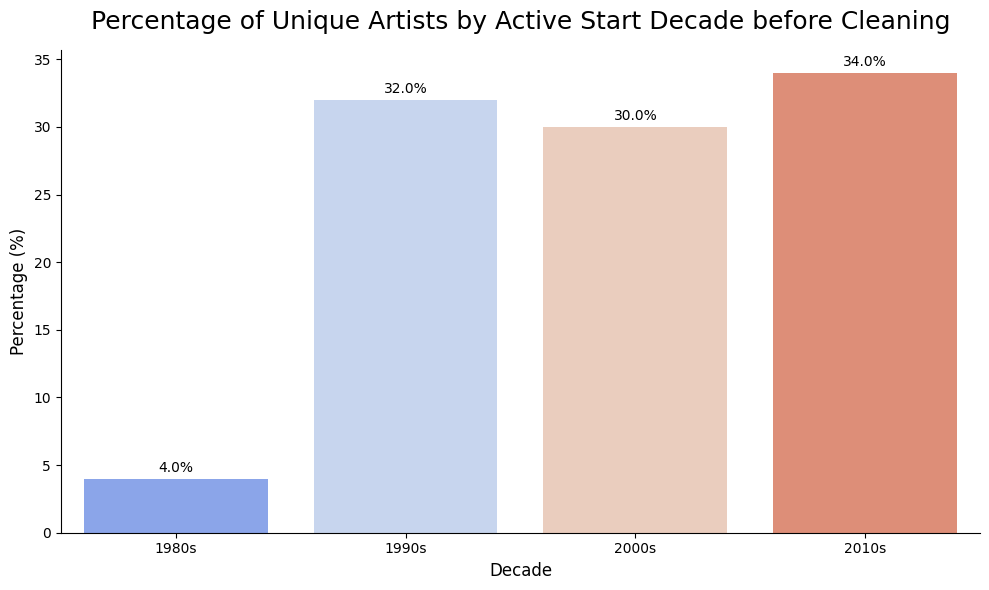

In [3088]:


def plot_active_start_decades(df, title, active_col='active_start', name_col='name'):
    """
    Plot percentage of unique artists by active start decade.
    """

    # --- Keep only unique artists based on name ---
    unique_df = df.drop_duplicates(subset=[name_col])

    # --- Extract year values, drop missing ---
    years = unique_df[active_col].dropna().dt.year

    # --- Define decade bins (e.g., 1960, 1970, ..., 2020) ---
    start = int(years.min() // 10 * 10)
    end = int(years.max() // 10 * 10 + 10)
    bins = list(range(start, end + 10, 10))
    labels = [f"{b}s" for b in bins[:-1]]

    # --- Bin into decades ---
    decade_groups = pd.cut(years, bins=bins, labels=labels, right=False)

    # --- Calculate percentages per decade ---
    group_percent = decade_groups.value_counts(normalize=True).sort_index() * 100
    group_df = pd.DataFrame({'decade': group_percent.index, 'percent': group_percent.values})

    # --- Print results ---
    print(title)
    print(group_df)

    # --- Plot ---
    plt.figure(figsize=(10, 6))
    sns.barplot(data=group_df, x='decade', y='percent', hue='decade', palette='coolwarm', legend=False)

    # --- Add percentage labels ---
    for i, val in enumerate(group_df['percent']):
        plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

    plt.title(title, fontsize=18, pad=15)
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()



print(f"Number of missing values in 'active_start': {df['active_start'].isna().sum()}")
plot_active_start_decades(df,'Percentage of Unique Artists by Active Start Decade before Cleaning')


##### Ages of artists when they started their career
The distribution of ages of unique artists when they started their careers shows that most began between 17 and 22 years old, which is reasonable. However, there are outliers, such as one artist listed as starting at age 1 and another at age 10, which clearly do not make sense. These anomalous values indicate potential data errors, and we need to investigate these specific cases to determine the best way to clean or correct the dataset.

Age of unique Artists When They Started Their Career Before Cleaning
10    1
13    1
14    3
15    4
16    1
17    8
18    8
19    3
20    5
21    4
22    3
23    1
24    1
27    1
Name: count, dtype: int64


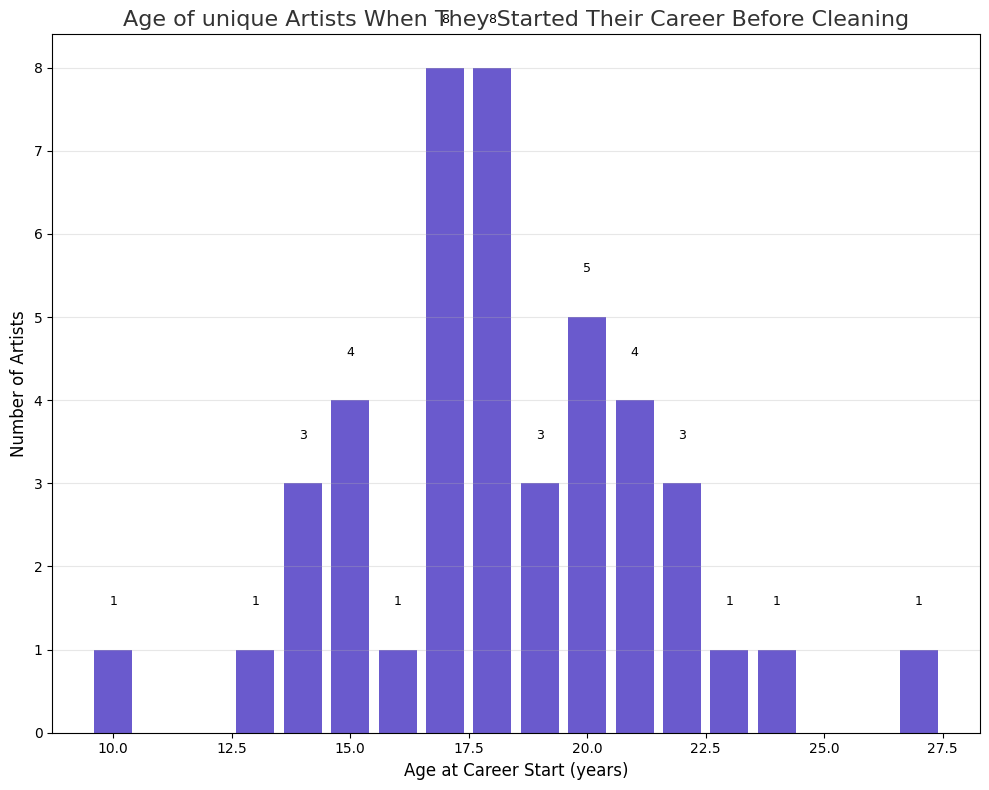

In [3089]:


def plot_age_at_career_start(df, title, birth_col='birth_date', active_col='active_start', name_col='name'):
    """
    Plot the distribution of unique artists' ages when they started their career.
    Does not modify the dataset or filter any values.
    """

    # --- Keep only unique artists based on name ---
    unique_df = df.drop_duplicates(subset=[name_col])

    # --- Compute age at career start ---
    age_at_start = (unique_df[active_col].dt.year - unique_df[birth_col].dt.year).dropna().astype(int)

    # --- Count occurrences ---
    age_counts = age_at_start.value_counts().sort_index()
    print(title)
    print(age_counts)

    # --- Plot ---
    plt.figure(figsize=(10, 8))
    bars = plt.bar(age_counts.index, age_counts.values, color="#6A5ACD")

    # --- Add counts on top of each bar ---
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
                 ha='center', va='bottom', fontsize=9)

    plt.title(title, fontsize=16, color="#333")
    plt.xlabel("Age at Career Start (years)", fontsize=12)
    plt.ylabel("Number of Artists", fontsize=12)
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


plot_age_at_career_start(df,'Age of unique Artists When They Started Their Career Before Cleaning')


##### Ckecking artist whose age was 10, 13, 27 when they started their career

Among the unique artists, several had unusual ages at career start.  Nesli (age 10) had incorrect active_start dates, while Salmo (age 13) and Mudimbi (age 27) were correct.  

We will correct them in Error Correction Part


In [3090]:
# Calculate age at career start without adding a column
ages = df['active_start'].dt.year - df['birth_date'].dt.year

# Filter rows where age is  10, or 13
outliers = df[ages.isin([ 10, 13,27])].copy()

# Keep only unique artists based on name
unique_outliers = outliers.drop_duplicates(subset=['name'])

# Print relevant information including age
print("Unique artists with age  10, 13, 27,  at career start:")
print(unique_outliers[['name', 'birth_date', 'active_start']].assign(age_at_start=ages))


Unique artists with age  10, 13, 27,  at career start:
         name birth_date active_start  age_at_start
1128  mudimbi 1986-10-17   2013-01-01          27.0
6645    nesli 1980-12-29   1990-01-01          10.0
9608    salmo 1984-06-29   1997-01-01          13.0


##### Artists with no active start date
This code shows the number of the artist that doesn't have a active start date. They are 54 out 104.

In [3091]:
# --- Filter rows where 'active_start' is missing ---
missing_active_start = df[df['active_start'].isna()]

# --- Compute earliest full release date (from year, month, day) per artist ---
release_dates = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
album_dates = pd.to_datetime(df['album_release_date'], errors='coerce')

# Group by artist and get earliest song date and earliest album release date
earliest_dates = (
    df.assign(_release_date=release_dates, _album_date=album_dates)
      .groupby('name', as_index=False)
      .agg({'_release_date': 'min', '_album_date': 'min'})
      .rename(columns={'_release_date': 'earliest_song_date', '_album_date': 'earliest_album_date'})
)

# --- Merge with artists missing 'active_start' ---
artists_missing_active = (
    missing_active_start[['name', 'active_start', 'birth_date']]
    .drop_duplicates()
    .merge(earliest_dates, on='name', how='left')
    .sort_values(by='name')
)

# --- Print the result ---
print("Artists without 'active_start' information (with birth dates, earliest song date, and earliest album release date):")
print(artists_missing_active.to_string(index=False))

# --- Optional count ---
print(f"\nTotal number of unique artists missing 'active_start': {artists_missing_active['name'].nunique()}")


Artists without 'active_start' information (with birth dates, earliest song date, and earliest album release date):
             name active_start birth_date earliest_song_date earliest_album_date
             alfa          NaT        NaT         1906-04-22          2006-02-28
        anna pepe          NaT        NaT         1907-06-28          1988-05-10
          babaman          NaT 1975-08-08         1942-09-21          2004-01-01
             beba          NaT        NaT         1908-06-07          2012-04-27
           brusco          NaT        NaT         1931-06-11          2003-09-01
         bushwaka          NaT        NaT         1925-04-14          2013-06-19
           caneda          NaT        NaT         1904-09-01          1993-01-01
       capo plaza          NaT 1998-04-20         1900-12-01          2013-02-26
 chadia rodriguez          NaT 1998-11-07         1948-10-05          2014-12-02
       clementino          NaT 1982-12-21         1923-04-28          2006

####  Albums and Album Release Date

##### Unique albums with their release dates

In [3092]:


def show_unique_albums(df, album_col='album_name', artist_col='name', date_col='album_release_date'):
    """
    Displays all unique albums with their artist and release date using D-Tale.
    Does not modify the original dataset.
    
    Parameters:
    - df: pandas DataFrame
    - album_col: column containing album names
    - artist_col: column containing artist names
    - date_col: column containing album release dates
    
    Returns:
    - unique_albums: DataFrame with unique albums and their details
    """
    # --- Extract unique albums ---
    unique_albums = df.drop_duplicates(subset=[album_col])[['id_album',album_col, artist_col, date_col,'album_type','album_image','disc_number']]
    
    # --- Print summary ---
    print(f"Number of unique albums: {len(unique_albums)}")
    
    # --- Show in D-Tale ---
    return dtale.show(unique_albums)

show_unique_albums(df)


Number of unique albums: 2422


##### Count Unique albums per artist

Total unique artists: 104
Artists by number of albums:
                 name  album_count
12             caneda          126
37           gemitaiz           91
56             madman           73
42        guè pequeno           68
61             mike24           67
..                ...          ...
50        joey funboy            3
63      miss simpatia            3
75             o zulù            2
65            mistico            1
35  frankie hi-nrg mc            0

[104 rows x 2 columns]


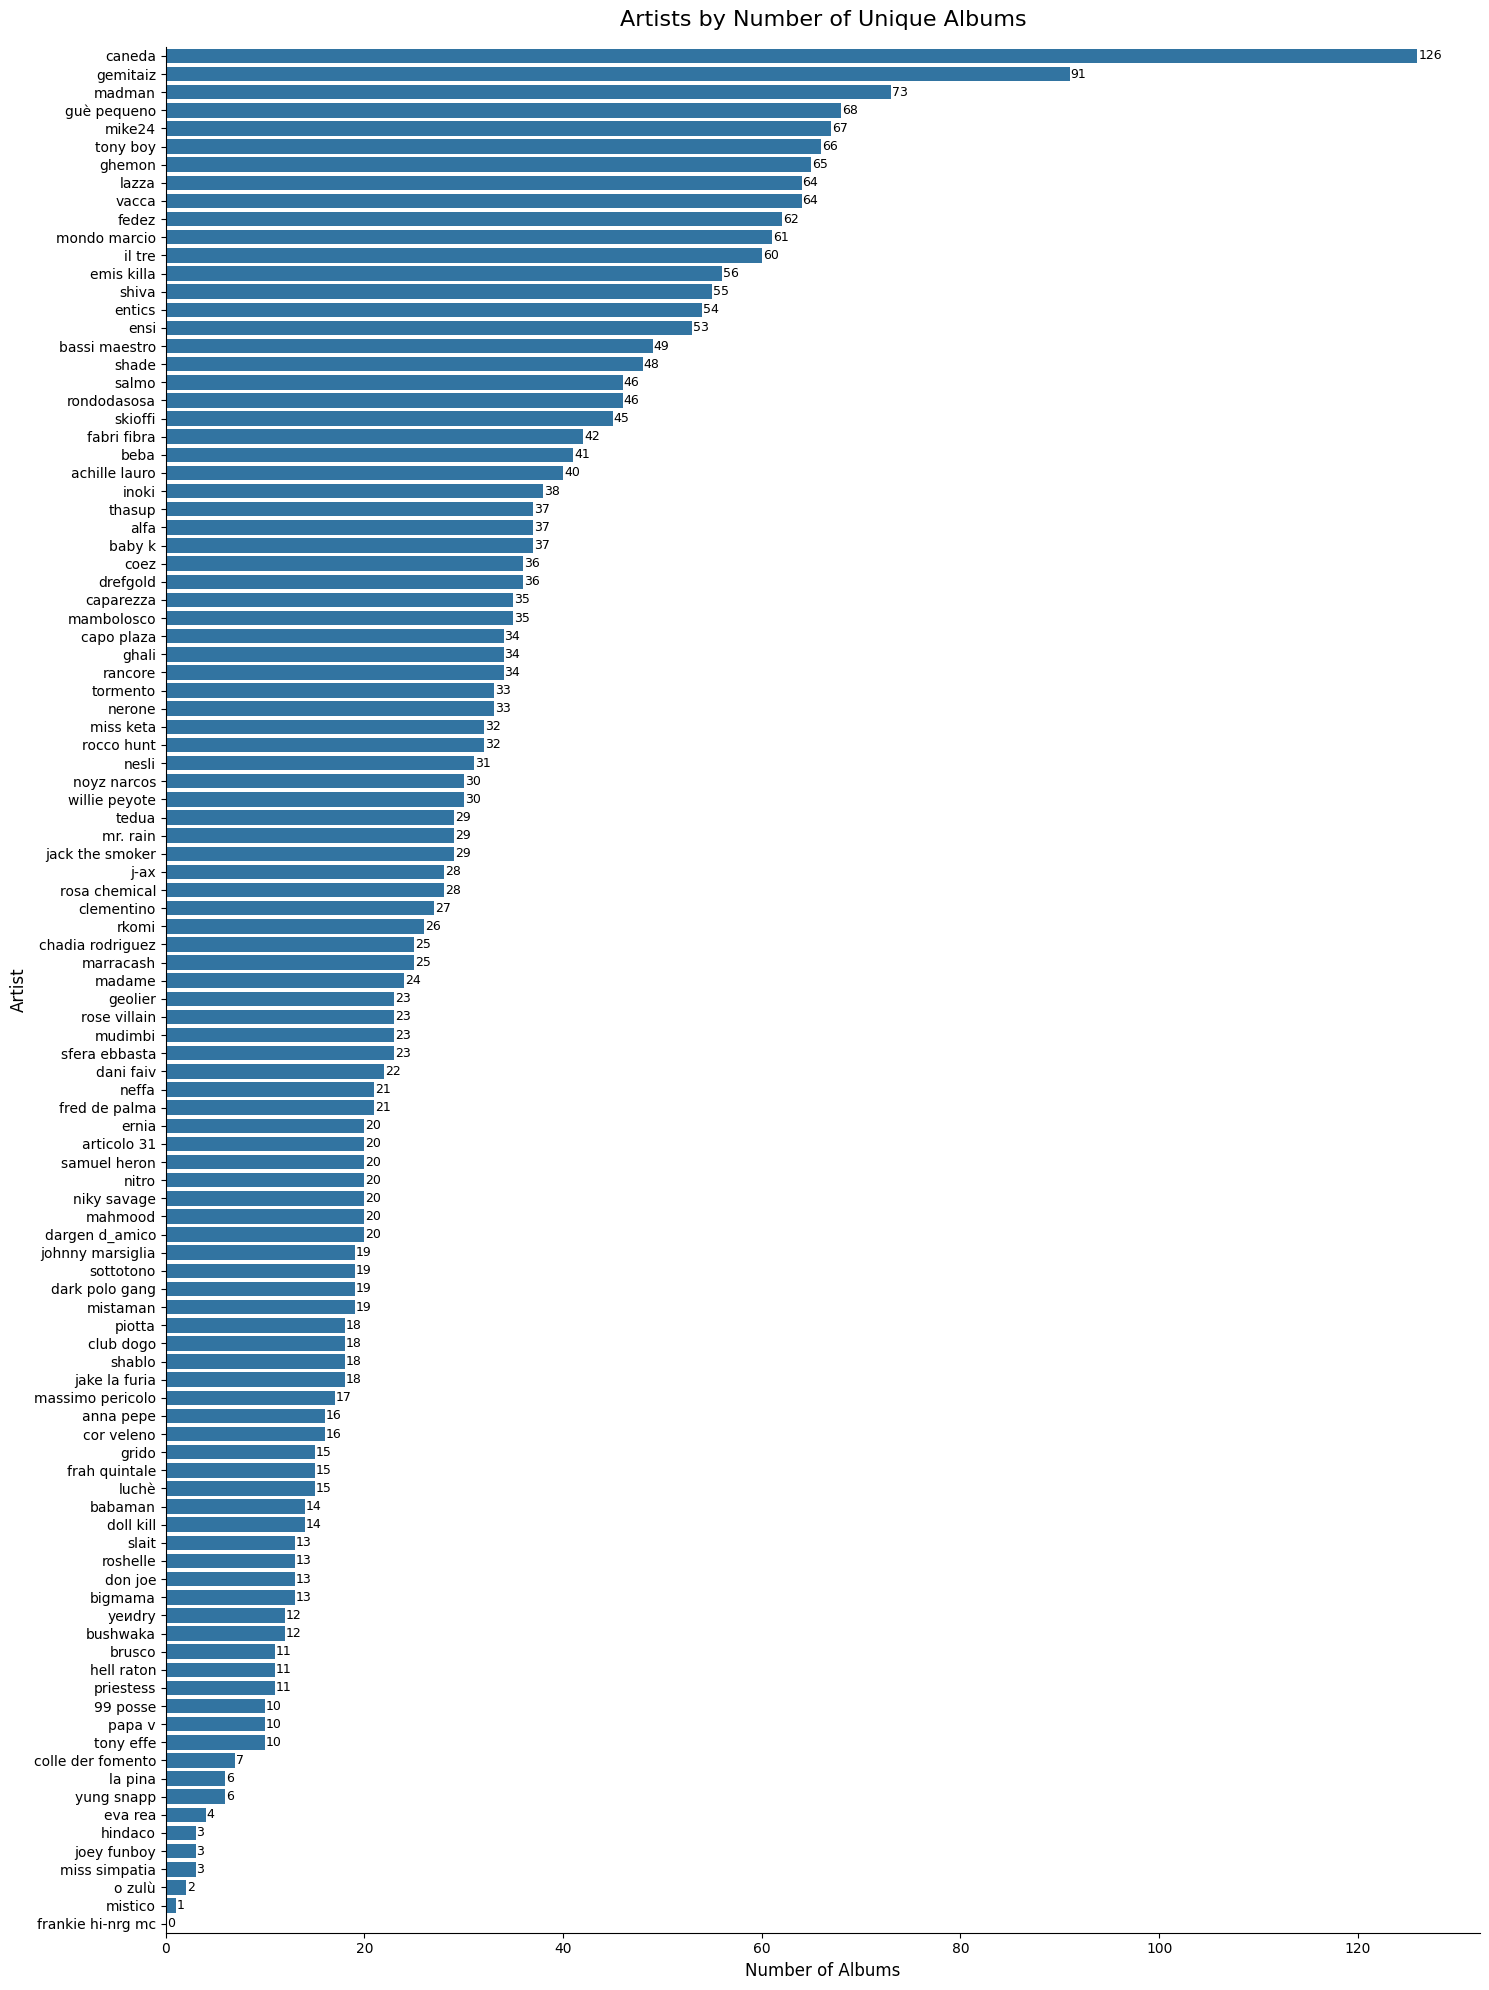

In [3093]:

def plot_albums_per_artist(df, top_n=200, artist_col='name', album_col='album_name'):
    """
    Displays and plots how many unique albums each artist has.
    Does not modify the dataset.
    
    Parameters:
    - df: pandas DataFrame
    - top_n: number of top artists to display in the plot
    - artist_col: column containing artist names
    - album_col: column containing album names
    """
    # --- Count unique albums per artist ---
    artist_album_counts = (
        df.drop_duplicates(subset=[artist_col, album_col])
          .groupby(artist_col)[album_col]
          .count()
          .reset_index(name='album_count')
          .sort_values(by='album_count', ascending=False)
    )

    # --- Display summary ---
    print(f"Total unique artists: {artist_album_counts.shape[0]}")
    print("Artists by number of albums:")
    print(artist_album_counts.head(top_n))

    # --- Plot ---
    plt.figure(figsize=(15, 20))
    top_artists = artist_album_counts.head(top_n)
    sns.barplot(
        data=top_artists,
        y=artist_col,
        x='album_count',
    
    )

    plt.title("Artists by Number of Unique Albums", fontsize=16, pad=15)
    plt.xlabel("Number of Albums", fontsize=12)
    plt.ylabel("Artist", fontsize=12)

    # --- Add labels ---
    for i, val in enumerate(top_artists['album_count']):
        plt.text(val + 0.1, i, str(val), va='center', fontsize=9)

    sns.despine()
    plt.tight_layout()
    plt.show()

    return artist_album_counts

artist_album_counts = plot_albums_per_artist(df, )


##### Album release decade distribution (unique albums only)

Percentage of Unique Albums by Release Decade
  decade    percent
0  1950s   0.041305
1  1960s   0.041305
2  1970s   0.495663
3  1980s   0.413052
4  1990s   2.726146
5  2000s   8.384965
6  2010s  37.752995
7  2020s  50.144568


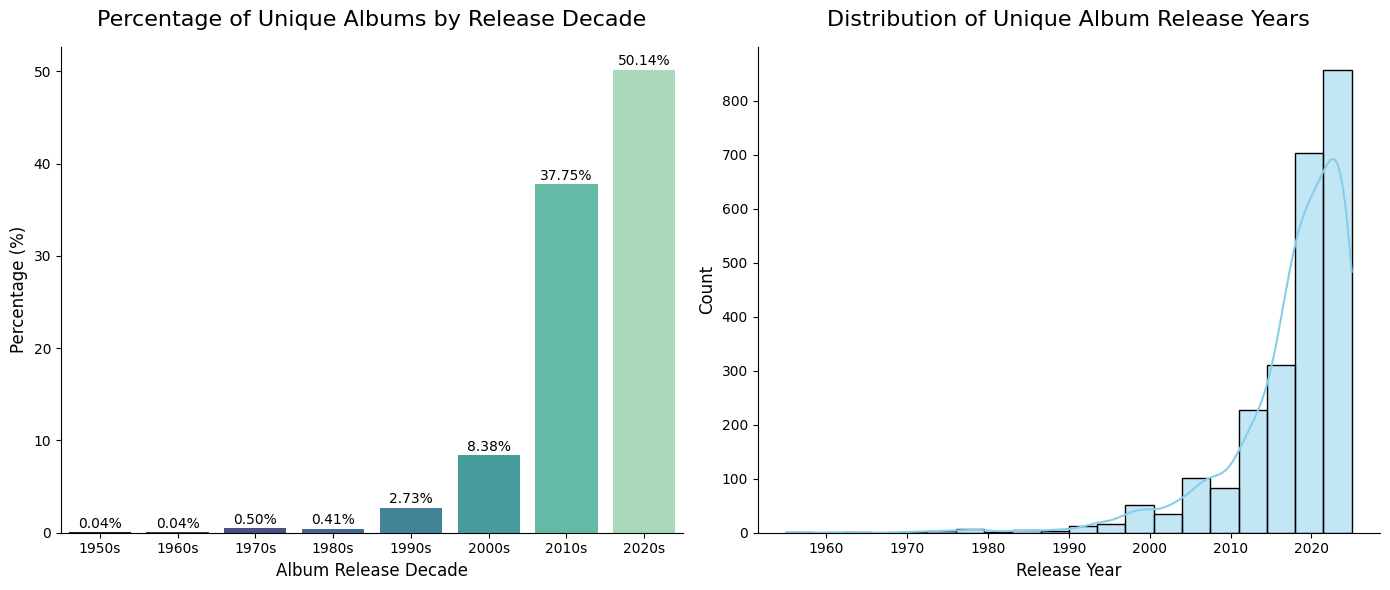

In [3094]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_unique_album_release_distribution(df, album_col='album_name', date_col='album_release_date',
                                           title="Percentage of Unique Albums by Release Decade"):
    """
    Plots the percentage of unique albums by their release decade (bar plot)
    and a histogram of unique album release years.
    Does not modify the original dataset.
    """
    # --- Keep only unique albums ---
    unique_albums = df.drop_duplicates(subset=[album_col]).copy()

    # --- Extract album release years ---
    album_years = pd.to_datetime(unique_albums[date_col], errors='coerce').dt.year.dropna()

    if album_years.empty:
        print(f"No valid album release years found in column '{date_col}'.")
        return

    # --- Define decade bins ---
    start = int(album_years.min() // 10 * 10)
    end = int(album_years.max() // 10 * 10 + 10)
    bins = list(range(start, end + 10, 10))
    labels = [f"{b}s" for b in bins[:-1]]

    # --- Group by decade ---
    decade_groups = pd.cut(album_years, bins=bins, labels=labels, right=False)

    # --- Calculate percentages ---
    group_percent = decade_groups.value_counts(normalize=True).sort_index() * 100
    group_df = pd.DataFrame({'decade': group_percent.index, 'percent': group_percent.values})

    print(title)
    print(group_df)

    # --- Plot bar chart and histogram side by side ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- Bar plot ---
    sns.barplot(data=group_df, x='decade', y='percent', hue='decade',
                palette='mako', legend=False, ax=axes[0])
    for i, val in enumerate(group_df['percent']):
        axes[0].text(i, val + 0.5, f"{val:.2f}%", ha='center', fontsize=10)

    axes[0].set_title(title, fontsize=16, pad=15)
    axes[0].set_xlabel("Album Release Decade", fontsize=12)
    axes[0].set_ylabel("Percentage (%)", fontsize=12)
    sns.despine(ax=axes[0])

    # --- Histogram of release years ---
    sns.histplot(album_years, bins=20, kde=True, color='skyblue', ax=axes[1])
    axes[1].set_title("Distribution of Unique Album Release Years", fontsize=16, pad=15)
    axes[1].set_xlabel("Release Year", fontsize=12)
    axes[1].set_ylabel("Count", fontsize=12)
    sns.despine(ax=axes[1])

    plt.tight_layout()
    plt.show()
plot_unique_album_release_distribution(df)


##### Album release date Describtion

In [3095]:
print(df['album_release_date'].describe())

count                            11088
mean     2016-11-13 07:30:38.961039104
min                1955-01-01 00:00:00
25%                2013-05-07 00:00:00
50%                2018-06-01 00:00:00
75%                2022-04-29 00:00:00
max                2025-06-18 00:00:00
Name: album_release_date, dtype: object


##### Number of Tracks per Album

Total unique albums: 2421

Albums by Number of Tracks:
                                             album_name  track_count
0                                    SANTANA MONEY GANG          132
1                                          Solo Un Uomo           48
2     L'ANGELO DALL'OCCHIALE DA SERA: COL CUORE IN GOLA           45
3                                  Il mio lato peggiore           42
4                                             Gentleman           41
...                                                 ...          ...
2416                                           Hot Fuss            1
2417                                    Vangelo II Luka            1
2418                                           The Real            1
2419                                  Walkin' Bank Roll            1
2420                                                444            1

[2421 rows x 2 columns]


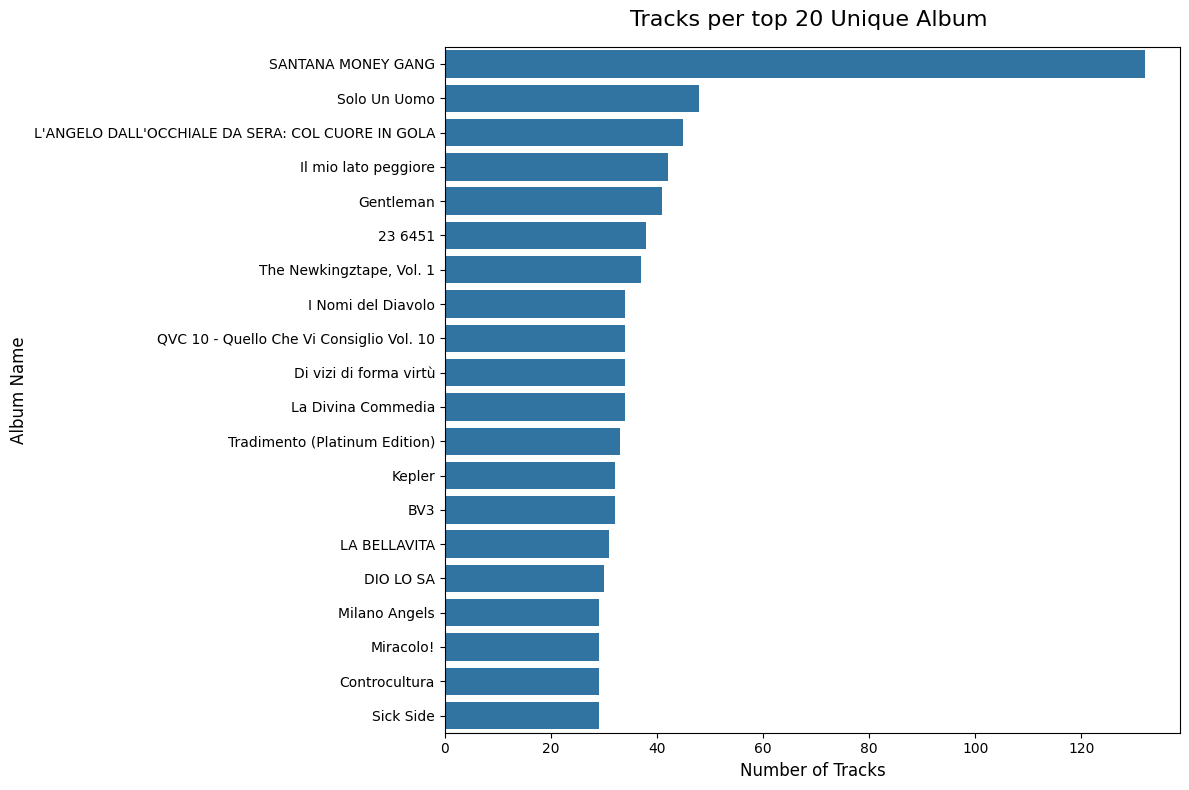

In [3096]:

def plot_tracks_per_album(df, album_col='album_name', title="Tracks per top 20 Unique Album "):
    """
    Counts how many tracks exist for each unique album and plots:
    
    Bar chart of track counts per album
    """
    # --- Drop missing album names ---
    df_valid = df.dropna(subset=[album_col]).copy()

    # --- Count tracks per album ---
    track_counts = df_valid[album_col].value_counts().sort_values(ascending=False)
    track_df = track_counts.reset_index()
    track_df.columns = [album_col, 'track_count']

    # --- Print summary ---
    print(f"Total unique albums: {len(track_df)}")
    print("\nAlbums by Number of Tracks:")
    print(track_df)


    # ---  Bar chart (each album with its track count) ---
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=track_df.head(20),
        x='track_count',
        y=album_col,
    )
    plt.title(title, fontsize=16, pad=15)
    plt.xlabel("Number of Tracks", fontsize=12)
    plt.ylabel("Album Name", fontsize=12)
    plt.tight_layout()
    plt.show()

    return track_df

album_track_counts = plot_tracks_per_album(df)


##### Distribution of Unique Albums by Type

Unique Album Types Summary:

             count  percent
album_type                 
album         1239    51.18
single        1101    45.48
compilation     81     3.35


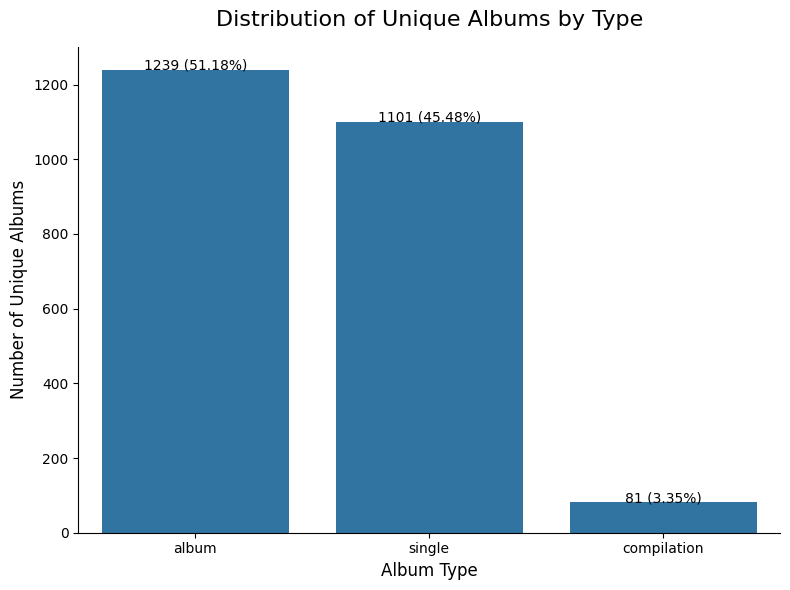

,count,percent
album_type,,
album,1239,51.18
single,1101,45.48
compilation,81,3.35


In [3097]:


def plot_unique_album_types(df, album_col='album_name', type_col='album_type',
                            title="Distribution of Unique Albums by Type"):
    """
    Shows the count and percentage of each album type,
    considering only unique albums (by album name).
    """
    # --- Keep only unique albums ---
    unique_albums = df.drop_duplicates(subset=[album_col]).copy()

    # --- Drop missing album types ---
    unique_albums = unique_albums.dropna(subset=[type_col])

    # --- Count occurrences ---
    type_counts = unique_albums[type_col].value_counts().sort_values(ascending=False)
    type_percent = (type_counts / type_counts.sum() * 100).round(2)

    # --- Combine results into a DataFrame ---
    summary_df = pd.DataFrame({
        'count': type_counts,
        'percent': type_percent
    })

    print("Unique Album Types Summary:\n")
    print(summary_df)

    # --- Plot ---
    plt.figure(figsize=(8, 6))
    sns.barplot(x=summary_df.index, y=summary_df['count'], )

    # Add count and percentage labels
    for i, (count, percent) in enumerate(zip(summary_df['count'], summary_df['percent'])):
        plt.text(i, count + 0.5, f"{count} ({percent}%)", ha='center', fontsize=10)

    plt.title(title, fontsize=16, pad=15)
    plt.xlabel("Album Type", fontsize=12)
    plt.ylabel("Number of Unique Albums", fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()

    return summary_df
plot_unique_album_types(df)


##### Albums with Names but without a release date

In [3098]:
def find_albums_missing_release_date(df, album_col='album_name', artist_col='name', date_col='album_release_date'):
    """
    Finds and lists  albums that have a name but no release date.
    """
    missing = df[df[album_col].notna() & df[date_col].isna()][[album_col, artist_col]]
    print(f"Number of  albums with a name but without release date: {len(missing)}")
    display(missing)
    return missing

missing_albums = find_albums_missing_release_date(df)


Number of  albums with a name but without release date: 0


,album_name,name


##### Tracks without albums

In [3099]:
def find_tracks_without_album(df, track_col='full_title', album_col='album_name', artist_col='name'):
    """
    Lists tracks that do not have an album assigned.
    """
    missing_tracks = df[df[album_col].isna()][[track_col, artist_col,album_col,'album_release_date','album_type']].drop_duplicates()
    print(f"Number of tracks without an album: {len(missing_tracks)}")
    display(missing_tracks['full_title'])
    return missing_tracks

# Usage
tracks_without_album = find_tracks_without_album(df)
dtale.show(tracks_without_album)

Number of tracks without an album: 78


1932            Ciao ciao 2 by Club Dogo (Ft. Emis Killa)
2304         Santa Margherita 104 Freestyle by Rocco Hunt
3286      PTS (PoiTiSpiego/PostTraumaticStress) by Ghemon
3667    Quelli che benpensano by Frankie hi-nrg mc (Ft...
3668                        Autodafè by Frankie hi-nrg mc
                              ...                        
3737    Mattatoy by Frankie hi-nrg mc (Ft. Gianluca Ni...
3738                   School Rocks! by Frankie hi-nrg mc
3739    Nuvole e vento (Africa) by Frankie hi-nrg mc, ...
6390            Ganja music by Entics (Ft. Casino Royale)
9261                     (Sei Tu) Che Mi Dai by Sottotono
Name: full_title, Length: 78, dtype: object

#####  Albums that appear with multiple different artist names

In [3100]:
def find_albums_with_multiple_artists(
    df, 
    album_col='album_name', 
    artist_col='name', 
    feature_col='name_artist'
):
    """
    Finds albums that appear with multiple different artist names.
    Also lists the different values of another feature (e.g., 'name_artist') for each album.
    """
    # Exclude rows with missing album names
    df_filtered = df[df[album_col].notna()]

    # Group by album and collect unique artist names and feature values
    grouped = (
        df_filtered
        .groupby(album_col)
        .agg({
            artist_col: lambda x: list(pd.unique(x)),
            feature_col: lambda x: list(pd.unique(x)),
            'featured_artists' : lambda x: list(pd.unique(x)),
            'album_type':lambda x: list(pd.unique(x)),
            'primary_artist':lambda x: list(pd.unique(x)),
        })
        .reset_index()
    )

    # Keep only albums linked to more than one unique artist
    inconsistent_albums = grouped[grouped[artist_col].apply(len) > 1]

    # Rename columns for clarity
    inconsistent_albums = inconsistent_albums.rename(columns={
        artist_col: 'Artist Name from Artists Dataset',
        feature_col: f'Artist Name from Tracks Dataset',
        'featured_artists': 'featured_artists',
         'primary_artist':'primary_artist'
    })

    print(f"Number of albums with multiple artist names: {len(inconsistent_albums)}")
    display(inconsistent_albums.head(20))

    return inconsistent_albums

# Usage
albums_with_multiple_artists = find_albums_with_multiple_artists(df)


Number of albums with multiple artist names: 337


,album_name,Artist Name from Artists Dataset,Artist Name from Tracks Dataset,featured_artists,album_type,primary_artist
7,'A verità,"[rocco hunt, ensi]","[Rocco Hunt, Ensi]","[nan, MadMan, Nitro, Gemitaiz, Clementino, Enz...",[album],"[Rocco Hunt, Ensi]"
8,'A verità 2.0,"[rocco hunt, geolier]","[Rocco Hunt, Geolier]","[nan, Guè, Johnny Marsiglia, Kiave]",[album],"[Rocco Hunt, Geolier]"
12,...In teoria,"[fabri fibra, sottotono]","[Fabri Fibra, Sottotono]","[DJ Double S, Rival Capone, Esa, Nesli, Fabri ...",[album],"[Fabri Fibra, Sottotono]"
20,10,"[ghemon, madman]","[Ghemon, MadMan]","[nan, Sebastian / Killa Cali]",[album],"[Ghemon, MadMan]"
30,17,"[jake la furia, madame, emis killa, slait]","[Jake La Furia, Madame, Emis Killa, Slait]","[nan, Massimo Pericolo, Lazza, Fabri Fibra, Sa...","[album, single]","[Jake La Furia, Madame, Emis Killa, Slait]"
34,1969 - Achille Idol Rebirth,"[bushwaka, achille lauro]","[Bushwaka, Achille Lauro]","[Fedez, nan, Gow Tribe, Simon P, Coez, TDC21]",[album],"[Bushwaka, Achille Lauro]"
38,1998,"[coez, mike24]","[Coez, Highsnob]","[nan, Franco126, Tommaso Paradiso]",[album],"[Coez, Highsnob]"
45,2/7 - EP,"[clementino, shade, emis killa]","[Clementino, Shade, Emis Killa]",[nan],[single],"[Clementino, Shade, Emis Killa]"
51,20139,"[vacca, ernia]","[Vacca, Ernia]","[nan, Biska, JP (ITA), Nico Kyni, Josiah and t...",[album],"[Vacca, Ernia]"
53,2020 Freestyle,"[tedua, miss keta]","[Tedua, M¥SS KETA]",[nan],[single],"[Tedua, M¥SS KETA]"


##### Albums that have multiple different release dates 
The analysis identified several albums with multiple recorded release dates. There are 43 albums with different release date. We are going to pick the oldest release date in Error Correction part.

In [3101]:
def find_albums_with_multiple_release_dates(
    df, 
    album_col='album_name', 
    date_col='album_release_date',
    album_type_col='album_type'
):
    """
    Finds albums with multiple different release dates and lists the dates,
    also showing the corresponding album type.
    """
    # Exclude null album names
    df_filtered = df[df[album_col].notna()]

    # Group by album and aggregate unique release dates and album types
    grouped = (
        df_filtered
        .groupby(album_col)
        .agg({
            date_col: lambda x: list(pd.unique(x)),
            album_type_col: lambda x: list(pd.unique(x)),
            'name':lambda x: list(pd.unique(x)),
            'language':lambda x: list(pd.unique(x))
        })
        .reset_index()
    )

    # Keep only albums with more than one unique release date
    inconsistent_albums = grouped[grouped[date_col].apply(len) > 1].copy()

    # Rename for clarity
    inconsistent_albums = inconsistent_albums.rename(columns={
        date_col: 'release_dates',
        album_type_col: 'album_types',
        'name':'name',
        'language':'language'
    })

    print(f"Number of albums with multiple release dates: {len(inconsistent_albums)}")
    display(inconsistent_albums)

    return inconsistent_albums

# Usage
albums_with_inconsistent_dates = find_albums_with_multiple_release_dates(df)



Number of albums with multiple release dates: 43


,album_name,release_dates,album_types,name,language
30,17,"[2020-09-18T00:00:00.000000000, 2019-06-17T00:...","[album, single]","[jake la furia, madame, emis killa, slait]","[it, en, pl]"
35,1990,"[2020-07-24T00:00:00.000000000, 2019-10-24T00:...","[album, single]",[achille lauro],[it]
38,1998,"[2025-06-13T00:00:00.000000000, 2023-11-24T00:...",[album],"[coez, mike24]",[it]
57,23 6451,"[2019-11-15T00:00:00.000000000, 2020-07-31T00:...",[album],"[thasup, salmo]","[nan, en, pl, it, eu, sco]"
106,ALI,"[2021-02-19T00:00:00.000000000, 2021-04-29T00:...",[album],[il tre],[it]
251,Banditi,"[2016-09-30T00:00:00.000000000, 2018-03-14T00:...","[album, single]","[clementino, caneda]",[it]
256,Barrio,"[2019-08-30T00:00:00.000000000, 2019-12-06T00:...",[single],"[mahmood, yeиdry]","[it, en]"
264,Before I Forget,"[2012-10-26T00:00:00.000000000, 2023-04-28T00:...",[album],"[gemitaiz, fedez]",[it]
343,CHIARA,"[2023-06-07T00:00:00.000000000, 2024-09-23T00:...",[single],"[rondodasosa, tony effe]",[it]
417,Ciao America,"[2024-02-01T00:00:00.000000000, 2024-02-02T00:...",[album],[dargen d_amico],[it]


#### Disk Number and Track Number

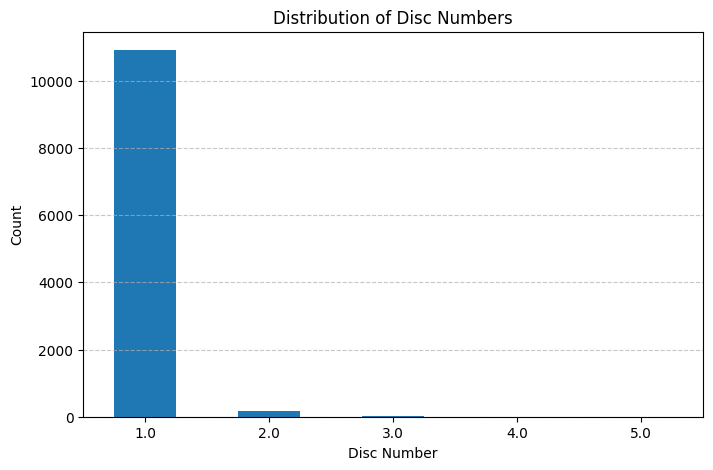

In [3102]:


disc_counts = df['disc_number'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
disc_counts.plot(kind='bar')

plt.title('Distribution of Disc Numbers')
plt.xlabel('Disc Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Check for missing disc_number or track_number
All entries with null values in either the disc_number or track_number columns were found to belong to albums where these fields are consistently missing across all tracks




In [3103]:
missing_disc_track = df.loc[
    df['disc_number'].isna() | df['track_number'].isna(),
    ['album_name', 'album_type', 'full_title']
]

print(f"Missing disc_number or track_number: {len(missing_disc_track)} rows")
dtale.show(missing_disc_track)


Missing disc_number or track_number: 78 rows


##### Checking for Non numeric values 

In [3104]:
# Check for non-numeric or invalid values in disc_number and track_number (ignoring nulls)
invalid_disc = df[
    df['disc_number'].notna() & ~df['disc_number'].apply(lambda x: float(x).is_integer())
]

invalid_track = df[
    df['track_number'].notna() & ~df['track_number'].apply(lambda x: float(x).is_integer())
]

print(f"Invalid disc_number entries (excluding nulls): {len(invalid_disc)}")
print(invalid_disc[['album_name', 'album_type', 'full_title', 'disc_number', 'track_number']])

print(f"Invalid track_number entries (excluding nulls): {len(invalid_track)}")
print(invalid_track[['album_name', 'album_type', 'full_title', 'disc_number', 'track_number']])



Invalid disc_number entries (excluding nulls): 0
Empty DataFrame
Columns: [album_name, album_type, full_title, disc_number, track_number]
Index: []
Invalid track_number entries (excluding nulls): 0
Empty DataFrame
Columns: [album_name, album_type, full_title, disc_number, track_number]
Index: []


##### Tracks Numbered Outside Expected Ranges

In [3105]:
# Check for track numbers outside expected range (e.g., <=0 or unusually high)
invalid_track_range = df[(df['track_number'] <= 0) | (df['track_number'] > 99)]
print(f"Tracks with invalid numbering: {len(invalid_track_range)}")
print(invalid_track_range)
print('---------------------------------------------------')
print(df['track_number'].value_counts())


Tracks with invalid numbering: 0
Empty DataFrame
Columns: [id, id_artist, name_artist, full_title, title, featured_artists, primary_artist, language, album, stats_pageviews, swear_IT, swear_EN, swear_IT_words, swear_EN_words, year, month, day, n_sentences, n_tokens, tokens_per_sent, char_per_tok, lexical_density, avg_token_per_clause, bpm, centroid, rolloff, flux, rms, zcr, flatness, spectral_complexity, pitch, loudness, album_name, album_release_date, album_type, disc_number, track_number, duration_ms, explicit, popularity, album_image, id_album, lyrics, modified_popularity, id_author, name, gender, birth_date, birth_place, nationality, description, active_start, province, region, country, latitude, longitude]
Index: []

[0 rows x 58 columns]
---------------------------------------------------
track_number
1.0     2010
2.0      931
4.0      791
3.0      782
6.0      740
5.0      721
7.0      632
9.0      621
8.0      611
10.0     598
11.0     500
12.0     473
13.0     407
14.0     325

##### Track Sequence Validation
A total of 2,600 discs were found to have track sequence issues, indicating widespread inconsistencies in the ordering or numbering of songs within albums. These issues include missing or duplicate track numbers, sequences that don’t start at 1, or tracks that are out of order.
 
The following issues indicate potential problems in the dataset, as they suggest that some albums may have incomplete or inconsistent track listings:

Track numbers skip values, implying that some tracks might be missing.

The track sequence does not start at 1, suggesting incomplete metadata or incorrect ordering.

For this analysis, we will focus only on the duplicate track numbers, since these represent clear inconsistencies that can be directly identified and corrected.

In [ ]:
def find_track_sequence_issues(df, album_col='album_name', disc_col='disc_number', track_col='track_number'):
    """
       Finds albums/discs with track numbering issues:
    - Missing numbers (gaps)
    - Duplicate track numbers
    - Track numbers not starting at 1
    - Non-integer or invalid values
    """
    
    issues = []
    numberOfDuplicates =0
    # Group by album and disc
    for (album, disc), group in df.groupby([album_col, disc_col]):
        tracks = group[track_col].dropna().tolist()
        if not tracks:
            continue
        

        
           # Ensure numeric comparison
        try:
            tracks = sorted([int(x) for x in tracks])
        except ValueError:
            issues.append({
                'album_name': album,
                'disc_number': disc,
                'issue': 'Non-numeric track numbers',
                'track_numbers': group[track_col].unique().tolist()
            })
            continue
        
        # Detect duplicates
        if len(tracks) != len(set(tracks)):
            issues.append({
                'album_name': album,
                'disc_number': disc,
                'issue': 'Duplicate track numbers',
                'track_numbers': tracks
            })
            numberOfDuplicates =numberOfDuplicates+1

        # Detect missing numbers
        expected = list(range(1, max(tracks) + 1))
        missing = sorted(set(expected) - set(tracks))
        if missing:
            issues.append({
                'album_name': album,
                'disc_number': disc,
                'issue': f'Missing track numbers: {missing}',
                'track_numbers': tracks
            })

        # Detect wrong start
        if tracks[0] != 1:
            issues.append({
                'album_name': album,
                'disc_number': disc,
                'issue': f'Track sequence does not start at 1 (starts at {tracks[0]})',
                'track_numbers': tracks
            })


    issues_df = pd.DataFrame(issues)
    print(f"Number of discs with sequence issues: {len(issues_df)}")
    print('Number of Disks that have Duplicates number of tracks ',numberOfDuplicates)
    return issues_df
track_issues = find_track_sequence_issues(df)
dtale.show(track_issues)


In [ ]:
# identifying tracks number duplicates
duplicates = df[df.duplicated(subset=['album_name', 'disc_number', 'track_number'], keep=False)]
print(f"🎵 Found {len(duplicates)} duplicate track entries.")
dtale.show(duplicates[['album_name', 'disc_number', 'track_number', 'full_title', 'name']])


🎵 Found 3297 duplicate track entries.


#### Track Year 
Looking at the distribution of values in the track year in the previous section, we notice some entries before 1950 and after 2025, which don’t make much sense. Therefore, we will investigate these cases further to understand the cause and decide how to correct them.


Result:
From the plots, we can see that more than half of the songs and albums were released between 2000 and 2020, indicating that most of the data comes from the recent two decades

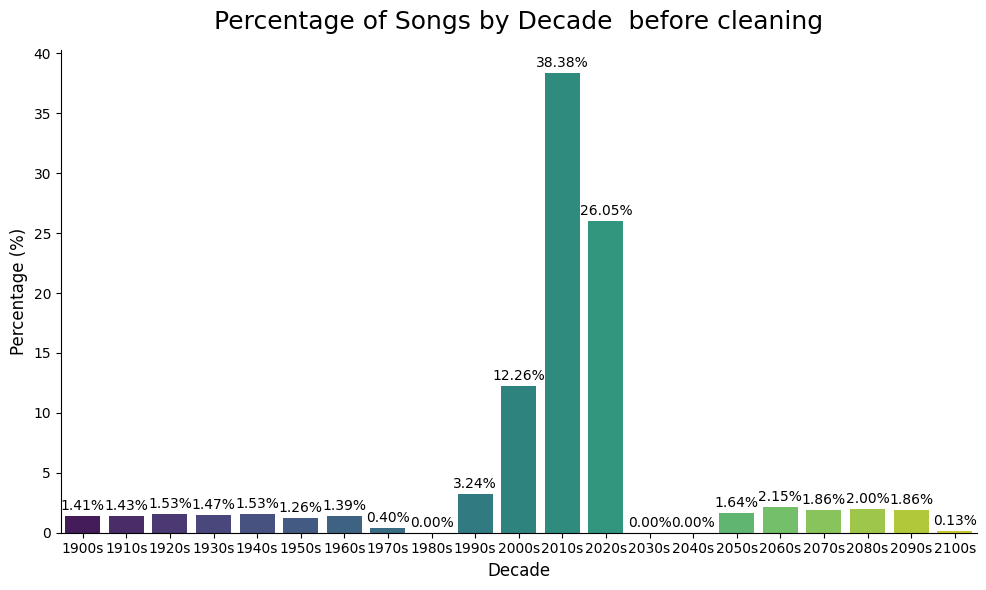

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_year_distribution_by_decade(df, title, year_col='year'):
    """
    Plot the percentage distribution of entries by decade based on a given year column.
    Does not modify the dataset.
    """

    # --- Convert 'year' to numeric safely ---
    years = pd.to_numeric(df[year_col], errors='coerce').dropna()

    # --- Define decade bins (e.g., 1960s, 1970s, ..., 2020s) ---
    start = int((years.min() // 10) * 10)
    end = int((years.max() // 10) * 10 + 10)
    bins = list(range(start, end + 10, 10))
    labels = [f"{b}s" for b in bins[:-1]]

    # --- Categorize years into decades ---
    decade_groups = pd.cut(years, bins=bins, labels=labels, right=False)

    # --- Calculate percentage per decade ---
    group_percent = decade_groups.value_counts(normalize=True).sort_index() * 100
    group_df = pd.DataFrame({'decade': group_percent.index, 'percent': group_percent.values})

    # --- Plot ---
    plt.figure(figsize=(10, 6))
    sns.barplot(data=group_df, x='decade', y='percent', hue='decade', palette='viridis', legend=False)

    # --- Add percentage labels ---
    for i, val in enumerate(group_df['percent']):
        plt.text(i, val + 0.5, f"{val:.2f}%", ha='center', fontsize=10)

    plt.title(title, fontsize=18, pad=15)
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_year_distribution_by_decade(df, "Percentage of Songs by Decade  before cleaning")



Descriptive Statistics
The summary statistics show that the song release years range from 1900 to 2100, with an average around 2013, indicating some unrealistic future values.


In [ ]:
# For the 'year' column
print(df['year'].describe())  



count    10728.000000
mean      2012.651286
std         33.288337
min       1900.000000
25%       2009.000000
50%       2016.000000
75%       2021.000000
max       2100.000000
Name: year, dtype: float64


##### Number of Songs before 1950 and after 2025 

In [ ]:
def check_songs_before_1950(tracks):
    """
    Identify and display tracks released before 1950.
    """
    tracks['year'] = pd.to_numeric(tracks['year'], errors='coerce')
    songs_before_1950 = tracks[tracks['year'] < 1950].shape[0]

    print(f"Number of songs before 1950: {songs_before_1950}")

    return tracks[tracks['year'] < 1950][['full_title', 'album_name', 'album_release_date', 'album_type', 'year', 'month', 'day']]
     
   
old_songs =check_songs_before_1950(tracks)
dtale.show(old_songs)

Number of songs before 1950: 790


In [ ]:
def check_songs_after_2025(tracks):
    """
    Identify and display tracks released after 2025.
    """
    tracks['year'] = pd.to_numeric(tracks['year'], errors='coerce')
    songs_after_2025 = tracks[tracks['year'] > 2025].shape[0]

    print('-----------------------------------------------')
    print(f"Number of songs after 2025: {songs_after_2025}")

    return tracks[tracks['year'] > 2025][['full_title', 'album_name', 'album_release_date', 'album_type', 'year', 'month', 'day']]
 
future_songs =check_songs_after_2025(tracks)
dtale.show(future_songs)

-----------------------------------------------
Number of songs after 2025: 1036


#### Inconsistency with years

##### Checking if the active_start date is earlier than the artist’s birth_date

In [ ]:
def find_invalid_active_start(df):
    """
    Find artists whose active_start date is earlier than their birth date.
    """
    df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
    df['active_start'] = pd.to_datetime(df['active_start'], errors='coerce')

    invalid_dates = df[df['active_start'] < df['birth_date']]

    print(f"Found {len(invalid_dates)} artists with 'active_start' earlier than 'birth_date'.")
    display(invalid_dates[['id_artist', 'name_artist', 'birth_date', 'active_start']])
find_invalid_active_start(df)

Found 0 artists with 'active_start' earlier than 'birth_date'.


,id_artist,name_artist,birth_date,active_start


##### Checking for tracks released (year) before the artist’s career started (active start)

In [ ]:
def find_tracks_before_career_start(df):
    """
    Find tracks released before the artist's career start.
    """
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['active_start'] = pd.to_datetime(df['active_start'], errors='coerce')

    inconsistency = df[
        (df['year'].notna()) &
        (df['active_start'].notna()) &
        (df['year'] < df['active_start'].dt.year)
    ]

    print(f"⚠️ Number of records where a song was released before the artist's career start: {len(inconsistency)}")

    return inconsistency[['name', 'full_title', 'year', 'active_start', 'album_release_date']].sort_values(by='name')
    
tracks_beforer_career=find_tracks_before_career_start(df)
dtale.show(tracks_beforer_career)

⚠️ Number of records where a song was released before the artist's career start: 682


##### Checking for tracks released before the artist’s birth

In [ ]:
def find_tracks_before_birth(df):
    """
    Find tracks released before the artist's birth date.
    """
    tracks_before_birth = df[df['year'] < df['birth_date'].dt.year]

    print(f"Number of tracks released before artist's birth: {len(tracks_before_birth)}")
    return (tracks_before_birth[['full_title', 'year', 'birth_date', 'album_release_date', 'name_artist']])
tracks_before_birth =find_tracks_before_birth(df)
dtale.show(tracks_before_birth)

Number of tracks released before artist's birth: 869


##### Checking for album released before career start

In [ ]:
def find_albums_before_career(df):
    """
    Find albums released before the artist's career start date.
    """
    album_before_career = df[df['album_release_date'] < df['active_start']]

    print(f"Albums released before artist's career start: {len(album_before_career)}")
    return (album_before_career[['full_title', 'album_release_date', 'active_start', 'name_artist']])
albums_before_career =find_albums_before_career(df)
dtale.show(albums_before_career)

Albums released before artist's career start: 74


##### Checking for Albums released before artist's birth

In [ ]:
def find_albums_before_birth(df):
    """
    Find albums released before the artist's birth date.
    """
    album_before_birth = df[df['album_release_date'] < df['birth_date']]

    print(f"Albums released before artist's birth: {len(album_before_birth)}")
    return(album_before_birth[['full_title', 'album_release_date', 'birth_date', 'name_artist']])
albums_before_birth=find_albums_before_birth(df)
dtale.show(albums_before_birth)

Albums released before artist's birth: 23


##### Checking for Tracks released before album release excluding singles

In [ ]:
def find_tracks_before_album(df):
    """
    Find tracks released before their album release (excluding singles).
    """
    tracks_before_album = df[
        (df['year'] < df['album_release_date'].dt.year) &
        (df['album_type'] != 'single')
    ]

    print(f"Tracks released before the album (excluding singles): {len(tracks_before_album)}")
    return (tracks_before_album[['full_title', 'year', 'album_release_date', 'album_type', 'name_artist']])
tracks_before_album =find_tracks_before_album(df)
dtale.show(tracks_before_album)

Tracks released before the album (excluding singles): 2841


#### Popularity

2025-11-10 16:32:09,278 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-10 16:32:09,284 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


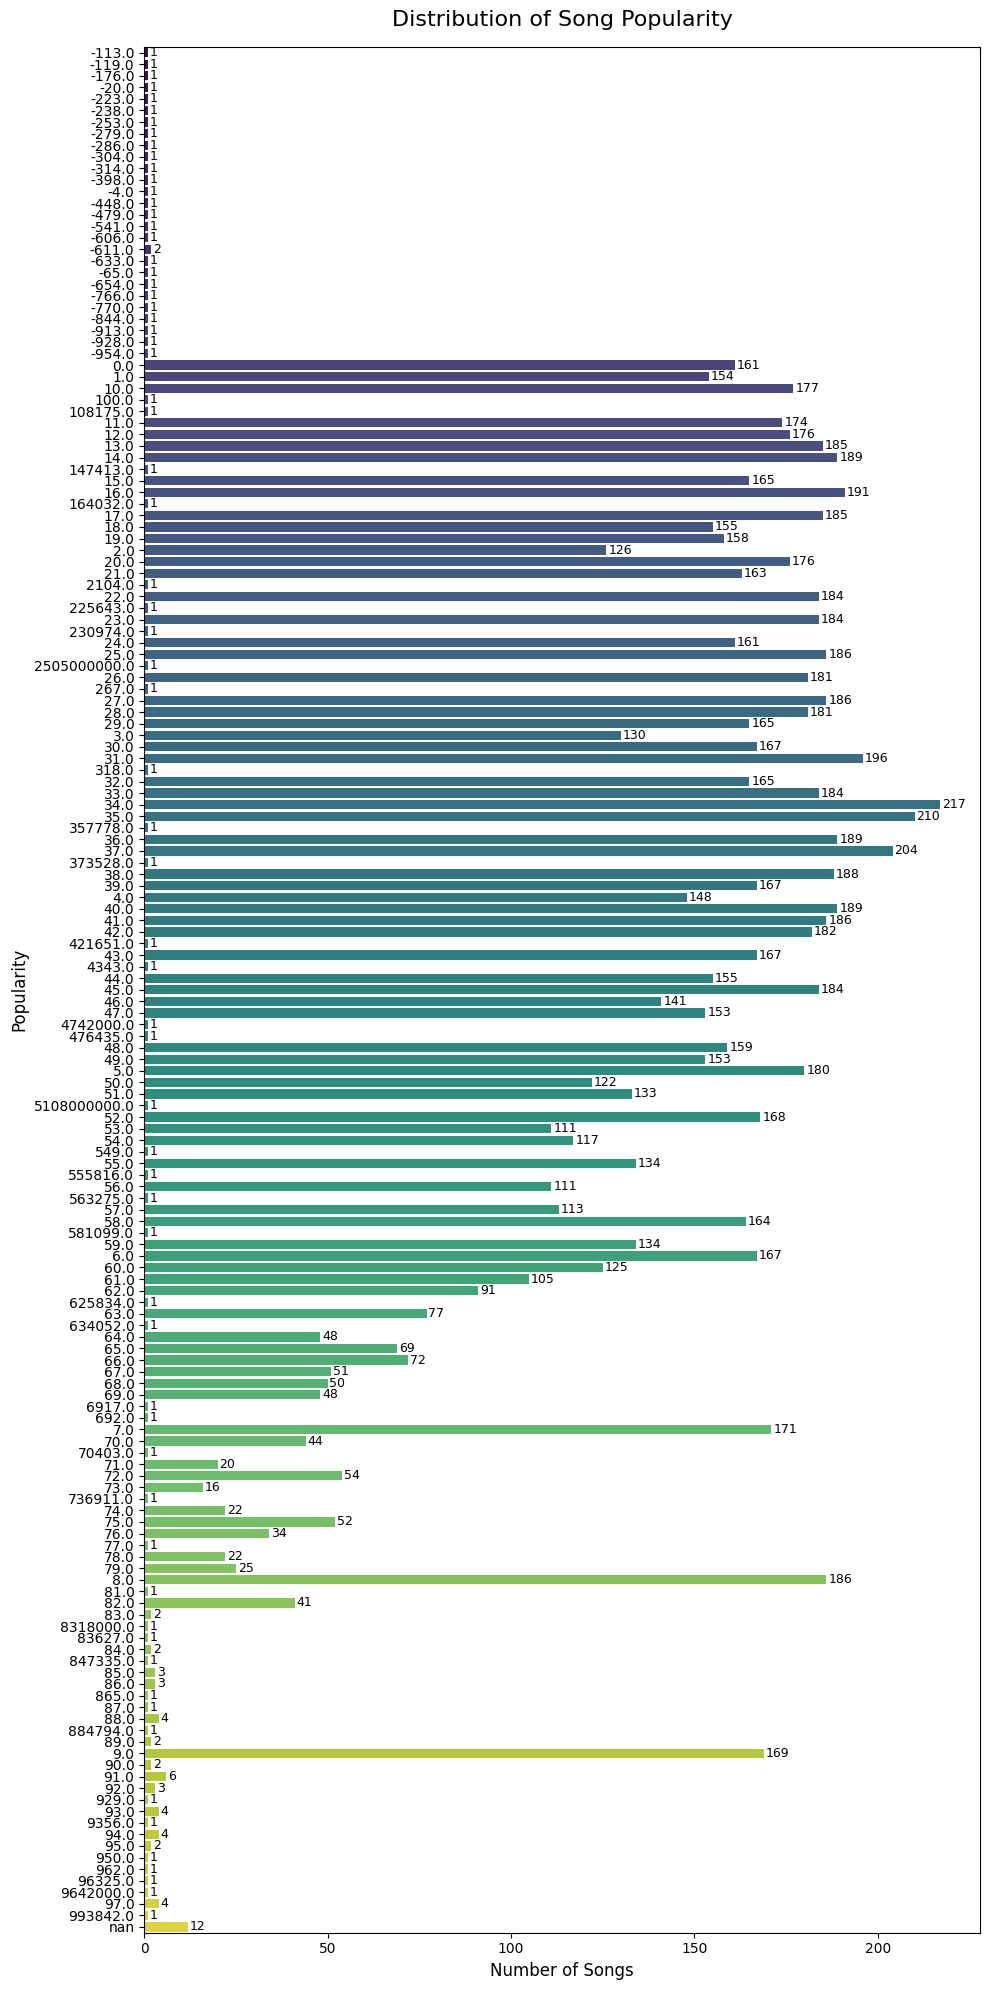

In [ ]:
# --- Count popularity values ---
pop_counts = (df['popularity'].astype(str)).value_counts().sort_index()  # sort index for ascending y-axis

# --- Horizontal bar plot ---
plt.figure(figsize=(10, 20))
sns.barplot(x=pop_counts.values, y=pop_counts.index,hue=pop_counts.index, palette='viridis')
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Distribution of Song Popularity", fontsize=16, pad=15)

# --- Add count labels ---
for i, val in enumerate(pop_counts.values):
    plt.text(val + 0.5, i, f"{val}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


####  Artists Location Statistics


##### Checking if all the coordinates of the artists are inside italy's coordinates

In [ ]:
geo_outliers = df[(df['latitude'] < 35.5) | (df['latitude'] > 47.1) |
                  (df['longitude'] < 6.6) | (df['longitude'] > 18.5)]
print(f"Number of Geographic coordinates outside Italy range: {len(geo_outliers)} records")
display(geo_outliers[['name_artist', 'latitude', 'longitude', 'birth_place']].head(10))

Number of Geographic coordinates outside Italy range: 0 records


,name_artist,latitude,longitude,birth_place


##### Artists' Country Values

All the countries have the value of Italia

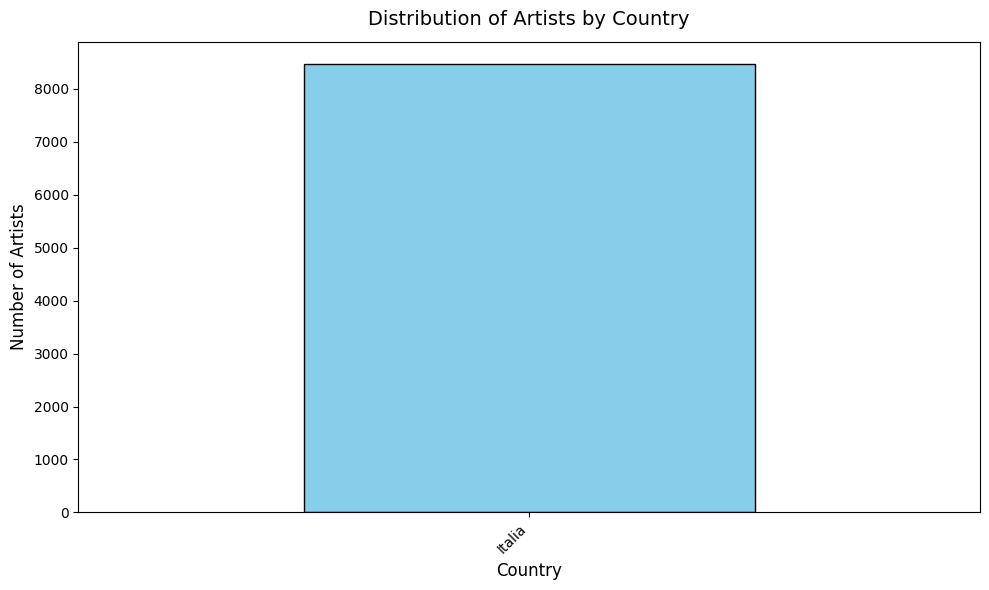

In [ ]:
# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Artists by Country', fontsize=14, pad=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Artists', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Checking if there is an artist his/her country not Italy but his/her coordinates are in Italy

In [ ]:
# Filter rows where country is not Italy and coordinates are present
non_italy_with_coords = df[
    (df['country'].notna()) & 
    (df['country'] != "Italia") & 
    (df['latitude'].notna()) & 
    (df['longitude'].notna())
]

# Count the number of such records
num_records = len(non_italy_with_coords)
print(f"Number of non-Italy records with coordinates: {num_records}")

# Show the records
print(non_italy_with_coords[['country', 'latitude', 'longitude']])


Number of non-Italy records with coordinates: 0
Empty DataFrame
Columns: [country, latitude, longitude]
Index: []


##### Artists Nationality Distribution

Almost all artists are Italian (99.5%), with a small minority from Argentina (0.5%).

nationality
Italia       8517
Argentina      40
Name: count, dtype: int64


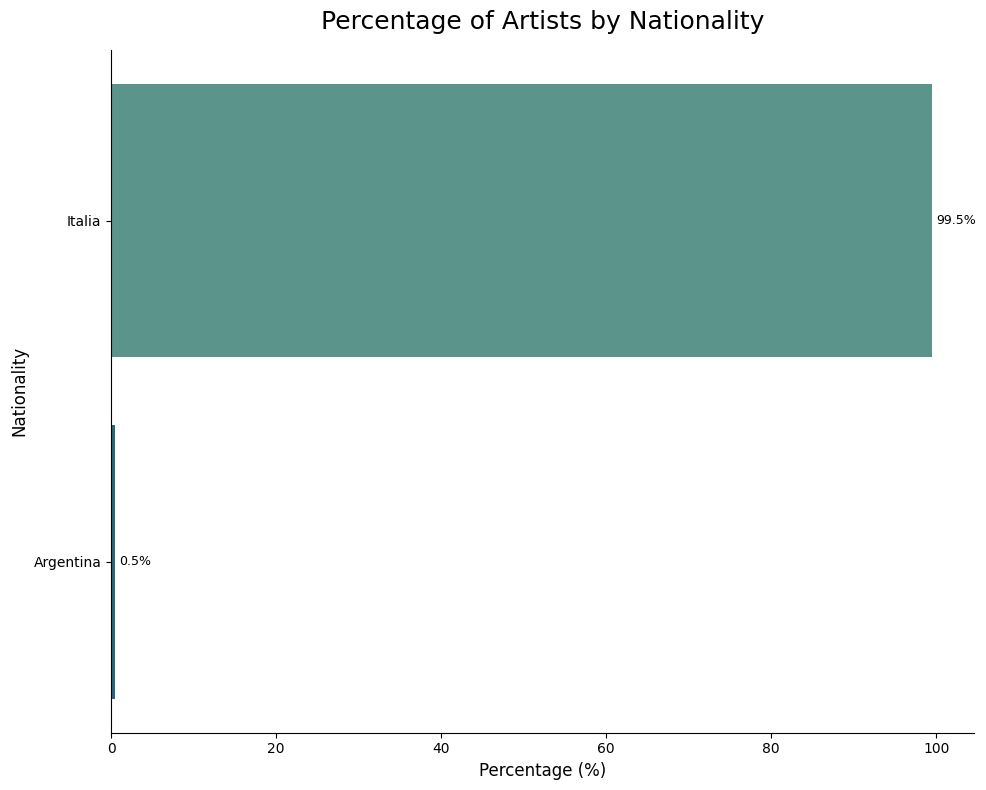

In [ ]:

print(df['nationality'].value_counts())
# Count and calculate percentages
nat_counts = df['nationality'].value_counts()
nat_percent = (nat_counts / nat_counts.sum()) * 100
nat_df = nat_percent.reset_index()
nat_df.columns = ['nationality', 'percent']

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=nat_df.head(20),  # show top 20 nationalities
    x='percent',
    y='nationality',
    hue='nationality',
    palette='crest',
    dodge=False
)

plt.title("Percentage of Artists by Nationality", fontsize=18, pad=15)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Nationality", fontsize=12)

# Add percentage labels
for index, value in enumerate(nat_df.head(20)['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, nat_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()


##### Checking if there are artists with Non-Italian Nationality and Italian Coordinates (doubt)

There are 40 artists with a nationality other than Italian (all Argentinian) but also have italian geographic coordinates. All these 40 artists share the same coordinates (After searching for this coordinates refers to the province of Parma).

In [ ]:
# Filter rows where country is not Italy and coordinates are present
non_italy_with_coords = df[
    (df['nationality'].notna()) & 
    (df['nationality'] != "Italia") & 
    (df['latitude'].notna()) & 
    (df['longitude'].notna())
]

# Count the number of such records
num_records = len(non_italy_with_coords)
print(f"Number of non-Italy Nationality records with coordinates: {num_records}")

# Show the records
print(non_italy_with_coords[['nationality','latitude', 'longitude']])


Number of non-Italy Nationality records with coordinates: 40
     nationality   latitude  longitude
8148   Argentina  44.803741  10.143004
8149   Argentina  44.803741  10.143004
8150   Argentina  44.803741  10.143004
8151   Argentina  44.803741  10.143004
8152   Argentina  44.803741  10.143004
8153   Argentina  44.803741  10.143004
8154   Argentina  44.803741  10.143004
8155   Argentina  44.803741  10.143004
8156   Argentina  44.803741  10.143004
8157   Argentina  44.803741  10.143004
8158   Argentina  44.803741  10.143004
8159   Argentina  44.803741  10.143004
8160   Argentina  44.803741  10.143004
8161   Argentina  44.803741  10.143004
8162   Argentina  44.803741  10.143004
8163   Argentina  44.803741  10.143004
8164   Argentina  44.803741  10.143004
8165   Argentina  44.803741  10.143004
8166   Argentina  44.803741  10.143004
8167   Argentina  44.803741  10.143004
8168   Argentina  44.803741  10.143004
8169   Argentina  44.803741  10.143004
8170   Argentina  44.803741  10.143004
817

##### Nationality and Country Coherence Check  (doubt)

This check ensures that each artist’s nationality matches the country. For example, artists from Italy should have nationality Italia, and those from Argentine should have Argentina.
The results show no mismatches, meaning all records have consistent country–nationality relationships.

In [ ]:

# Example mapping of country → expected nationality
country_to_nationality = {
    "Italy": "Italia",
    "Argentine": "Argentina",
}


# Function to check nationality vs country
def check_nationality_country(row):
    if pd.notna(row['country']) and pd.notna(row['nationality']):
        expected_nationality = country_to_nationality.get(row['country'])
        if expected_nationality and expected_nationality != row['nationality']:
            return True  # incoherent
    return False  # coherent or missing data

# Apply the function
df['nationality_country_mismatch'] = df.apply(check_nationality_country, axis=1)

# Count mismatches
num_mismatches = df['nationality_country_mismatch'].sum()
print(f"Number of nationality-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['nationality_country_mismatch']]
print(mismatched_records[['country', 'nationality']])


Number of nationality-country mismatches: 0
Empty DataFrame
Columns: [country, nationality]
Index: []


##### Distribution of Artist's Birth Places

The majority of artists were born in major Italian cities, with Milano (1,843) and Roma (1,048) being the most frequent birthplaces, indicating a strong concentration of artists from these cultural and economic centers.

Smaller Italian towns such as Senigallia (443), Torino (397), and Avellino (329) also show notable representation, suggesting a widespread national distribution beyond just the biggest cities.

Only a few artists were born outside Italy — such as Buenos Aires (40) and Almería (26) — representing less than 1% of the total, which confirms that the dataset is predominantly composed of Italian-born artists.

birth_place
Milano                      1843
Roma                        1048
Senigallia                   443
Torino                       397
Avellino                     329
Cagliari                     274
Salerno                      255
Olbia                        252
Napoli                       241
Vimercate                    237
Vicenza                      220
Verona                       194
Scampia                      187
Nicosia                      182
Sternatia                    180
Padova                       174
Grottaglie                   170
La Spezia                    154
Scafati                      148
Nocera Inferiore             136
Sesto San Giovanni           136
Genova                       135
Alpignano                    132
Fiumicino                    106
Treviso                      105
Bologna                       99
San Siro                      85
Singapore                     81
Rho                           79
Brescia                       7

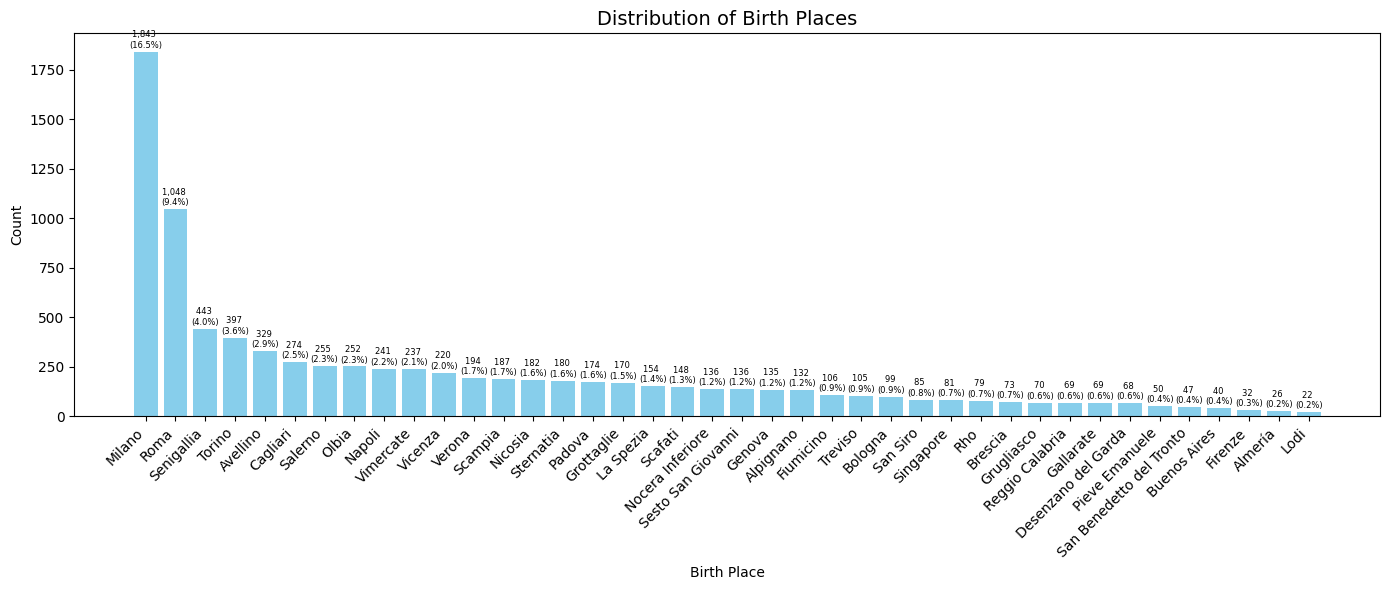

In [ ]:
# Count occurrences and calculate percentages
birth_place_counts = df['birth_place'].value_counts()
print(birth_place_counts)
birth_place_percent = (birth_place_counts / len(df)) * 100

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(birth_place_counts.index, birth_place_counts.values, color='skyblue')

# Labels and title
plt.title('Distribution of Birth Places', fontsize=14)
plt.xlabel('Birth Place')
plt.ylabel('Count')

# Add both count and percentage labels above bars
for i, (count, percent) in enumerate(zip(birth_place_counts.values, birth_place_percent.values)):
    plt.text(i, count + 10, f"{count:,} \n({percent:.1f}%)", 
             ha='center', va='bottom', fontsize=6, color='black')

plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()


##### Checking Birth Place–Country Consistency (doubt)

This section verifies whether each artist’s birth place matches their country. It defines a list of known Italian cities and maps a few foreign cities to their respective countries. T The result shows the number of mismatches and lists the inconsistent records. The results show 26 mismatches, all involving artists born in Almería (Spain) but recorded with the country Italia

In [ ]:

# List of Italian cities from the data
italian_cities = [
    "Milano", "Roma", "Senigallia", "Torino", "Avellino", "Cagliari", "Salerno",
    "Olbia", "Napoli", "Vimercate", "Vicenza", "Verona", "Scampia", "Nicosia",
    "Sternatia", "Padova", "Grottaglie", "La Spezia", "Scafati", "Nocera Inferiore",
    "Sesto San Giovanni", "Genova", "Alpignano", "Fiumicino", "Treviso", "Bologna",
    "San Siro", "Rho", "Brescia", "Grugliasco", "Reggio Calabria", "Gallarate",
    "Desenzano del Garda", "Pieve Emanuele", "San Benedetto del Tronto", "Firenze",
    "Lodi"
]

# Map known foreign cities to their countries
foreign_cities_to_country = {
    "Singapore": "Singapore",
    "Buenos Aires": "Argentina",
    "Almería": "Spagna",
}


# Function to check birth_place vs country
def check_birth_place_country(row):
    if pd.notna(row['birth_place']) and pd.notna(row['country']):
        if row['birth_place'] in italian_cities and row['country'] != "Italia":
            return True  # mismatch
        elif row['birth_place'] in foreign_cities_to_country:
            if row['country'] != foreign_cities_to_country[row['birth_place']]:
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_country_mismatch'] = df.apply(check_birth_place_country, axis=1)

# Count mismatches
num_mismatches = df['birth_place_country_mismatch'].sum()
print(f"Number of birth_place-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['birth_place_country_mismatch']]
display(mismatched_records[['birth_place', 'country',]])


Number of birth_place-country mismatches: 26


,birth_place,country
1629,Almería,Italia
1630,Almería,Italia
1631,Almería,Italia
1632,Almería,Italia
1633,Almería,Italia
1634,Almería,Italia
1635,Almería,Italia
1636,Almería,Italia
1637,Almería,Italia
1638,Almería,Italia


##### Birth Place vs Nationality Consistency Check

This step verifies that each artist’s birth place aligns with their nationality. A list of Italian cities and a mapping of known foreign cities (like Almería, Buenos Aires, and Singapore) were used for comparison.

The results show 107 mismatches, mainly involving artists born in Almería or Singapore but labeled with the nationality Italia, indicating possible errors or inconsistencies in the dataset.

In [ ]:
# List of Italian cities
italian_cities = [
    "Milano", "Roma", "Senigallia", "Torino", "Avellino", "Cagliari", "Salerno",
    "Olbia", "Napoli", "Vimercate", "Vicenza", "Verona", "Scampia", "Nicosia",
    "Sternatia", "Padova", "Grottaglie", "La Spezia", "Scafati", "Nocera Inferiore",
    "Sesto San Giovanni", "Genova", "Alpignano", "Fiumicino", "Treviso", "Bologna",
    "San Siro", "Rho", "Brescia", "Grugliasco", "Reggio Calabria", "Gallarate",
    "Desenzano del Garda", "Pieve Emanuele", "San Benedetto del Tronto", "Firenze",
    "Lodi"
]


# Map special foreign cities to nationality
foreign_cities_to_nationality = {
    "Singapore": "Singapore",
    "Buenos Aires": "Argentina",
    "Almería": "Spagna",
}

# Function to check birth_place vs nationality
def check_birth_place_nationality(row):
    if pd.notna(row['birth_place']) and pd.notna(row['nationality']):
        if row['birth_place'] in italian_cities and row['nationality'] != "Italia":
            return True  # mismatch
        elif row['birth_place'] in foreign_cities_to_nationality:
            if row['nationality'] != foreign_cities_to_nationality[row['birth_place']]:
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_nationality_mismatch'] = df.apply(check_birth_place_nationality, axis=1)

# Count mismatches
num_mismatches = df['birth_place_nationality_mismatch'].sum()
print(f"Number of birth_place-nationality mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['birth_place_nationality_mismatch']]
print(mismatched_records[['name','birth_place', 'nationality','country']])


Number of birth_place-nationality mismatches: 107
                  name birth_place nationality country
1629  chadia rodriguez     Almería      Italia  Italia
1630  chadia rodriguez     Almería      Italia  Italia
1631  chadia rodriguez     Almería      Italia  Italia
1632  chadia rodriguez     Almería      Italia  Italia
1633  chadia rodriguez     Almería      Italia  Italia
...                ...         ...         ...     ...
5346            baby k   Singapore      Italia     NaN
5347            baby k   Singapore      Italia     NaN
5348            baby k   Singapore      Italia     NaN
5349            baby k   Singapore      Italia     NaN
5350            baby k   Singapore      Italia     NaN

[107 rows x 4 columns]


##### Distribution of Songs by Province and Region

This code calculates and visualizes the percentage distribution of songs by province and region. It counts occurrences, converts them to percentages, and displays bar charts with labeled values to show which areas have the highest song representation

Provinces
province
Milano                   2193
Roma                     1154
Torino                    599
Salerno                   539
Ancona                    443
Napoli                    428
Avellino                  329
Cagliari                  274
Gallura                   252
Monza e della Brianza     237
Vicenza                   220
Verona                    194
Enna                      182
Lecce                     180
Padova                    174
Taranto                   170
Genova                    161
La Spezia                 154
Brescia                   141
Treviso                   105
Bologna                    99
Varese                     69
Reggio Calabria            69
Ascoli Piceno              47
Firenze                    32
Lodi                       22
Name: count, dtype: int64


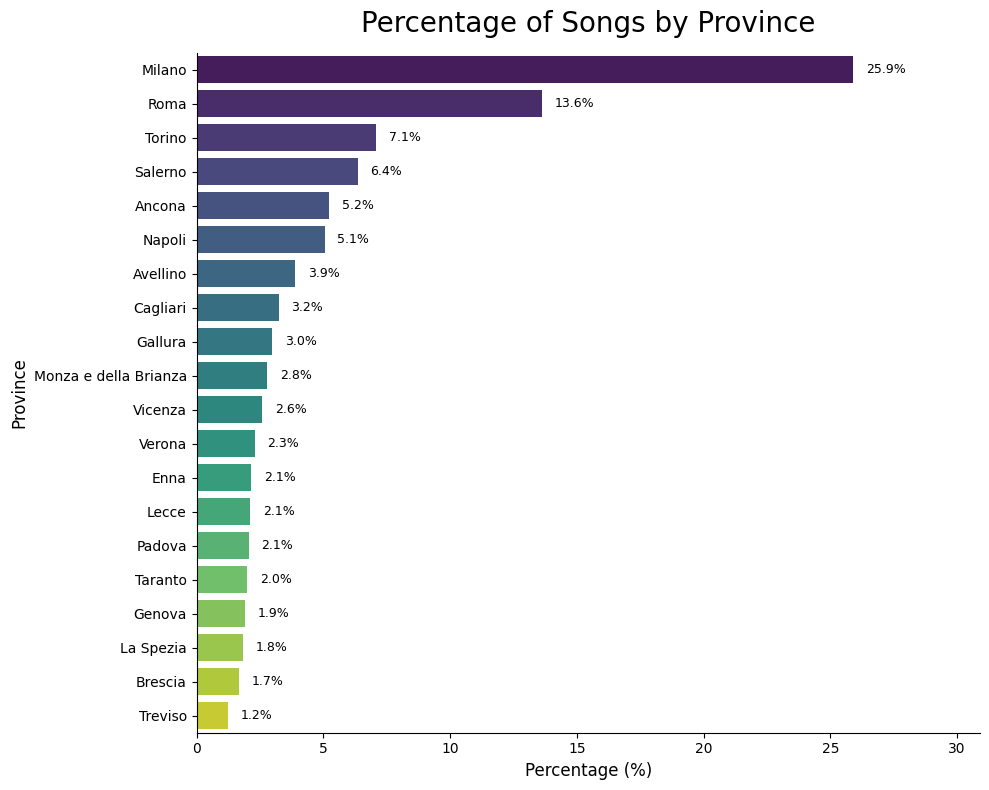

Regions
region
Lombardia         2662
Campania          1296
Lazio             1154
Veneto             693
Piemonte           599
Sardegna           526
Puglia             350
Liguria            315
Sicilia            182
Emilia-Romagna      99
Calabria            69
Marche              47
Toscana             32
Name: count, dtype: int64


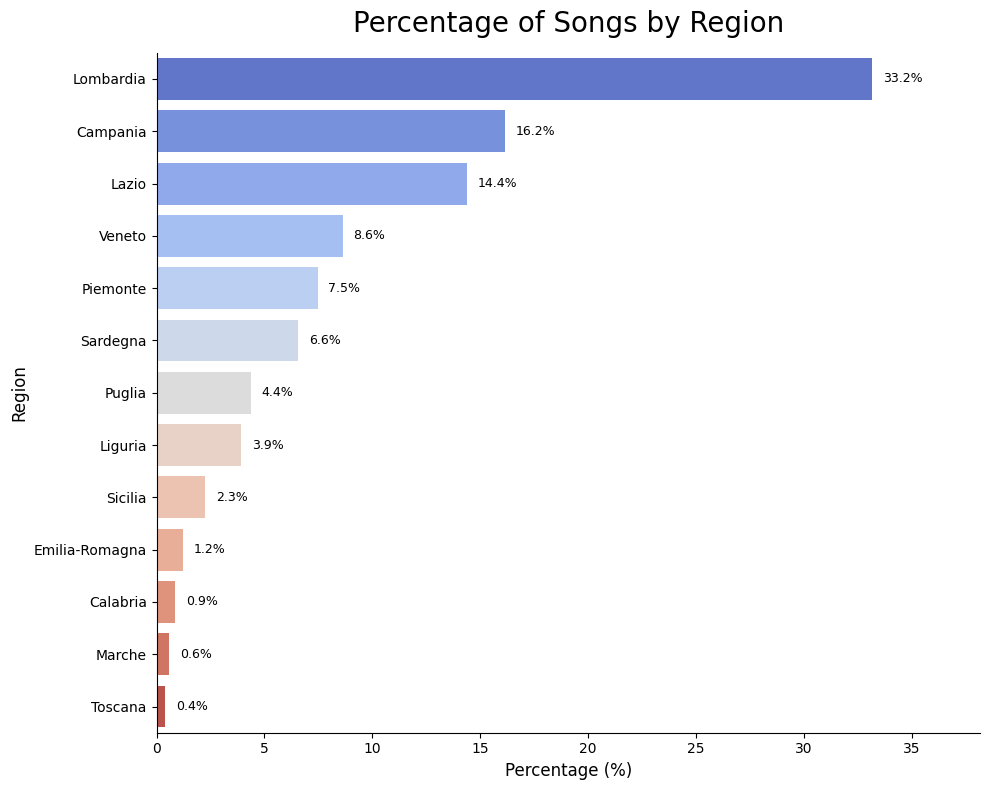

In [ ]:

# Count occurrences and convert to percentages
province_counts = df['province'].value_counts()
province_percent = (province_counts / province_counts.sum()) * 100
print('Provinces')
print(province_counts)

# Create a DataFrame for plotting
province_df = province_percent.reset_index()
province_df.columns = ['province', 'percent']


plt.figure(figsize=(10, 8))
sns.barplot(
    data=province_df.head(20),  # top 20 provinces if you want
    x='percent',
    y='province',
    hue='province',
    palette='viridis',
    dodge=False
)

plt.title("Percentage of Songs by Province", fontsize=20, pad=15, color="#000000")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Province", fontsize=12)

# Add percentage labels
for index, value in enumerate(province_df.head(20)['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, province_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()



region_counts = df['region'].value_counts()
print('Regions')
print(region_counts)
region_percent = (region_counts / region_counts.sum()) * 100
region_df = region_percent.reset_index()
region_df.columns = ['region', 'percent']

plt.figure(figsize=(10, 8))
sns.barplot(
    data=region_df,
    x='percent',
    y='region',
    hue='region',
    palette='coolwarm',
    dodge=False
)

plt.title("Percentage of Songs by Region", fontsize=20, pad=15, color="#000000")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Add percentage labels
for index, value in enumerate(region_df['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, region_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()


##### Province/Region – Country Consistency Check

This code verifies that Italian provinces and regions are correctly associated with the country "Italia"

In [ ]:
# Example mapping of Italian regions to their provinces (from your data)
region_provinces = {
    "Lombardia": ["Milano", "Monza e della Brianza", "Brescia", "Varese", "Lodi"],
    "Campania": ["Salerno", "Napoli", "Avellino"],
    "Lazio": ["Roma"],
    "Veneto": ["Vicenza", "Verona", "Padova", "Treviso"],
    "Piemonte": ["Torino"],
    "Sardegna": ["Cagliari", "Gallura"],
    "Puglia": ["Lecce", "Taranto"],
    "Liguria": ["Genova", "La Spezia"],
    "Sicilia": ["Enna"],
    "Emilia-Romagna": ["Bologna"],
    "Calabria": ["Reggio Calabria"],
    "Marche": ["Ancona", "Ascoli Piceno"],
    "Toscana": ["Firenze"]
}

# Flatten all Italian provinces for quick lookup
all_italian_provinces = [prov for provs in region_provinces.values() for prov in provs]

# Function to check province/region ↔ country
def check_province_region_country(row):
    if pd.notna(row['country']):
        if pd.notna(row['province']) and row['province'] in all_italian_provinces:
            if row['country'] != "Italia":
                return True  # mismatch
        elif pd.notna(row['region']) and row['region'] in region_provinces.keys():
            if row['country'] != "Italia":
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['province_region_country_mismatch'] = df.apply(check_province_region_country, axis=1)

# Count mismatches
num_mismatches = df['province_region_country_mismatch'].sum()
print(f"Number of province/region-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['province_region_country_mismatch']]
print(mismatched_records[['province', 'region', 'country']])


Number of province/region-country mismatches: 0
Empty DataFrame
Columns: [province, region, country]
Index: []


##### Province/Region vs Birth Place – Consistency Check (doubt)

This check compares each artist’s birth_place with the corresponding province and region. Mismatches occur when the province or region does not align with the birth_place. There are 2,901 mismatches between birth_place and province/region.

In [ ]:
# Updated mapping of Italian regions to provinces including all birth_places in your data
region_provinces = {
    "Lombardia": ["Milano", "Vimercate", "Sesto San Giovanni", "Alpignano", "Fiumicino",
                  "Brescia", "Grugliasco", "Rho", "Gallarate", "Desenzano del Garda", "Lodi", "San Siro"],
    "Lazio": ["Roma"],
    "Piemonte": ["Torino"],
    "Campania": ["Salerno", "Napoli", "Avellino", "Scafati", "Nocera Inferiore"],
    "Veneto": ["Vicenza", "Verona", "Padova", "Treviso"],
    "Sardegna": ["Cagliari", "Olbia", "Gallura"],
    "Puglia": ["Lecce", "Taranto", "Grottaglie", "Sternatia", "San Benedetto del Tronto"],
    "Liguria": ["Genova", "La Spezia"],
    "Sicilia": ["Enna", "Nicosia"],
    "Emilia-Romagna": ["Bologna"],
    "Calabria": ["Reggio Calabria"],
    "Marche": ["Ancona", "Senigallia", "Ascoli Piceno"],
    "Toscana": ["Firenze", "Scampia", "Padova"]
}

# Flatten province → region mapping
province_to_region = {prov: reg for reg, provs in region_provinces.items() for prov in provs}

# Function to check birth_place ↔ province/region
def check_birth_place_province_region(row):
    if pd.notna(row['birth_place']):
        # Only check Italian birth_places
        if row['birth_place'] in province_to_region:
            expected_region = province_to_region[row['birth_place']]
            # Compare province and region if available
            if (pd.notna(row['province']) and row['province'] != row['birth_place']) or \
               (pd.notna(row['region']) and row['region'] != expected_region):
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_province_region_mismatch'] = df.apply(check_birth_place_province_region, axis=1)

# Count mismatches
num_mismatches = df['birth_place_province_region_mismatch'].sum()
print(f"Number of birth_place-province/region mismatches: {num_mismatches}")

# Show mismatched records
mismatched_records = df[df['birth_place_province_region_mismatch']]
print(mismatched_records[['birth_place', 'province', 'region']])


Number of birth_place-province/region mismatches: 2901
      birth_place province    region
0      Grugliasco   Torino  Piemonte
1      Grugliasco   Torino  Piemonte
2      Grugliasco   Torino  Piemonte
3      Grugliasco   Torino  Piemonte
4      Grugliasco   Torino  Piemonte
...           ...      ...       ...
11161     Nicosia     Enna   Sicilia
11162     Nicosia     Enna   Sicilia
11163     Nicosia     Enna   Sicilia
11164     Nicosia     Enna   Sicilia
11165     Nicosia     Enna   Sicilia

[2901 rows x 3 columns]


##### Geographic Distribution of Artists by Province and Region

This analysis aggregates the number of artists by their latitude, longitude, province, and region. The resulting table shows the locations with the highest concentration of artists at the top. For example, Milano (Lombardia) has the most artists with 1,843, followed by Roma (Lazio) with 1,048, and Torino (Piemonte) with 397. The code also generates a map where the size and color of the points reflect the number of artists per location, providing a clear visual of artist density across Italy.

In [ ]:
# Aggregate by latitude and longitude to count number of artists
location_counts = df.groupby(['latitude', 'longitude', 'region', 'province']).size().reset_index(name='num_artists')

# Sort by number of artists descending
location_counts = location_counts.sort_values(by='num_artists', ascending=False)

# Print the sorted table
print(location_counts)

# Define a color scale
color_scale = [(0, 'orange'), (1,'red')]

# Create the scatter map
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    hover_data=["region", "province", "num_artists"],  # show count on hover
    size="num_artists",  # size of marker represents number of artists
    color="num_artists",  # color also shows density
    color_continuous_scale=color_scale,
    zoom=5,
    height=800,
    width=800
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


     latitude  longitude          region               province  num_artists
27  45.464194   9.189635       Lombardia                 Milano         1843
13  41.893320  12.482932           Lazio                   Roma         1048
20  45.067755   7.682489        Piemonte                 Torino          397
11  40.996545  15.140569        Campania               Avellino          329
2   39.217199   9.113311        Sardegna               Cagliari          274
4   40.419442  15.310609        Campania                Salerno          255
10  40.923266   9.502744        Sardegna                Gallura          252
8   40.835885  14.248768        Campania                 Napoli          241
32  45.613963   9.370060       Lombardia  Monza e della Brianza          237
33  45.634859  11.406354          Veneto                Vicenza          220
26  45.442498  10.985738          Veneto                 Verona          194
9   40.899988  14.241052        Campania                 Napoli          187

C:\Users\Mary\AppData\Local\Temp\ipykernel_9716\457159793.py:14: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Filling missing Values

### Filling Birth Dates
This code manually fills missing birth dates for specific artists in the dataset. It first defines a dictionary mapping artist names to their known or estimated birth dates.

9 entries couldn’t be filled so their birth dates are intentionally left blank in the dictionary. For Miss Keta, the birth date is unknown, so no accurate value can be provided. The others — Bushwaka, Sottotono, Dark Polo Gang, Cor Veleno, Colle Der Fomento, Club Dogo, Articolo 31, and 99 Posse — are all music groups or duos, not individual artists, meaning they don’t have a single birth date associated with them.

In [ ]:

# --- 1. Define the Missing Dates as a Dictionary ---
# Source of truth for the manual fill
birth_dates_to_fill = {
    'alfa': '2000-08-22',
    'anna pepe': '2003-08-15',
    'beba': '1994-10-10',
    'bigmama': '2000-03-10',
    'brusco': '1974-01-04',
    'caneda': '1976-09-30',
    'dargen d_amico': '1980-11-29',
    'guè pequeno': '1980-12-25',
    'johnny marsiglia': '1986-08-05',
    'nerone': '1991-05-23',
    'priestess': '1996-08-20',
    'samuel heron': '1991-01-01',
    'shiva': '1999-08-27',
    'yeиdry': '1993-07-27',
    'o zulù': '1970-11-15',
    'skioffi':'1992-06-05',
    'eva rea':'1993-01-01',
    'hindaco':'1996-01-01',
    'joey funboy':'1995-01-01',
    'mistico':'1982-01-01',
    'mike24':'1985-08-02',
    'doll kill':'1996-01-01',
    'miss simpatia':'1986-03-23',
    'miss keta':'',#unknown
    'bushwaka':'',#duo
    'sottotono':'',#group
    'dark polo gang':'',#group
    'cor veleno':'',#group
    'colle der fomento':'',#group
    'club dogo':'',#group
    'articolo 31':'',#group
    '99 posse':''#gruppo
    
    
    
    }

# --- 2. Fill the Missing Data (Imputation) ---

# Convert the dictionary to a Pandas Series for easy lookup and indexing
birth_date_series = pd.Series(birth_dates_to_fill)

# Iterate through the artists in your fill list and update the DataFrame
for artist, bday in birth_date_series.items():
    # Use .loc to find rows where 'artist_name' matches and update 'birth_date'
    # The second part of the condition (artist_df['birth_date'].isna()) ensures
    # we only overwrite if the date was previously missing (NaN).
    df.loc[
        (df['name'] == artist) & (df['birth_date'].isna()),
        'birth_date'
    ] = bday

# --- 3. Final Conversion and Verification ---

# Convert the 'birth_date' column to the proper datetime format again
# (This is crucial for accurate age calculation)
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Optional: Print out the affected rows to verify the fix
print("--- Verification of Filled Birth Dates  ---")
# Filter the DataFrame to show only the artists we just updated
filled_artists = df[df['name'].isin(birth_dates_to_fill.keys())]

# Show the unique artist names and their newly filled birth dates
print(filled_artists[['name', 'birth_date']].drop_duplicates().to_string(index=False))

--- Verification of Filled Birth Dates  ---
             name birth_date
             beba 1994-10-10
             alfa 2000-08-22
           nerone 1991-05-23
      guè pequeno 1980-12-25
          skioffi 1992-06-05
        club dogo        NaT
          hindaco 1996-01-01
    miss simpatia 1986-03-23
          eva rea 1993-01-01
           o zulù 1970-11-15
        doll kill 1996-01-01
           yeиdry 1993-07-27
 johnny marsiglia 1986-08-05
      articolo 31        NaT
          mistico 1982-01-01
        miss keta        NaT
   dargen d_amico 1980-11-29
         bushwaka        NaT
         99 posse        NaT
          bigmama 2000-03-10
           brusco 1974-01-04
       cor veleno        NaT
           mike24 1985-08-02
   dark polo gang        NaT
colle der fomento        NaT
        sottotono        NaT
        anna pepe 2003-08-15
     samuel heron 1991-01-01
      joey funboy 1995-01-01
        priestess 1996-08-20
            shiva 1999-08-27
           caneda 1976-09-30

#### Checking distribution after filling Bithdate

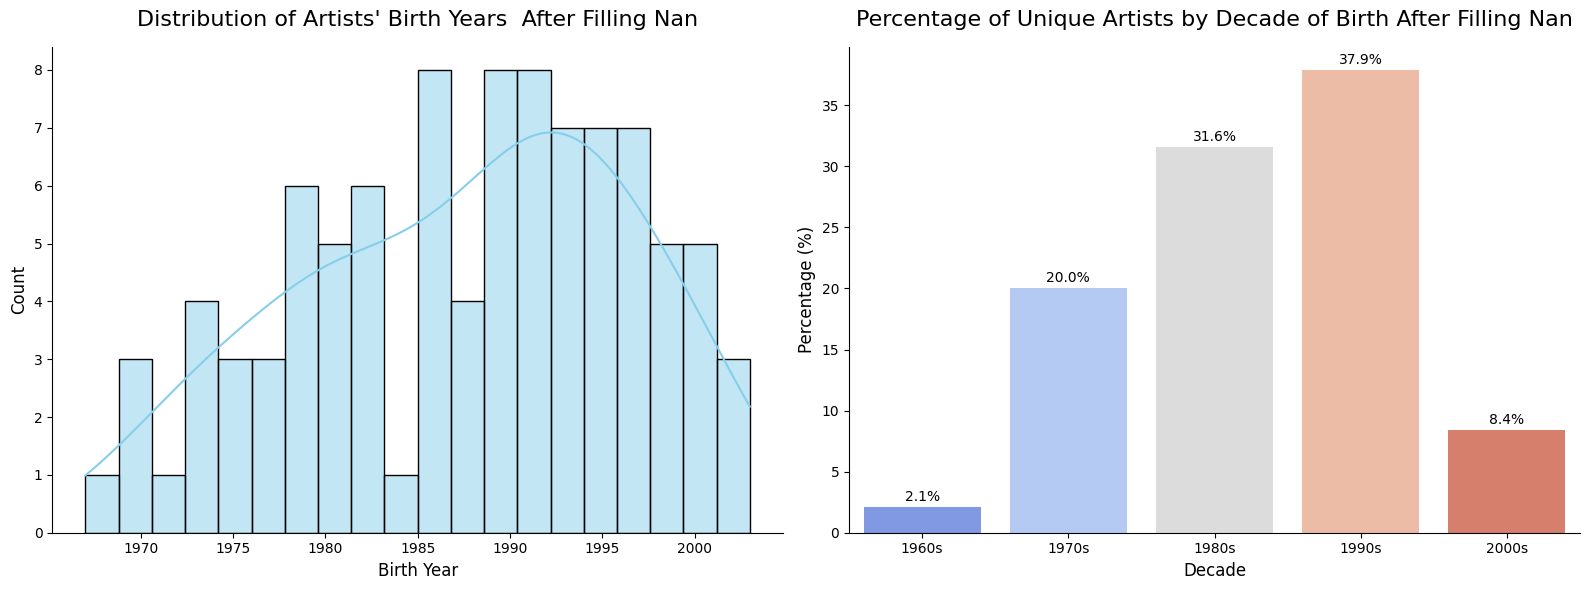

2025-11-10 16:32:16,169 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-10 16:32:16,175 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Number of unique artists per age:
birth_date
22    1
23    2
24    2
25    3
26    2
27    3
28    3
29    4
30    2
31    5
32    7
33    3
34    5
35    2
36    6
37    2
38    2
39    4
40    4
41    1
42    2
43    4
44    1
45    4
46    6
49    3
50    3
51    1
52    3
53    1
55    2
56    1
58    1
Name: count, dtype: int64


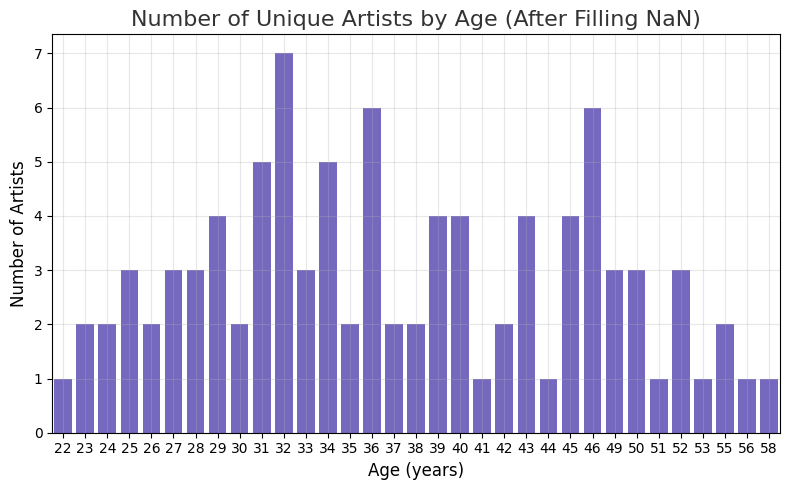

In [ ]:
plot_birth_decades(df, "Distribution of Artists' Birth Years  After Filling Nan",'Percentage of Unique Artists by Decade of Birth After Filling Nan')
plot_artist_ages(df,'Number of Unique Artists by Age (After Filling NaN)')

### Filling Active Start Date

Active start dates have been filled in the 'active_start' column.
Percentage of Unique Artists by Active Start Decade After Filling Missing Values
  decade    percent
0  1980s   2.884615
1  1990s  27.884615
2  2000s  25.961538
3  2010s  39.423077
4  2020s   3.846154


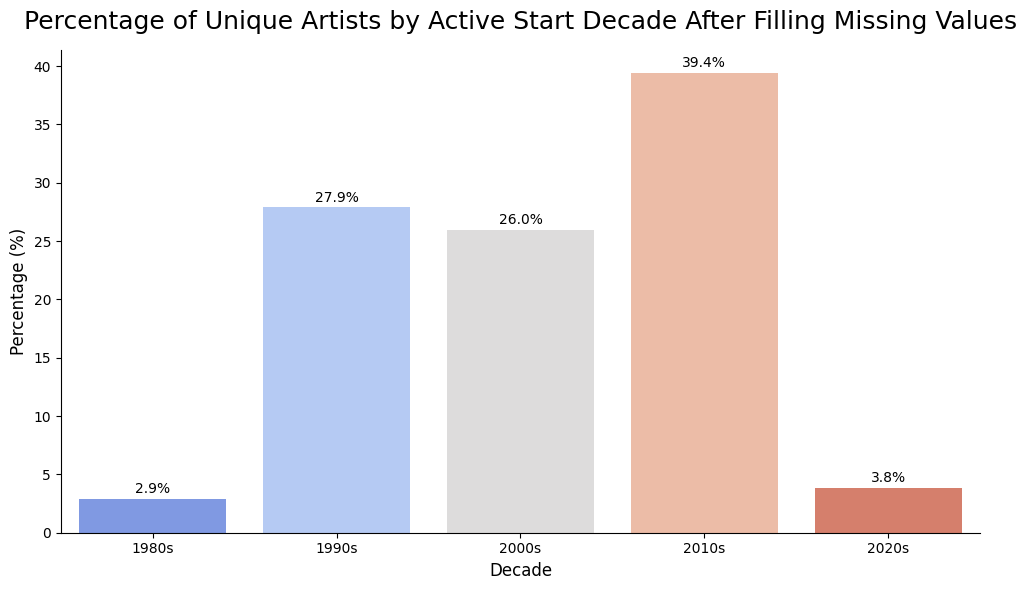

Age of unique Artists When They Started Their Career After Filling Missing Values
1      1
10     1
13     1
14     4
15     8
16     5
17    14
18    12
19    12
20     6
21    13
22     4
23     4
24     7
26     2
27     1
Name: count, dtype: int64


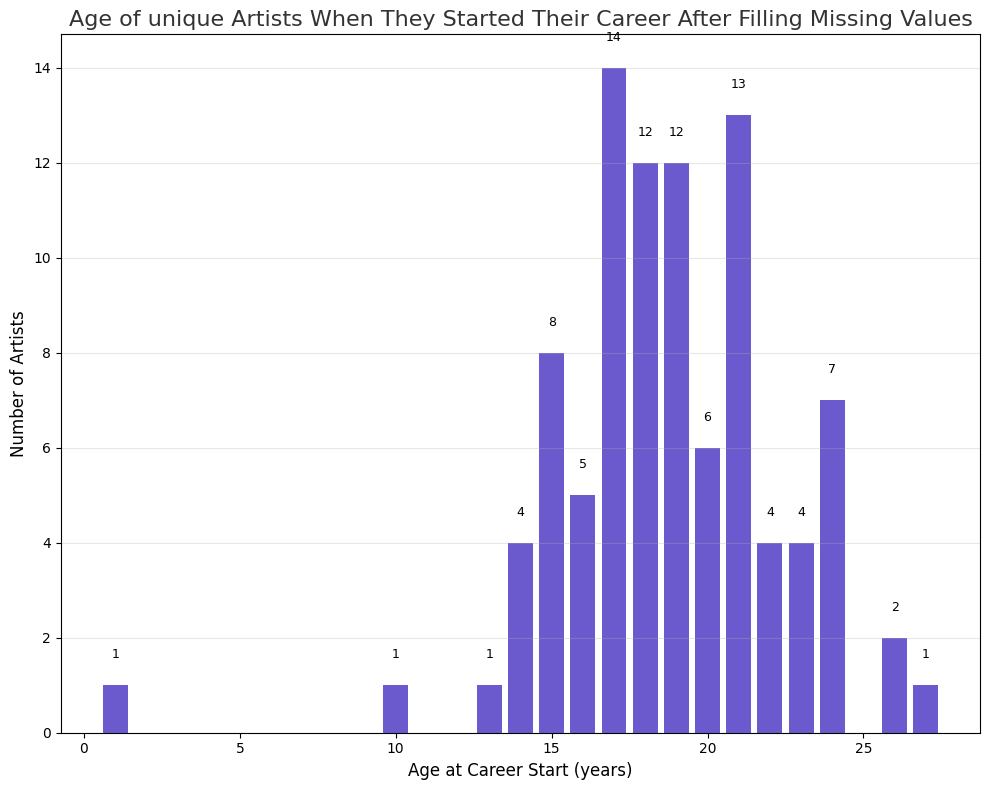

In [ ]:
# Total number of unique artists missing 'active_start': 54
active_starts_consolidated = {
    'alfa': '01-15-2017',
    'anna pepe': '01-01-2018',
    'babaman': '01-01-1989',
    'beba': '11-01-2015',
    'brusco': '01-01-1991',
    'capo plaza': '01-01-2013',
    'chadia rodriguez': '01-01-2017',
    'clementino': '04-29-2006',
    'dargen d_amico': '01-01-1999',
    'don joe': '01-01-1999',
    'fred de palma': '01-01-2008',
    'geolier': '01-01-2018',
    'guè pequeno': '01-01-1997',
    'miss keta': '01-01-2013',
    'shiva': '01-01-2014',
    'tedua': '01-01-2013',
    'tony effe': '01-01-2014',
    'sottotono': '01-01-1994',
    'bushwaka': '01-01-2007',
    'mike24': '01-01-2009',
    'mistico': '01-01-2008',
    'skioffi': '01-01-2014',
    "caneda": "01-01-1993",
    "club dogo": "01-01-2002",
    "colle der fomento": "01-01-1994",
    "dani faiv": "01-01-2014",
    "doll kill": "01-01-2012",
    "drefgold": "01-01-2012",
    "entics": "01-01-2004",
    "eva rea": "12-18-2014",
    "hell raton": "01-01-2010",
    "hindaco": "02-21-2020",
    "jack the smoker": "01-01-2000",
    "joey funboy": "01-01-2016",
    "johnny marsiglia": "01-01-2007",
    "la pina": "01-01-1994",
    "luchè": "01-01-1997",
    "mambolosco": "02-10-2017",
    "massimo pericolo": "01-01-2016",
    "miss simpatia": "01-01-2007",
    "mistaman": "01-01-1994",
    "mondo marcio": "01-01-2003",
    "nerone": "01-01-2008",
    "niky savage": "01-01-2021",
    "o zulù": "01-01-1991",
    "papa v": "01-01-2020",
    "rondodasosa": "01-01-2020",
    "samuel heron": "01-01-2012",
    "shablo": "01-01-1999",
    "slait": "01-01-2010",
    "tony boy": "01-01-2018",
    "tormento": "01-01-1991",
    "yeиdry": "01-01-2012",
    "yung snapp": "01-01-2012",
}


# Convert the dictionary to a Pandas Series for efficient filling
start_date_series = pd.Series(active_starts_consolidated)

# Iterate and fill the missing data in the 'active_start' column
for artist, start_date in start_date_series.items():
    # Use .loc to find rows where 'artist_name' matches and update 'active_start'
    df.loc[
        df['name'] == artist,
        'active_start'
    ] = start_date

# Ensure the 'active_start' column is a proper datetime object
df['active_start'] = pd.to_datetime(df['active_start'], errors='coerce')

print("Active start dates have been filled in the 'active_start' column.")

plot_active_start_decades(df,'Percentage of Unique Artists by Active Start Decade After Filling Missing Values')
plot_age_at_career_start(df,'Age of unique Artists When They Started Their Career After Filling Missing Values')

### Filling missing albums for tracks 
We have 78 tracks without albums. We managed to find the albums for 16 tracks.

In [ ]:
# --- 1. Define mapping for known tracks ---
# Keys = track title (partial or exact match)
# Values = album name, release date, and type
album_updates = {
  
    "PTS (PoiTiSpiego/PostTraumaticStress)": {
        "album_name": "Gilmar / Embrionale",
        "album_release_date": "2012-01-01",
        "album_type": "album"
    },
    "Quelli che benpensano": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Autodafè": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Fight da faida": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Giù le mani da Caino": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Pedala": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Accendimi": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Fili": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Rap Lamento": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Cali di tensione": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Cubetti tricolori": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Faccio la mia cosa": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Libri Di Sangue": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Potere Alla Parola": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Nuvole": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
    "Il beat come anestetico": {
        "album_name": "La morte dei miracoli",
        "album_release_date": "1997-01-01",
        "album_type": "album"
    },
}

# --- 2. Define a helper function to safely update missing info ---
def update_album_info(row):
    for track, info in album_updates.items():
        if track.lower() in str(row['full_title']).lower():  # partial match, case-insensitive
            if pd.isna(row['album_name']):
                row['album_name'] = info['album_name']
            if pd.isna(row['album_release_date']):
                row['album_release_date'] = pd.to_datetime(info['album_release_date'])
            if pd.isna(row['album_type']):
                row['album_type'] = info['album_type']
            break
    return row

# --- 3. Apply to the dataset ---
df = df.apply(update_album_info, axis=1)

# --- 4. Verify the updates ---
updated = df[df['full_title'].str.contains('|'.join(album_updates.keys()), case=False, na=False)]
print(f" Updated {len(updated)} tracks with album information.")
display(updated[['full_title', 'album_name', 'album_release_date', 'album_type']])


 Updated 36 tracks with album information.


C:\Users\Mary\AppData\Local\Temp\ipykernel_9716\1147386278.py:105: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,full_title,album_name,album_release_date,album_type
104,Fili Del Tram by Beba,Crisalide,2021-10-21,album
127,"TesTa TrA Le NuVoLE, pT. 2 by Alfa",NoRd,2021-05-14,album
131,"Testa tra le nuvole, Pt. 1 by Alfa",Before Wanderlust,2019-12-13,album
143,"Testa tra le nuvole, Pt. 0 by Alfa",Before Wanderlust,2019-12-13,album
1839,Sangue E Filigrana by Club Dogo (Ft. Vincenzo ...,MI Fist (2004 Remaster),2003-01-03,album
2773,Sulle Nuvole by Doll Kill,Sulle Nuvole (prod. Low Kidd & Young Miles),2020-01-16,single
3369,La mia ragazza mena by Articolo 31 (Ft. Bruno ...,Italiano medio,2003-11-04,album
3601,Sopra le nuvole by Neffa,Molto calmo,2013-12-11,album
3667,Quelli che benpensano by Frankie hi-nrg mc (Ft...,La morte dei miracoli,1997-01-01,album
3668,Autodafè by Frankie hi-nrg mc,La morte dei miracoli,1997-01-01,album


## Error Correction 

### Correcting wrong active start
Upon Inspection on the age of the artists when they started their career (code above).

Among the unique artists, several had unusual ages at career start.  Nesli (age 10)  had incorrect active start dates, while  Salmo (age 13) and Mudimbi (age 27) are correct.  These values comes from the original data.

After filling birthdate and Active start date we realized that (bigmama) started at the age of one which is obviously wrong.

 We will correct the errors by updating  Nesli’s to 1999,bigmama to 2016, leaving Salmo and Mudimbi unchanged.

In [ ]:
# Calculate age at career start without adding a column
ages = df['active_start'].dt.year - df['birth_date'].dt.year

# Filter rows where age is  10,  13,or 27
outliers = df[ages.isin([ 10, 13,27,])].copy()

# Keep only unique artists based on name
unique_outliers = outliers.drop_duplicates(subset=['name'])

print(unique_outliers[['name', 'birth_date', 'active_start']].assign(age_at_start=ages))

         name birth_date active_start  age_at_start
1128  mudimbi 1986-10-17   2013-01-01          27.0
6645    nesli 1980-12-29   1990-01-01          10.0
9608    salmo 1984-06-29   1997-01-01          13.0


         name birth_date active_start
6458  bigmama 2000-03-10   2016-01-01
6459  bigmama 2000-03-10   2016-01-01
6460  bigmama 2000-03-10   2016-01-01
6461  bigmama 2000-03-10   2016-01-01
6462  bigmama 2000-03-10   2016-01-01
...       ...        ...          ...
9789    salmo 1984-06-29   1997-01-01
9790    salmo 1984-06-29   1997-01-01
9791    salmo 1984-06-29   1997-01-01
9792    salmo 1984-06-29   1997-01-01
9793    salmo 1984-06-29   1997-01-01

[384 rows x 3 columns]
Age of unique Artists When They Started Their Career After Filling Missing Values and Correcting Errors
13     1
14     4
15     8
16     6
17    14
18    12
19    13
20     6
21    13
22     4
23     4
24     7
26     2
27     1
Name: count, dtype: int64


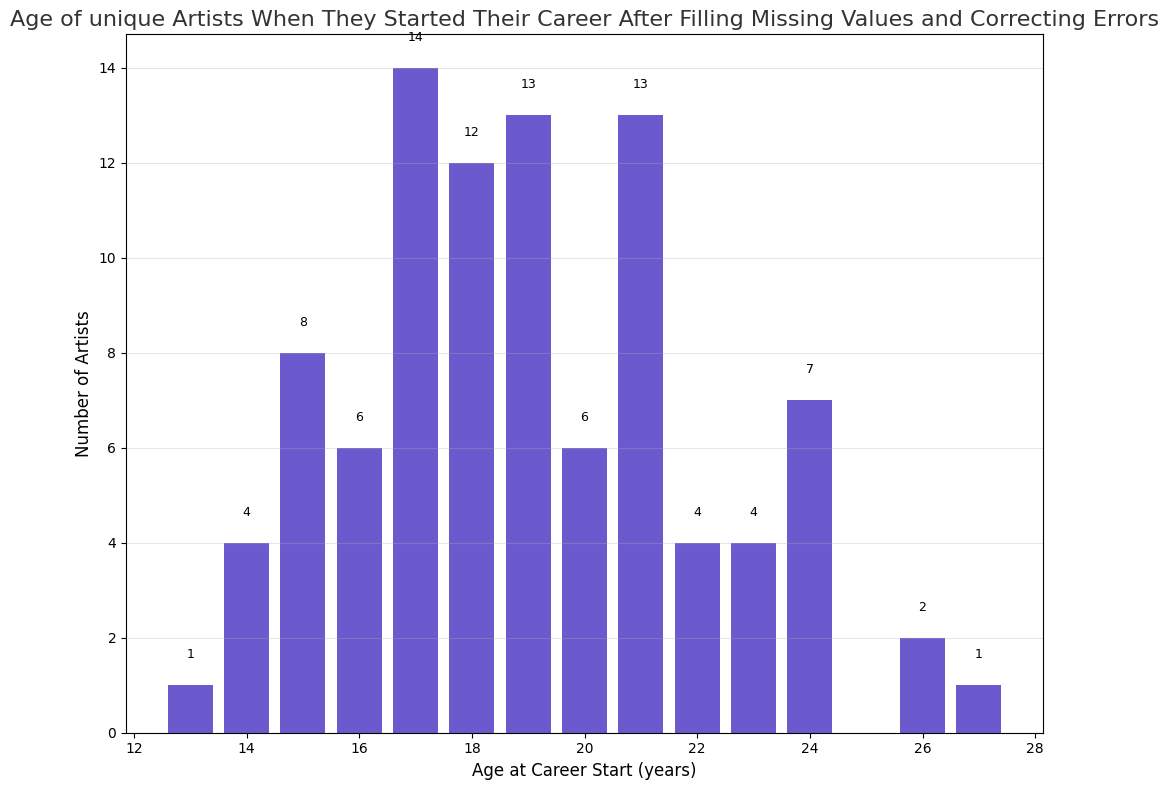

In [ ]:
# Correcting wrong active_start dates
df.loc[df['name'] == 'bigmama', 'active_start'] = pd.to_datetime('2016-01-01')
df.loc[df['name'] == 'nesli', 'active_start'] = pd.to_datetime('1999-01-01')

# Verify the changes
outliers_corrected = df[df['name'].isin(['bigmama', 'nesli', 'salmo',])]
print(outliers_corrected[['name', 'birth_date', 'active_start']])
plot_age_at_career_start(df,'Age of unique Artists When They Started Their Career After Filling Missing Values and Correcting Errors')

### Correcting album release dates for albums that have multiple release dates

In [ ]:
# --- 1. Make sure album_release_date is a datetime type ---
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# --- 2. Compute the oldest (earliest) date per album ---
earliest_dates = (
    df.groupby('album_name', as_index=False)['album_release_date']
      .min()
)

# --- 3. Merge back into the main dataframe ---
df = df.drop(columns=['album_release_date']).merge(
    earliest_dates,
    on='album_name',
    how='left'
)

# --- 4. Confirm result ---
print("Replaced albums with multiple release dates by their earliest (oldest) date.")
print(df[['album_name', 'album_release_date']].drop_duplicates().shape)
display(df[['album_name', 'album_release_date']].drop_duplicates())


Replaced albums with multiple release dates by their earliest (oldest) date.
(2424, 2)


,album_name,album_release_date
0,FOREVER AND EVER,2021-04-09
3,OKAY OKAY 2,2025-05-16
4,FOREVER,2020-05-28
8,MADE IN ITALY,2023-02-09
10,POLKA 3,2022-06-02
...,...,...
11082,"NOI, LORO, GLI ALTRI (Deluxe)",2022-12-09
11120,LA BANALITÀ DEL MALE (End credit song “Qui non...,2024-11-06
11131,La Tipa Del Tipo,2013-01-01
11150,Monument,2018-12-07


## Data Transformation

## Outlier Detection

## Adding new Features